# Board Games Dataset: The dataset contains information regarding

more than 20k board games rated by an online board game community.
The information provided range from year of publication, game difficulty, number of players, information about games rank in
specific categories and game characteristics/themes.

# 1. Initial Setup and Data Loading

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('DM1_game_dataset.csv')

# Basic dataset overview
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head(5)

Dataset Shape: (21925, 46)

First 5 rows:


BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0      1.8333     2.0512           2           4        8.0         213.0   
1      1.0000     1.2256           2           5        8.0          36.0   
2      3.6667     3.8190           1           5        NaN           NaN   
3      1.3077     1.4216           2           2        7.0           NaN   
4      1.5000     1.6230           2           4        NaN           7.0   

   ...  Rank:childrensgames Cat:Thematic  Cat:Strategy  Cat:War  Cat:Family  \
0  ...                21926            0             0        0           0   
1  ...                21926            0             0        0           0   
2  ...                21926            0             0        0           0   
3  ...                21926            0             0        0           0   
4  ...                21926            0             0        0           0   

   Cat:CGS  Cat:Abstract  Cat:Party  Cat:Childrens  Rating  
0        0             0          0              0     Low  
1        0             0          0              0  Medium  
2        0             0          0              0    High  
3        0             0          0              0     Low  
4        0             0          0              0  Medium  

[5 rows x 46 columns]

In [ ]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21925 entries, 0 to 21924
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BGGId                21925 non-null  int64  
 1   Name                 21925 non-null  object 
 2   Description          21924 non-null  object 
 3   YearPublished        21925 non-null  int64  
 4   GameWeight           21925 non-null  float64
 5   ComWeight            21925 non-null  float64
 6   MinPlayers           21925 non-null  int64  
 7   MaxPlayers           21925 non-null  int64  
 8   ComAgeRec            16395 non-null  float64
 9   LanguageEase         16034 non-null  float64
 10  BestPlayers          21925 non-null  int64  
 11  GoodPlayers          21925 non-null  object 
 12  NumOwned             21925 non-null  int64  
 13  NumWant              21925 non-null  int64  
 14  NumWish              21925 non-null  int64  
 15  NumWeightVotes       

In [ ]:
df.describe()

BGGId  YearPublished    GameWeight     ComWeight    MinPlayers  \
count   21925.000000   21925.000000  21925.000000  21925.000000  21925.000000   
mean   117652.663216    1985.494914      1.982131      2.177479      2.007343   
std    104628.721777     212.486214      0.848983      0.861781      0.693093   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     12346.000000    2001.000000      1.333300      1.513400      2.000000   
50%    105305.000000    2011.000000      1.968800      2.128000      2.000000   
75%    206169.000000    2017.000000      2.525200      2.737700      2.000000   
max    349161.000000    2021.000000      5.000000      5.213200     10.000000   

         MaxPlayers     ComAgeRec  LanguageEase   BestPlayers       NumOwned  \
count  21925.000000  16395.000000  16034.000000  21925.000000   21925.000000   
mean       5.707868     10.004391    216.461819      0.311517    1467.848164   
std       15.014643      3.269157    236.595136      1.067002    5294.120574   
min        0.000000      2.000000      1.000000      0.000000       0.000000   
25%        4.000000      8.000000     24.027778      0.000000     150.000000   
50%        4.000000     10.000000    138.000000      0.000000     320.000000   
75%        6.000000     12.000000    351.000000      0.000000     899.000000   
max      999.000000     21.000000   1757.000000     15.000000  166497.000000   

       ...  Rank:partygames  Rank:childrensgames  Cat:Thematic  Cat:Strategy  \
count  ...     21925.000000         21925.000000  21925.000000   21925.00000   
mean   ...     21295.352201         21062.680274      0.055827       0.10577   
std    ...      3637.139987          4219.776597      0.229592       0.30755   
min    ...         1.000000             1.000000      0.000000       0.00000   
25%    ...     21926.000000         21926.000000      0.000000       0.00000   
50%    ...     21926.000000         21926.000000      0.000000       0.00000   
75%    ...     21926.000000         21926.000000      0.000000       0.00000   
max    ...     21926.000000         21926.000000      1.000000       1.00000   

            Cat:War    Cat:Family       Cat:CGS  Cat:Abstract     Cat:Party  \
count  21925.000000  21925.000000  21925.000000  21925.000000  21925.000000   
mean       0.161003      0.105633      0.013820      0.050855      0.029190   
std        0.367542      0.307374      0.116745      0.219707      0.168344   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Cat:Childrens  
count   21925.000000  
mean        0.040182  
std         0.196391  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 40 columns]

In [ ]:
df.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates',
       'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family',
       'Kickstarted', 'ImagePath', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens', 'Rating'],
      dtype='object')

In [ ]:
df[['Family']]

Family
0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
...                  ...
21920  Classic (Gigamic)
21921                NaN
21922                NaN
21923        Hoplomachus
21924                NaN

[21925 rows x 1 columns]

## Identify Features that Need Log-Transform

In [ ]:
# ==============================================
# 1. SIMPLIFIED VERSION - FIND BEST TRANSFORMATIONS
# ==============================================

plt.style.use('seaborn-v0_8-muted')
sns.set_context("paper", font_scale=1.2)

def find_best_transformation_simple(df):
    """
    Simple version that picks transformation based on skewness reduction only
    """
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    transformations_info = {}

    for col in numeric_cols:
        # Skip if not enough unique values or all NaN
        if df[col].nunique() < 10 or df[col].isna().all():
            continue

        # Calculate original skewness
        orig_data = df[col].fillna(df[col].median())
        orig_skew = stats.skew(orig_data)

        # Skip if already fairly symmetric
        if abs(orig_skew) < 0.5:
            continue

        # Test transformations
        transform_results = {}

        # 1. Original
        transform_results['none'] = {
            'skew': orig_skew,
            'data': orig_data
        }

        # 2. Log transformation
        if (orig_data >= 0).all():
            log_data = np.log1p(orig_data)
            transform_results['log'] = {
                'skew': stats.skew(log_data),
                'data': log_data
            }

        # 3. Square root
        if (orig_data >= 0).all():
            sqrt_data = np.sqrt(orig_data)
            transform_results['sqrt'] = {
                'skew': stats.skew(sqrt_data),
                'data': sqrt_data
            }

        # Select best based on smallest absolute skew
        if len(transform_results) > 1:  # More than just 'none'
            best_transform, best_info = min(
                transform_results.items(),
                key=lambda x: abs(x[1]['skew'])
            )

            # Only keep if improvement is significant
            improvement = abs(orig_skew) - abs(best_info['skew'])
            if improvement > 0.3:  # Significant improvement threshold
                transformations_info[col] = {
                    'transform': best_transform,
                    'original_skew': orig_skew,
                    'new_skew': best_info['skew'],
                    'improvement': improvement
                }

    return transformations_info

# ==============================================
# 2. FIND BEST TRANSFORMATIONS
# ==============================================

print("\n" + "="*70)
print("ANALYZING FEATURES FOR OPTIMAL TRANSFORMATIONS")
print("="*70)

best_transformations = find_best_transformation_simple(df)

print(f"\nIDENTIFIED {len(best_transformations)} FEATURES FOR TRANSFORMATION")
print("="*70)
print(f"{'Feature':<25} {'Best Transform':<15} {'Orig Skew':<12} {'New Skew':<12} {'Improvement':<12}")
print("-"*70)

for i, (feat, info) in enumerate(best_transformations.items(), 1):
    print(f"{i:2d}. {feat:<23} {info['transform']:<15} "
          f"{info['original_skew']:<12.2f} {info['new_skew']:<12.2f} "
          f"{info['improvement']:<12.2f}")

# ==============================================
# 3. PLOT EACH IDENTIFIED FEATURE (BEFORE APPLYING)
# ==============================================

print("\n" + "="*70)
print("VISUALIZING IDENTIFIED TRANSFORMATIONS")
print("="*70)

# Store original for plotting
df_original_for_plot = df.copy()

features_plotted = 0
for feat, info in best_transformations.items():
    # Skip if 'none' transformation
    if info['transform'] == 'none':
        continue

    features_plotted += 1

    # Create a copy of the original feature values
    original = df_original_for_plot[feat].copy()
    original_skew = info['original_skew']

    # Apply the transformation based on what was identified as best
    trans_type = info['transform']

    if trans_type == 'log':
        transformed = np.log1p(df_original_for_plot[feat].clip(lower=0))
        trans_name = 'Log-Transformed'
        color = 'salmon'
    else:  # 'sqrt'
        transformed = np.sqrt(df_original_for_plot[feat].clip(lower=0))
        trans_name = 'Sqrt-Transformed'
        color = 'lightgreen'

    # Calculate the skewness after transformation
    transformed_skew = transformed.skew()

    # Create a figure with 3 subplots arranged horizontally
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    # SUBPLOT 1: Original distribution
    axes[0].hist(original.dropna(), bins=30, color='skyblue', alpha=0.7, density=True)
    sns.kdeplot(original.dropna(), ax=axes[0], color='skyblue', linewidth=2)
    axes[0].set_title(f'Original\nSkew={original_skew:.2f}', fontweight='bold')
    axes[0].set_xlabel(f'{feat}', fontweight='bold', fontsize=15)
    axes[0].set_ylabel('Density', fontweight='bold', fontsize=15)

    # SUBPLOT 2: Transformed distribution
    axes[1].hist(transformed.dropna(), bins=30, color=color, alpha=0.7, density=True)
    sns.kdeplot(transformed.dropna(), ax=axes[1],
                color='darkred' if trans_type == 'log' else 'darkgreen',
                linewidth=2)
    axes[1].set_title(f'{trans_name}\nSkew={transformed_skew:.2f}', fontweight='bold')
    axes[1].set_xlabel(f'{trans_name}', fontweight='bold', fontsize=15)
    axes[1].set_ylabel('Density', fontweight='bold', fontsize=15)

    # SUBPLOT 3: Q-Q plot
    stats.probplot(transformed.dropna(), dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot', fontweight='bold')
    axes[2].set_xlabel('Theoretical quantiles', fontweight='bold', fontsize=15)
    axes[2].set_ylabel('Ordered Values', fontweight='bold', fontsize=15)

    # Style Q-Q plot points and line
    for line in axes[2].get_lines():
        if line.get_label() == 'Ordered Values':
            line.set_marker('o')
            line.set_markersize(4)
            line.set_markerfacecolor('orange')
        else:
            line.set_color('red')
            line.set_linewidth(2)

    # Make tick labels larger for all subplots
    for ax in axes:
        ax.tick_params(axis='both', labelsize=11)

    # Add main title to the entire figure
    plt.suptitle(f'Feature: {feat} ({trans_type} transformation)', fontweight='bold', fontsize=15)

    # Adjust subplot spacing
    plt.tight_layout()

    # Display the figure
    plt.show()

print(f"\nPlotted {features_plotted} features")

# ==============================================
# 4. APPLY TRANSFORMATIONS (AFTER PLOTTING)
# ==============================================

print("\n" + "="*70)
print("APPLYING TRANSFORMATIONS")
print("="*70)

# Store original for comparison
original_df = df.copy()

for feat, info in best_transformations.items():
    if info['transform'] != 'none':
        print(f"Transforming {feat} with {info['transform']}...")

    if info['transform'] == 'log':
        df[feat] = np.log1p(df[feat].clip(lower=0))
    elif info['transform'] == 'sqrt':
        df[feat] = np.sqrt(df[feat].clip(lower=0))
    # 'none' means no transformation needed

print(f"\nTransformed {len([f for f in best_transformations if best_transformations[f]['transform'] != 'none'])} features")
print("Done!")

In [ ]:
df.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates',
       'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family',
       'Kickstarted', 'ImagePath', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens', 'Rating'],
      dtype='object')

# Handeling Rank Features

In [ ]:
# 1. List all rank columns
rank_cols = [col for col in df.columns if 'Rank:' in col]

# 2. Create normalized scores for each rank column
for col in rank_cols:
    df[f'{col}_norm'] = 0  # Default 0 for unranked
    ranked = df[col] < 10000  # Your threshold from analysis
    df.loc[ranked, f'{col}_norm'] = 1 / df.loc[ranked, col]

# 3. Drop original rank columns (optional but recommended)
df = df.drop(columns=rank_cols)

# 4. Check results
print(f"Created {len(rank_cols)} normalized rank features:")
norm_cols = [col for col in df.columns if '_norm' in col]
for col in norm_cols:
    print(f"  - {col}")

print(f"\nTotal columns in df: {df.shape[1]}")
print("Normalized scores range: 0 (unranked) to 1 (rank #1)")

Created 8 normalized rank features:
  - Rank:strategygames_norm
  - Rank:abstracts_norm
  - Rank:familygames_norm
  - Rank:thematic_norm
  - Rank:cgs_norm
  - Rank:wargames_norm
  - Rank:partygames_norm
  - Rank:childrensgames_norm

Total columns in df: 46
Normalized scores range: 0 (unranked) to 1 (rank #1)




\subsection{Processing of Rank Features}

The dataset included several rank-related columns (e.g., \texttt{Rank:strategygames}, \texttt{Rank:thematic}), which indicate the position of each game within specific categories. These ranks are ordinal and category-dependent, making them difficult to use directly in analysis or modeling. To address this, we transformed each rank column into a normalized score: games without a meaningful rank were assigned a value of 0, while ranked games received a score inversely proportional to their rank, such that the top-ranked game in a category has a score of 1 and lower ranks have progressively smaller values. After creating these normalized features, the original rank columns were removed. This approach preserves the relative importance of higher-ranked games while converting the information into numeric features suitable for further analysis and modeling, with normalized scores ranging from 0 (unranked) to 1 (rank \#1).


In [ ]:
df.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates',
       'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family',
       'Kickstarted', 'ImagePath', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens',
       'Rating', 'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:thematic_norm', 'Rank:cgs_norm',
       'Rank:wargames_norm', 'Rank:partygames_norm',
       'Rank:childrensgames_norm'],
      dtype='object')

# Task 1: Data Understanding & Preparation

## 1) Data Semantics
### Introduce the variables with their meaning and characteristics


In [ ]:
df.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates',
       'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family',
       'Kickstarted', 'ImagePath', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War',
       'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens',
       'Rating', 'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:thematic_norm', 'Rank:cgs_norm',
       'Rank:wargames_norm', 'Rank:partygames_norm',
       'Rank:childrensgames_norm'],
      dtype='object')

In [ ]:
df.dtypes

BGGId                         int64
Name                         object
Description                  object
YearPublished                 int64
GameWeight                  float64
ComWeight                   float64
MinPlayers                    int64
MaxPlayers                    int64
ComAgeRec                   float64
LanguageEase                float64
BestPlayers                   int64
GoodPlayers                  object
NumOwned                      int64
NumWant                       int64
NumWish                       int64
NumWeightVotes                int64
MfgPlaytime                   int64
ComMinPlaytime                int64
ComMaxPlaytime                int64
MfgAgeRec                     int64
NumUserRatings                int64
NumComments                   int64
NumAlternates                 int64
NumExpansions                 int64
NumImplementations            int64
IsReimplementation            int64
Family                       object
Kickstarted                   int64
ImagePath                    object
Cat:Thematic                  int64
Cat:Strategy                  int64
Cat:War                       int64
Cat:Family                    int64
Cat:CGS                       int64
Cat:Abstract                  int64
Cat:Party                     int64
Cat:Childrens                 int64
Rating                       object
Rank:strategygames_norm     float64
Rank:abstracts_norm         float64
Rank:familygames_norm       float64
Rank:thematic_norm          float64
Rank:cgs_norm               float64
Rank:wargames_norm          float64
Rank:partygames_norm        float64
Rank:childrensgames_norm    float64
dtype: object

In [ ]:
df.describe()

BGGId  YearPublished    GameWeight     ComWeight    MinPlayers  \
count   21925.000000   21925.000000  21925.000000  21925.000000  21925.000000   
mean   117652.663216    1985.494914      1.982131      2.177479      2.007343   
std    104628.721777     212.486214      0.848983      0.861781      0.693093   
min         1.000000   -3500.000000      0.000000      0.000000      0.000000   
25%     12346.000000    2001.000000      1.333300      1.513400      2.000000   
50%    105305.000000    2011.000000      1.968800      2.128000      2.000000   
75%    206169.000000    2017.000000      2.525200      2.737700      2.000000   
max    349161.000000    2021.000000      5.000000      5.213200     10.000000   

         MaxPlayers     ComAgeRec  LanguageEase   BestPlayers       NumOwned  \
count  21925.000000  16395.000000  16034.000000  21925.000000   21925.000000   
mean       5.707868     10.004391    216.461819      0.311517    1467.848164   
std       15.014643      3.269157    236.595136      1.067002    5294.120574   
min        0.000000      2.000000      1.000000      0.000000       0.000000   
25%        4.000000      8.000000     24.027778      0.000000     150.000000   
50%        4.000000     10.000000    138.000000      0.000000     320.000000   
75%        6.000000     12.000000    351.000000      0.000000     899.000000   
max      999.000000     21.000000   1757.000000     15.000000  166497.000000   

       ...     Cat:Party  Cat:Childrens  Rank:strategygames_norm  \
count  ...  21925.000000   21925.000000             21925.000000   
mean   ...      0.029190       0.040182                 0.000380   
std    ...      0.168344       0.196391                 0.008652   
min    ...      0.000000       0.000000                 0.000000   
25%    ...      0.000000       0.000000                 0.000000   
50%    ...      0.000000       0.000000                 0.000000   
75%    ...      0.000000       0.000000                 0.000000   
max    ...      1.000000       1.000000                 1.000000   

       Rank:abstracts_norm  Rank:familygames_norm  Rank:thematic_norm  \
count         21925.000000           21925.000000        21925.000000   
mean              0.000346               0.000380            0.000351   
std               0.008653               0.008652            0.008653   
min               0.000000               0.000000            0.000000   
25%               0.000000               0.000000            0.000000   
50%               0.000000               0.000000            0.000000   
75%               0.000000               0.000000            0.000000   
max               1.000000               1.000000            1.000000   

       Rank:cgs_norm  Rank:wargames_norm  Rank:partygames_norm  \
count   21925.000000        21925.000000          21925.000000   
mean        0.000287            0.000399              0.000321   
std         0.008648            0.008652              0.008651   
min         0.000000            0.000000              0.000000   
25%         0.000000            0.000000              0.000000   
50%         0.000000            0.000000              0.000000   
75%         0.000000            0.000000              0.000000   
max         1.000000            1.000000              1.000000   

       Rank:childrensgames_norm  
count              21925.000000  
mean                   0.000336  
std                    0.008652  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                    0.000000  
max                    1.000000  

[8 rows x 40 columns]

In [ ]:
# Check if data is properly loaded
print(f"Dataset shape: {df.shape}")
print(f"Number of games: {len(df)}")
print(f"Columns: {list(df.columns)}")

# Check first few games
print("\nFirst 3 games:")
print(df[['Name', 'YearPublished', 'GameWeight']].head(3))

# Check memory usage
print(f"\nDataFrame memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Count variables by type
print("\nVariable type counts:")
print(f"Categorical (object): {len(df.select_dtypes(include=['object']).columns)}")
print(f"Numeric (int): {len(df.select_dtypes(include=['int', 'int64', 'int32']).columns)}")
print(f"Float: {len(df.select_dtypes(include=['float', 'float64', 'float32']).columns)}")
print(f"Boolean: {len(df.select_dtypes(include=['bool']).columns)}")

Dataset shape: (21925, 46)
Number of games: 21925
Columns: ['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight', 'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates', 'NumExpansions', 'NumImplementations', 'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Rating', 'Rank:strategygames_norm', 'Rank:abstracts_norm', 'Rank:familygames_norm', 'Rank:thematic_norm', 'Rank:cgs_norm', 'Rank:wargames_norm', 'Rank:partygames_norm', 'Rank:childrensgames_norm']

First 3 games:
                      Name  YearPublished  GameWeight
0  Assassin's Creed: Arena           2014      1.8333
1             Bag of Chips           2021      1.0000
2   Gùgōng: Deluxe Big

In [ ]:
print("=== COMPREHENSIVE MISSING VALUES ANALYSIS")

# Total missing values

total_missing = df.isnull().sum().sum()
total_cells = df.shape[0]*df.shape[1]
print(f"Total missing values:{total_missing}")
print(f"Percentage of missing data: {(total_missing / total_cells) * 100:.2f}%")

# Detailled missing values by column

missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending = False)

print("\nMissing values by column")
missing_df


print("\nColumns with missing values:")
Columns_with_missing = missing_df[missing_df['Missing Count']>0]
Columns_with_missing



=== COMPREHENSIVE MISSING VALUES ANALYSIS
Total missing values:26701
Percentage of missing data: 2.65%

Missing values by column

Columns with missing values:


Missing Count  Missing Percentage
Family                15262           69.610034
LanguageEase           5891           26.868871
ComAgeRec              5530           25.222349
ImagePath                17            0.077537
Description               1            0.004561

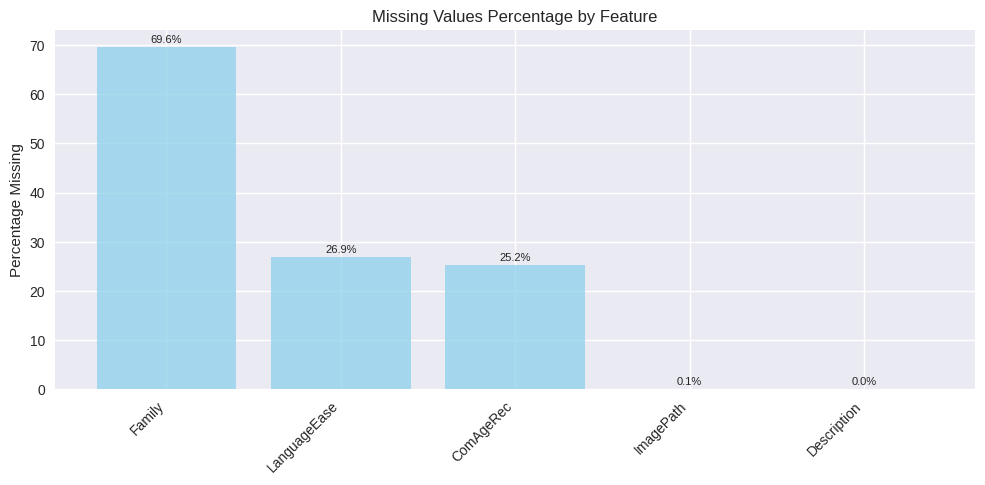

In [ ]:

# Filter only features with missing values
missing_plot_data = missing_df[missing_df['Missing Count'] > 0]

if not missing_plot_data.empty:
    plt.figure(figsize=(10, 5))
    plt.bar(missing_plot_data.index, missing_plot_data['Missing Percentage'], color='skyblue', alpha=0.7)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Percentage Missing')
    plt.title('Missing Values Percentage by Feature')

    # Optional: display the missing count above each bar
    for idx, val in enumerate(missing_plot_data['Missing Percentage']):
        plt.text(idx, val + 0.5, f"{val:.1f}%", ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("No missing values to display.")


In [ ]:
!pip install missingno


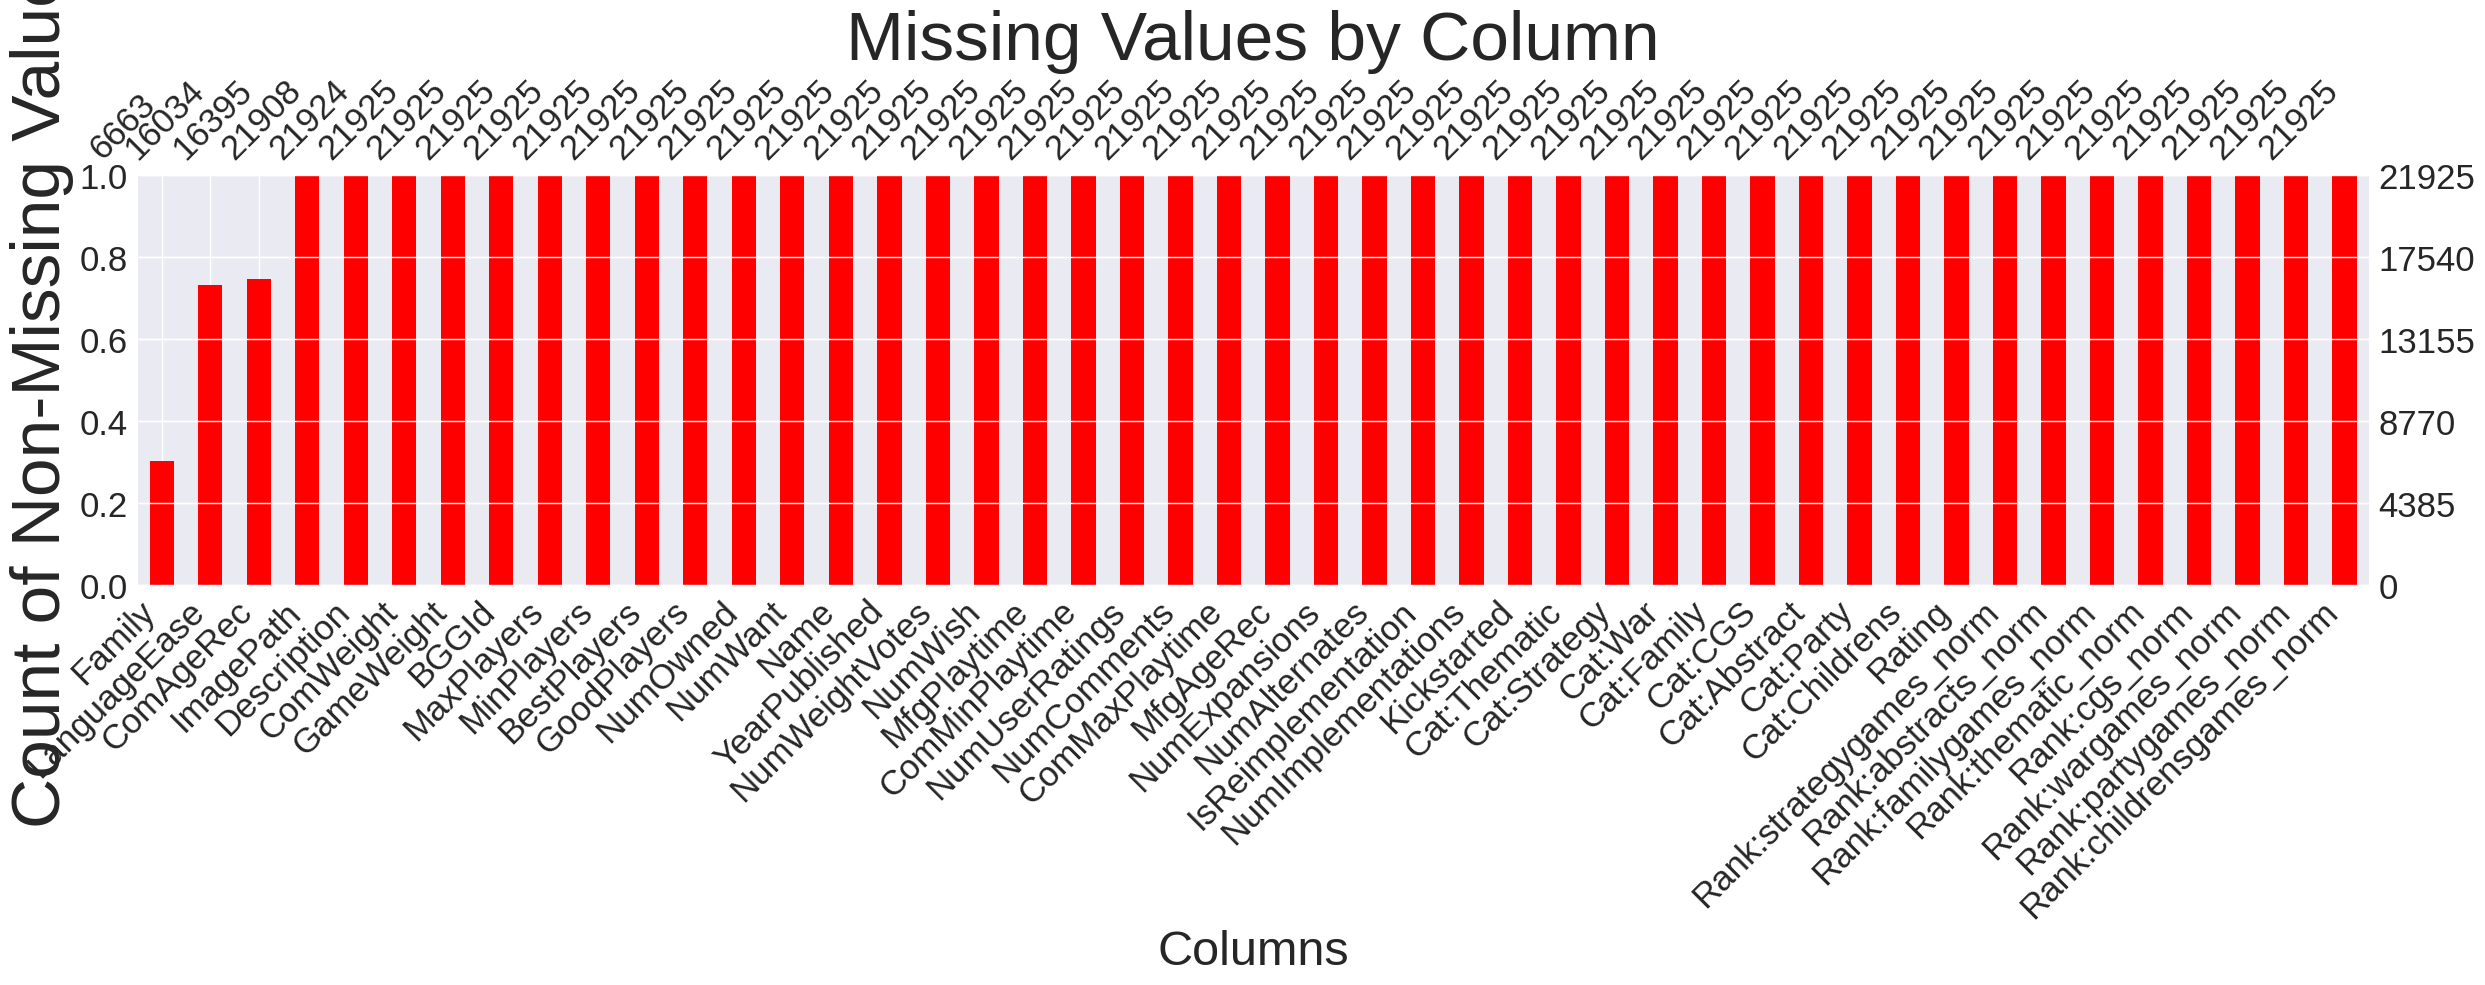

In [ ]:

import missingno as msno

# Create a figure with a custom size
plt.figure(figsize=(2, 2))

# Create the bar plot and capture the axis
ax = msno.bar(df,
              color="red",
              fontsize=25,
              log=False,
              sort="ascending")

# Customize labels and title
ax.set_title("Missing Values by Column", fontsize=50)
ax.set_xlabel("Columns", fontsize=35)
ax.set_ylabel("Count of Non-Missing Values", fontsize=50)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()


# 3. Data Cleaning Strategy

=== DATA CLEANING WITH PROPER ANALYSIS ===
1. ANALYZING NUMERICAL COLUMNS BEFORE IMPUTATION

Missing values before imputation:
ComAgeRec: 5530
LanguageEase: 5891


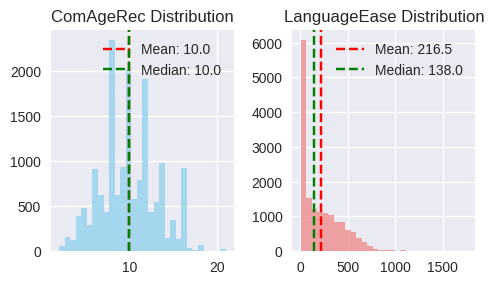

In [ ]:
print("=== DATA CLEANING WITH PROPER ANALYSIS ===")

# Create cleaned dataset
df_clean = df.copy()

print("1. ANALYZING NUMERICAL COLUMNS BEFORE IMPUTATION")

# Check missing values before imputation
print("\nMissing values before imputation:")
print(f"ComAgeRec: {df_clean['ComAgeRec'].isnull().sum()}")
print(f"LanguageEase: {df_clean['LanguageEase'].isnull().sum()}")

fig, axes = plt.subplots(1, 2, figsize=(5, 3))

# ComAgeRec distribution
axes[0].hist(df['ComAgeRec'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0].axvline(df['ComAgeRec'].mean(), color='red', linestyle='--', label=f'Mean: {df["ComAgeRec"].mean():.1f}')
axes[0].axvline(df['ComAgeRec'].median(), color='green', linestyle='--', label=f'Median: {df["ComAgeRec"].median():.1f}')
axes[0].set_title('ComAgeRec Distribution')
axes[0].legend()

# LanguageEase distribution
axes[1].hist(df['LanguageEase'].dropna(), bins=30, alpha=0.7, color='lightcoral')
axes[1].axvline(df['LanguageEase'].mean(), color='red', linestyle='--', label=f'Mean: {df["LanguageEase"].mean():.1f}')
axes[1].axvline(df['LanguageEase'].median(), color='green', linestyle='--', label=f'Median: {df["LanguageEase"].median():.1f}')
axes[1].set_title('LanguageEase Distribution')
axes[1].legend()


plt.tight_layout()
plt.show()


In [ ]:
print("=== NUMERICAL DATA CLEANING ===")


# Calculate skewness to decide mean vs median and IMPUTE missing values
print("\nSkewness analysis and imputation:")
for col in ['ComAgeRec', 'LanguageEase']:
    skew_val = df[col].skew()
    print(f"{col}: skewness = {skew_val:.2f}")

    if abs(skew_val) > 1:
        print(f"  → Using MEDIAN (skewed data)")
        impute_value = df[col].median()
    else:
        print(f"  → Using MEAN (normal distribution)")
        impute_value = df[col].mean()

    # IMPUTE MISSING VALUES
    missing_before = df_clean[col].isnull().sum()
    df_clean[col] = df_clean[col].fillna(impute_value)
    missing_after = df_clean[col].isnull().sum()

    print(f"  ✓ Filled {missing_before} missing values with: {impute_value:.1f}")
    print(f"  ✓ Remaining missing values: {missing_after}")

# Final verification
print("\n" + "="*50)
print("FINAL VERIFICATION")
print("="*50)
print("Missing values after imputation:")
print(f"ComAgeRec: {df_clean['ComAgeRec'].isnull().sum()}")
print(f"LanguageEase: {df_clean['LanguageEase'].isnull().sum()}")
print(f"Total missing values in dataset: {df_clean.isnull().sum().sum()}")

=== NUMERICAL DATA CLEANING ===

Skewness analysis and imputation:
ComAgeRec: skewness = 0.14
  → Using MEAN (normal distribution)
  ✓ Filled 5530 missing values with: 10.0
  ✓ Remaining missing values: 0
LanguageEase: skewness = 1.67
  → Using MEDIAN (skewed data)
  ✓ Filled 5891 missing values with: 138.0
  ✓ Remaining missing values: 0

FINAL VERIFICATION
Missing values after imputation:
ComAgeRec: 0
LanguageEase: 0
Total missing values in dataset: 15280


In [ ]:
df_clean.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0      1.8333     2.0512           2           4   8.000000         213.0   
1      1.0000     1.2256           2           5   8.000000          36.0   
2      3.6667     3.8190           1           5  10.004391         138.0   
3      1.3077     1.4216           2           2   7.000000         138.0   
4      1.5000     1.6230           2           4  10.004391           7.0   

   ...  Cat:Childrens  Rating  Rank:strategygames_norm  Rank:abstracts_norm  \
0  ...              0     Low                      0.0                  0.0   
1  ...              0  Medium                      0.0                  0.0   
2  ...              0    High                      0.0                  0.0   
3  ...              0     Low                      0.0                  0.0   
4  ...              0  Medium                      0.0                  0.0   

   Rank:familygames_norm  Rank:thematic_norm  Rank:cgs_norm  \
0                    0.0                 0.0            0.0   
1                    0.0                 0.0            0.0   
2                    0.0                 0.0            0.0   
3                    0.0                 0.0            0.0   
4                    0.0                 0.0            0.0   

   Rank:wargames_norm  Rank:partygames_norm  Rank:childrensgames_norm  
0                 0.0                   0.0                       0.0  
1                 0.0                   0.0                       0.0  
2                 0.0                   0.0                       0.0  
3                 0.0                   0.0                       0.0  
4                 0.0                   0.0                       0.0  

[5 rows x 46 columns]

In [ ]:
print("=== CATEGORICAL DATA CLEANING ===")


df_clean_clean = df_clean.copy()

# Check which categorical columns exist
categorical_cols_to_check = ['ImagePath', 'Description']
existing_categorical_cols = [col for col in categorical_cols_to_check if col in df_clean_clean.columns]

#print(f"\nExisting categorical columns to clean: {existing_categorical_cols}")

print("\nBefore cleaning - Missing values summary:")
for col in existing_categorical_cols:
    missing_count = df_clean_clean[col].isnull().sum()
    print(f"{col}: {missing_count} missing")

### Handle only the columns that actually exist

# Handle ImagePath if it exists
if 'ImagePath' in df_clean_clean.columns:
    df_clean_clean['HasImage'] = df_clean_clean['ImagePath'].notna().astype(int)
    df_clean_clean = df_clean_clean.drop('ImagePath', axis=1)
    print("\nCreated 'HasImage' binary indicator and dropped 'ImagePath' column")
else:
    print("\n'ImagePath' column not found - already handled")

# Handle Description if it exists
if 'Description' in df_clean_clean.columns:
    missing_description = df_clean_clean['Description'].isnull().sum()
    if missing_description > 0:
        df_clean_clean = df_clean_clean[df_clean_clean['Description'].notna()]
        print(f"Dropped {missing_description} row(s) with missing Description.")
    else:
        print("No missing values in Description")
else:
    print("'Description' column not found")


=== CATEGORICAL DATA CLEANING ===

Before cleaning - Missing values summary:
ImagePath: 17 missing
Description: 1 missing

Created 'HasImage' binary indicator and dropped 'ImagePath' column
Dropped 1 row(s) with missing Description.


In [ ]:
df_clean_clean.isnull().sum()

BGGId                           0
Name                            0
Description                     0
YearPublished                   0
GameWeight                      0
ComWeight                       0
MinPlayers                      0
MaxPlayers                      0
ComAgeRec                       0
LanguageEase                    0
BestPlayers                     0
GoodPlayers                     0
NumOwned                        0
NumWant                         0
NumWish                         0
NumWeightVotes                  0
MfgPlaytime                     0
ComMinPlaytime                  0
ComMaxPlaytime                  0
MfgAgeRec                       0
NumUserRatings                  0
NumComments                     0
NumAlternates                   0
NumExpansions                   0
NumImplementations              0
IsReimplementation              0
Family                      15262
Kickstarted                     0
Cat:Thematic                    0
Cat:Strategy                    0
Cat:War                         0
Cat:Family                      0
Cat:CGS                         0
Cat:Abstract                    0
Cat:Party                       0
Cat:Childrens                   0
Rating                          0
Rank:strategygames_norm         0
Rank:abstracts_norm             0
Rank:familygames_norm           0
Rank:thematic_norm              0
Rank:cgs_norm                   0
Rank:wargames_norm              0
Rank:partygames_norm            0
Rank:childrensgames_norm        0
HasImage                        0
dtype: int64

In [ ]:
df_clean_clean = df_clean_clean.drop('Family', axis = 1)

In [ ]:
df_clean_clean.isnull().sum()

BGGId                       0
Name                        0
Description                 0
YearPublished               0
GameWeight                  0
ComWeight                   0
MinPlayers                  0
MaxPlayers                  0
ComAgeRec                   0
LanguageEase                0
BestPlayers                 0
GoodPlayers                 0
NumOwned                    0
NumWant                     0
NumWish                     0
NumWeightVotes              0
MfgPlaytime                 0
ComMinPlaytime              0
ComMaxPlaytime              0
MfgAgeRec                   0
NumUserRatings              0
NumComments                 0
NumAlternates               0
NumExpansions               0
NumImplementations          0
IsReimplementation          0
Kickstarted                 0
Cat:Thematic                0
Cat:Strategy                0
Cat:War                     0
Cat:Family                  0
Cat:CGS                     0
Cat:Abstract                0
Cat:Party                   0
Cat:Childrens               0
Rating                      0
Rank:strategygames_norm     0
Rank:abstracts_norm         0
Rank:familygames_norm       0
Rank:thematic_norm          0
Rank:cgs_norm               0
Rank:wargames_norm          0
Rank:partygames_norm        0
Rank:childrensgames_norm    0
HasImage                    0
dtype: int64

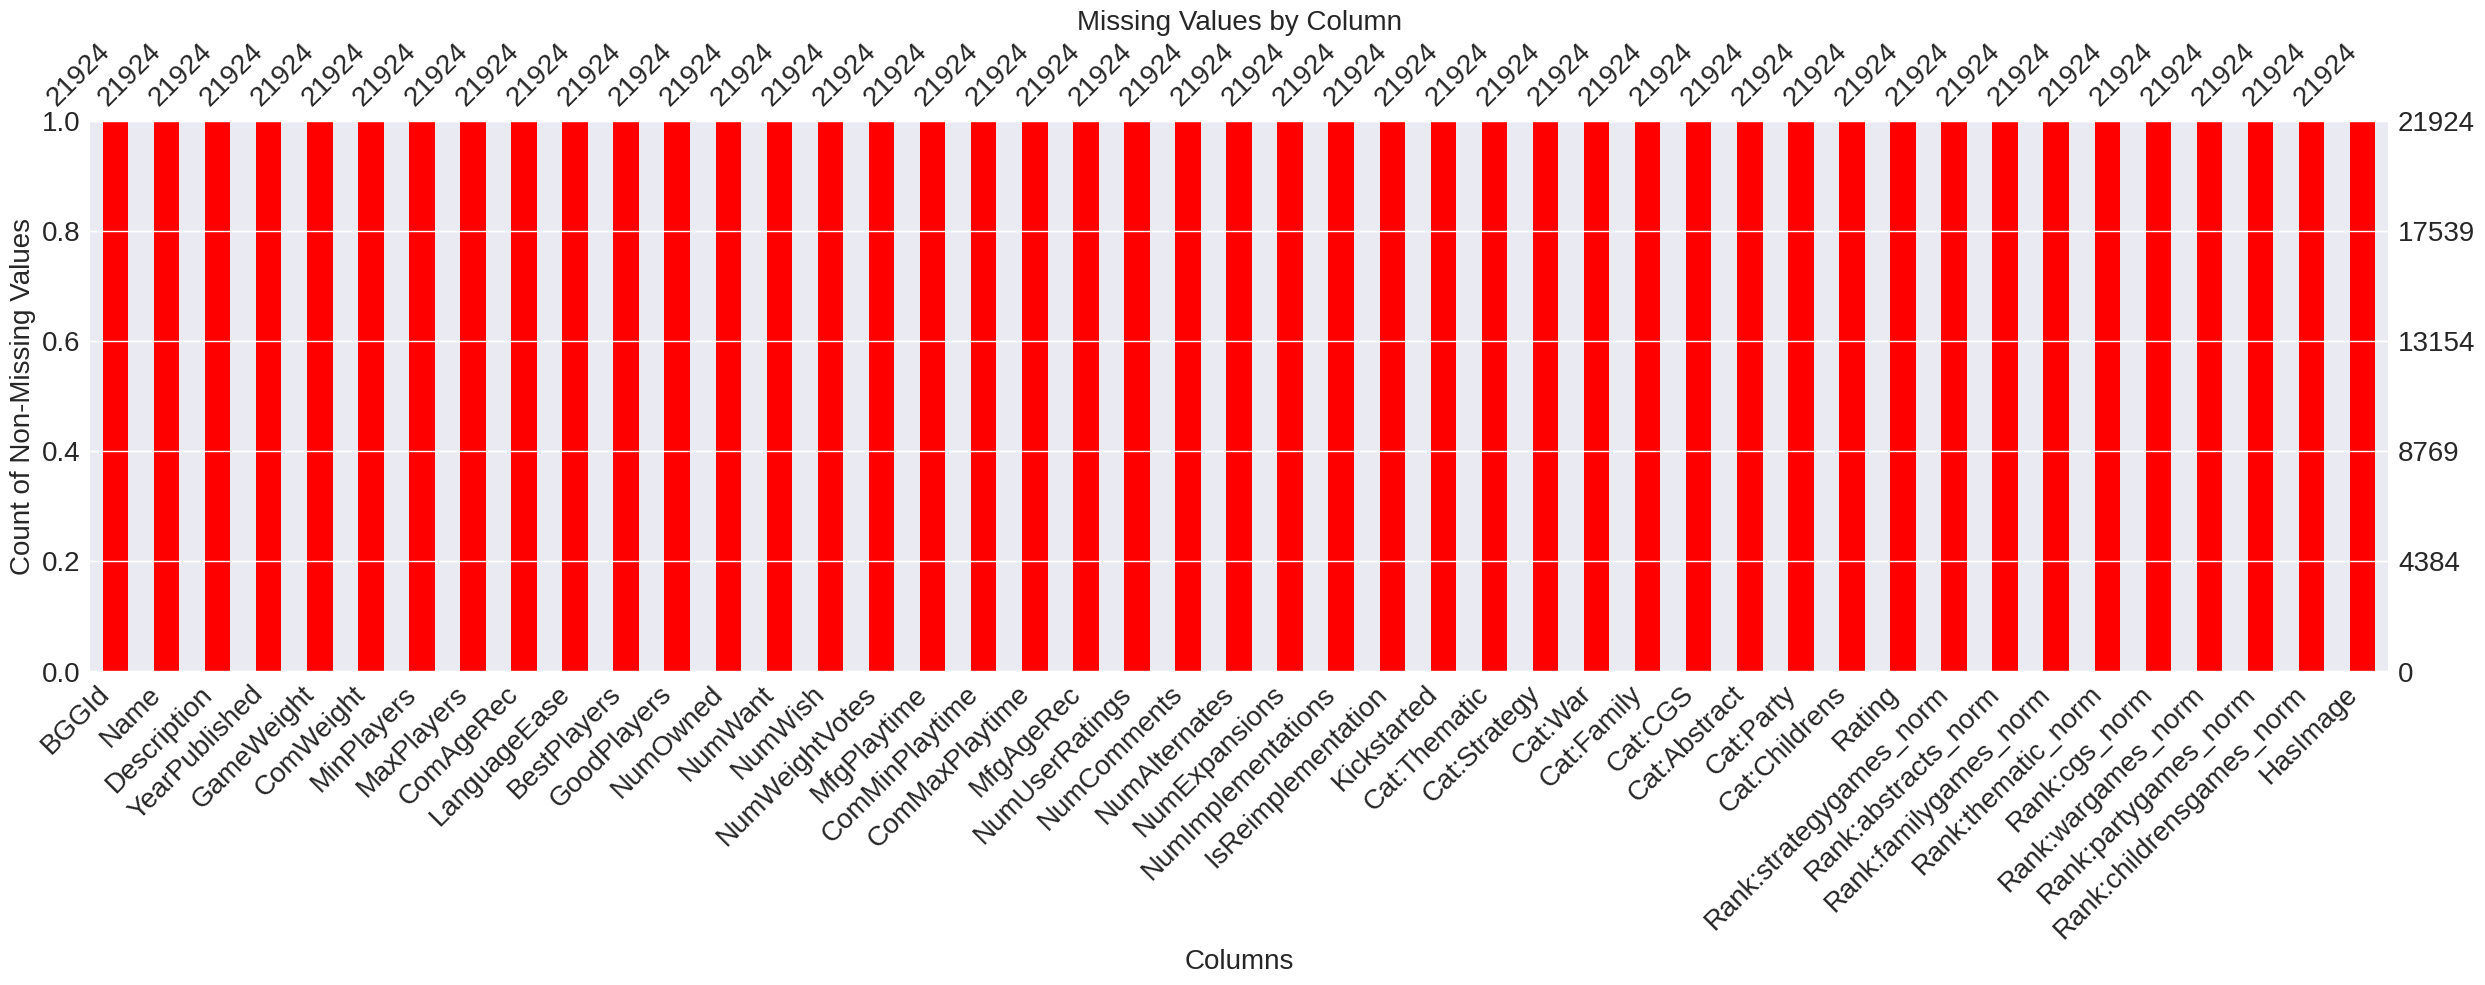

In [ ]:
import missingno as msno

# Create a figure with a custom size
plt.figure(figsize=(2, 2))

# Create the bar plot and capture the axis
ax = msno.bar(df_clean_clean,
              color="red",
              fontsize=20,
              log=False,
              sort="ascending")

# Customize labels and title
ax.set_title("Missing Values by Column", fontsize=20)
ax.set_xlabel("Columns", fontsize=20)
ax.set_ylabel("Count of Non-Missing Values", fontsize=20)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()

plt.show()


# 4. Exploratory Data Analysis (EDA)

### Drop the meaningless features

In [ ]:
df_clean_clean.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'ComWeight', 'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase',
       'BestPlayers', 'GoodPlayers', 'NumOwned', 'NumWant', 'NumWish',
       'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime', 'ComMaxPlaytime',
       'MfgAgeRec', 'NumUserRatings', 'NumComments', 'NumAlternates',
       'NumExpansions', 'NumImplementations', 'IsReimplementation',
       'Kickstarted', 'Cat:Thematic', 'Cat:Strategy', 'Cat:War', 'Cat:Family',
       'Cat:CGS', 'Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'Rating',
       'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:thematic_norm', 'Rank:cgs_norm',
       'Rank:wargames_norm', 'Rank:partygames_norm',
       'Rank:childrensgames_norm', 'HasImage'],
      dtype='object')

In [ ]:
df_clean_clean = df_clean_clean.drop(
    ['Cat:Strategy', 'Cat:Thematic', 'Cat:War', 'Cat:Family',
     'Cat:CGS','Cat:Abstract', 'Cat:Party', 'Cat:Childrens', 'NumComments'],
    axis=1
)
df_clean_clean.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  ComWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0      1.8333     2.0512           2           4   8.000000         213.0   
1      1.0000     1.2256           2           5   8.000000          36.0   
2      3.6667     3.8190           1           5  10.004391         138.0   
3      1.3077     1.4216           2           2   7.000000         138.0   
4      1.5000     1.6230           2           4  10.004391           7.0   

   ...  Rating Rank:strategygames_norm  Rank:abstracts_norm  \
0  ...     Low                     0.0                  0.0   
1  ...  Medium                     0.0                  0.0   
2  ...    High                     0.0                  0.0   
3  ...     Low                     0.0                  0.0   
4  ...  Medium                     0.0                  0.0   

   Rank:familygames_norm  Rank:thematic_norm  Rank:cgs_norm  \
0                    0.0                 0.0            0.0   
1                    0.0                 0.0            0.0   
2                    0.0                 0.0            0.0   
3                    0.0                 0.0            0.0   
4                    0.0                 0.0            0.0   

   Rank:wargames_norm  Rank:partygames_norm  Rank:childrensgames_norm  \
0                 0.0                   0.0                       0.0   
1                 0.0                   0.0                       0.0   
2                 0.0                   0.0                       0.0   
3                 0.0                   0.0                       0.0   
4                 0.0                   0.0                       0.0   

   HasImage  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 36 columns]

## A. Pairplot (Scatter matrix)


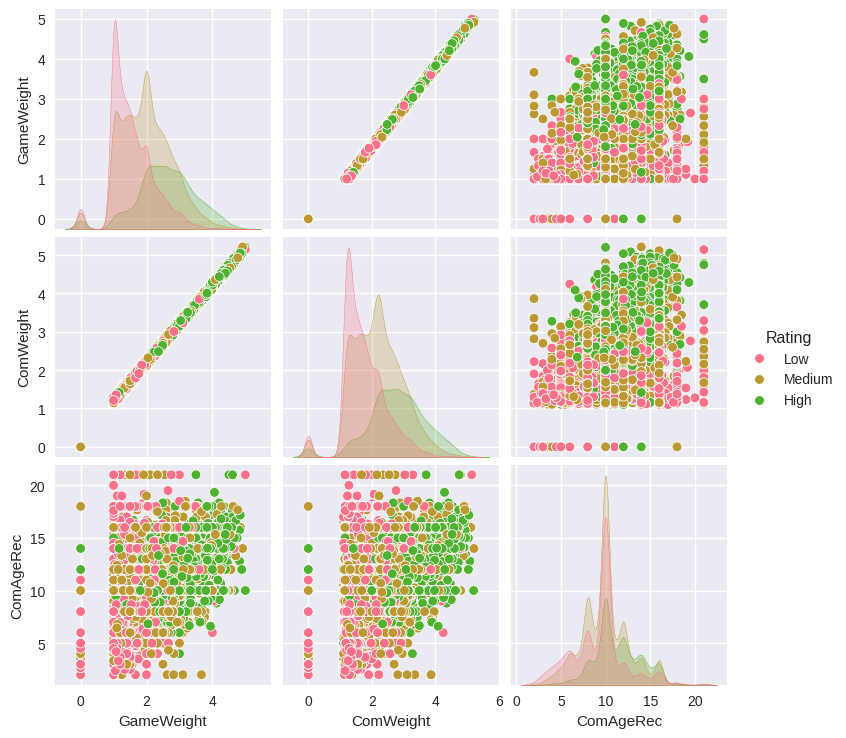

In [ ]:
sns.pairplot(df_clean_clean[['GameWeight', 'ComWeight', 'ComAgeRec', 'Rating']], hue = "Rating", diag_kind = "kde")
plt.show()

## B. Scatter plots

look at the bivariate data to see clusters of points, outliers, correlations

### a. Target variable 'Rating'

Check class balance

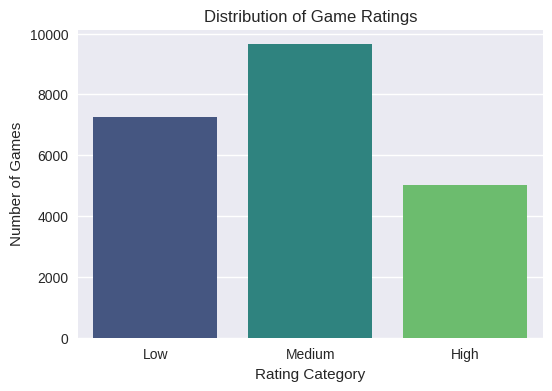

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Rating', data=df_clean_clean, palette='viridis')
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating Category')
plt.ylabel('Number of Games')
plt.show()


### NumOwned vs NumWish

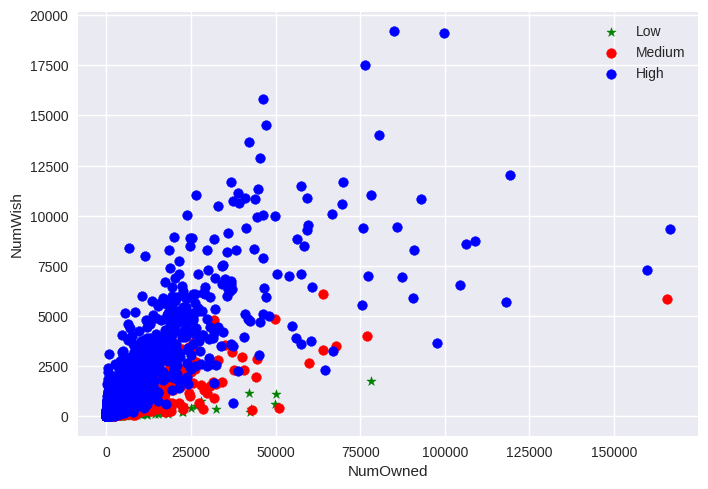

In [ ]:
df = df_clean_clean.copy()

plt.scatter(df[df['Rating'] == 'Low']['NumOwned'], df[df['Rating'] == 'Low']['NumWish'], color='g', marker='*', label='Low')
plt.scatter(df[df['Rating'] == 'Medium']['NumOwned'], df[df['Rating'] == 'Medium']['NumWish'], color='r', label='Medium')
plt.scatter(df[df['Rating'] == 'High']['NumOwned'], df[df['Rating'] == 'High']['NumWish'], color='b', label='High')

plt.xlabel('NumOwned')
plt.ylabel('NumWish')

plt.legend()
plt.show()

### MfgAgeRec vs ComAgeRec

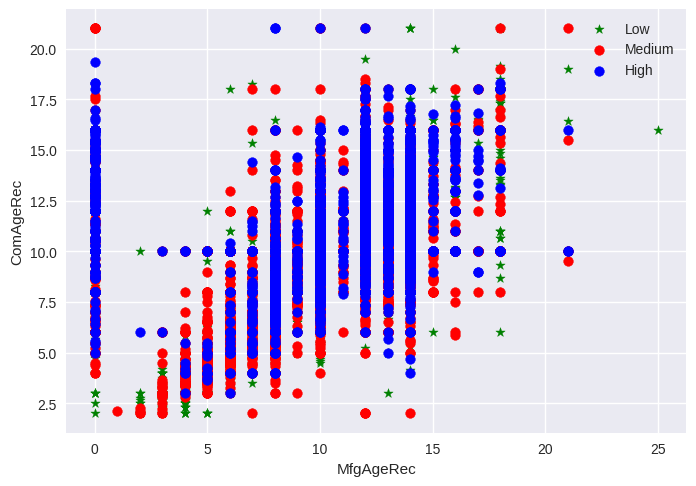

In [ ]:
plt.scatter(df[df['Rating'] == 'Low']['MfgAgeRec'], df[df['Rating'] == 'Low']['ComAgeRec'], color='g', marker='*', label='Low')
plt.scatter(df[df['Rating'] == 'Medium']['MfgAgeRec'], df[df['Rating'] == 'Medium']['ComAgeRec'], color='r', label='Medium')
plt.scatter(df[df['Rating'] == 'High']['MfgAgeRec'], df[df['Rating'] == 'High']['ComAgeRec'], color='b', label='High')

plt.xlabel('MfgAgeRec')
plt.ylabel('ComAgeRec')

plt.legend()
plt.show()

# C. Histograms

### Game Complexity - Histograms
Understand how GameWeight and ComWeight differ across ratings.

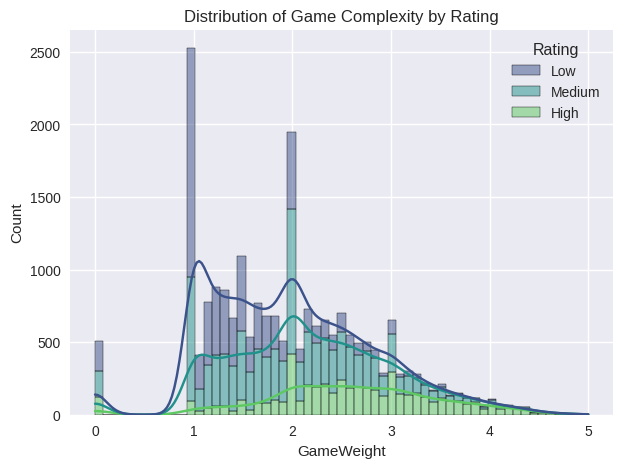

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='GameWeight', hue='Rating', kde=True, multiple='stack', palette='viridis')
plt.title('Distribution of Game Complexity by Rating')
plt.show()

##### Comment:


* The distribution shows that low-rated games tend to have higher average complexity (GameWeight): (1-3), suggesting that players on BoardGameGeek favor games with more strategic or challenging mechanics.

### Numbers of Players

See if highly rated games allow more or fewer players

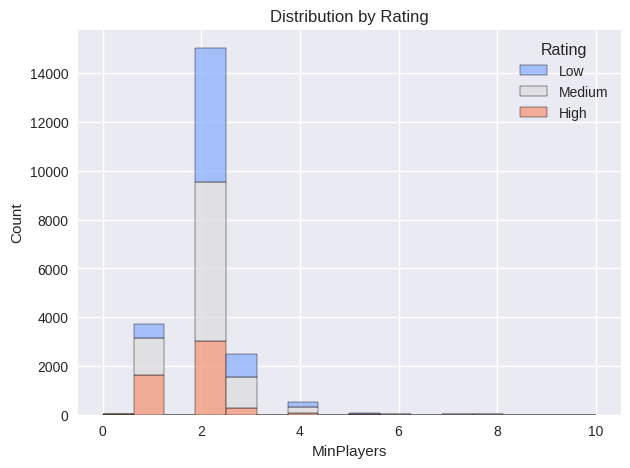

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='MinPlayers', hue='Rating', multiple='stack', palette='coolwarm')
#plt.xscale('log')
plt.title('Distribution by Rating')
plt.show()

### Playtime
Explore the relationship between play duration and rating.

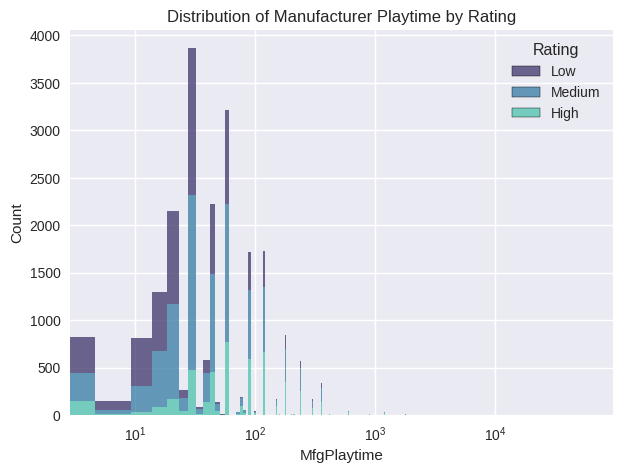

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='MfgPlaytime', hue='Rating', multiple='stack', palette='mako')
plt.xscale('log')
plt.title('Distribution of Manufacturer Playtime by Rating')
plt.show()

### Age Recommendations

See if target audience age correlates with higher/lower ratings

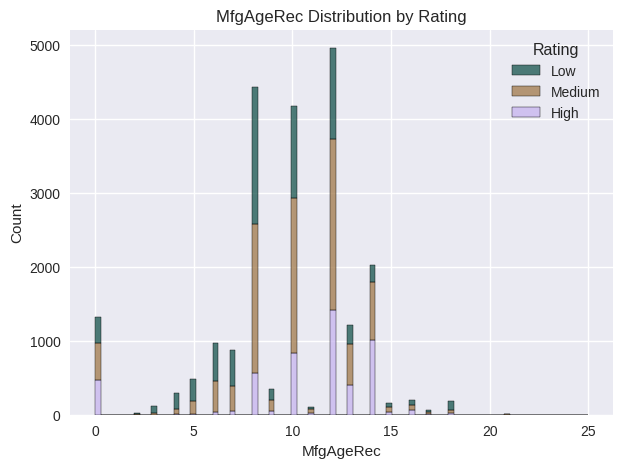

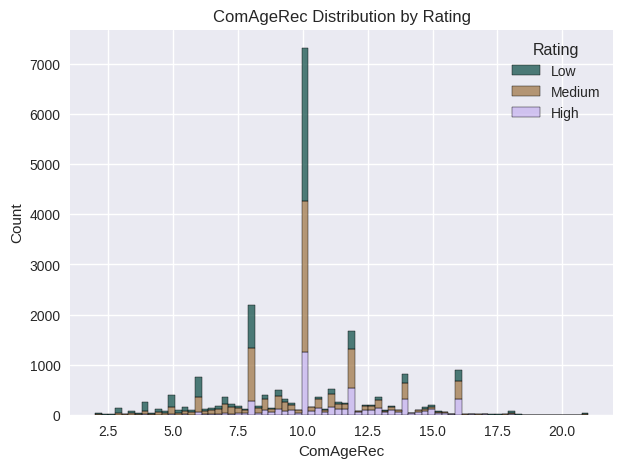

In [ ]:
for col in ['MfgAgeRec', 'ComAgeRec']:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=col, hue='Rating', multiple='stack', palette='cubehelix')
    plt.title(f'{col} Distribution by Rating')
    plt.show()


### Popularity Indicators vs Rating
Check if popular games (owned, wished, etc.) tend to be better rated

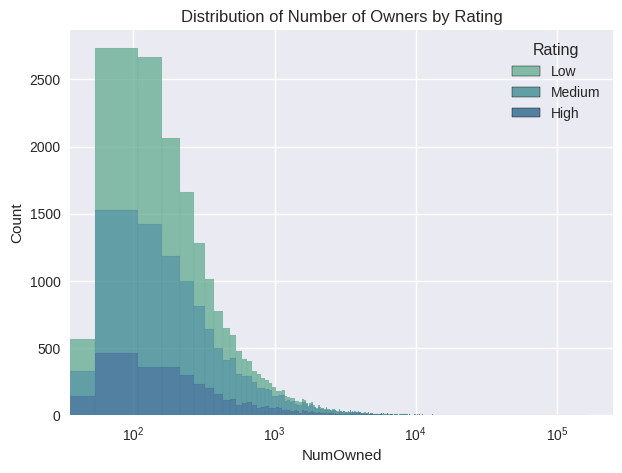

In [ ]:

plt.figure(figsize=(7,5))
sns.histplot(data=df, x='NumOwned', hue='Rating', multiple='stack', palette='crest')
plt.xscale('log')
plt.title('Distribution of Number of Owners by Rating')
plt.show()


## D. Bar Plot

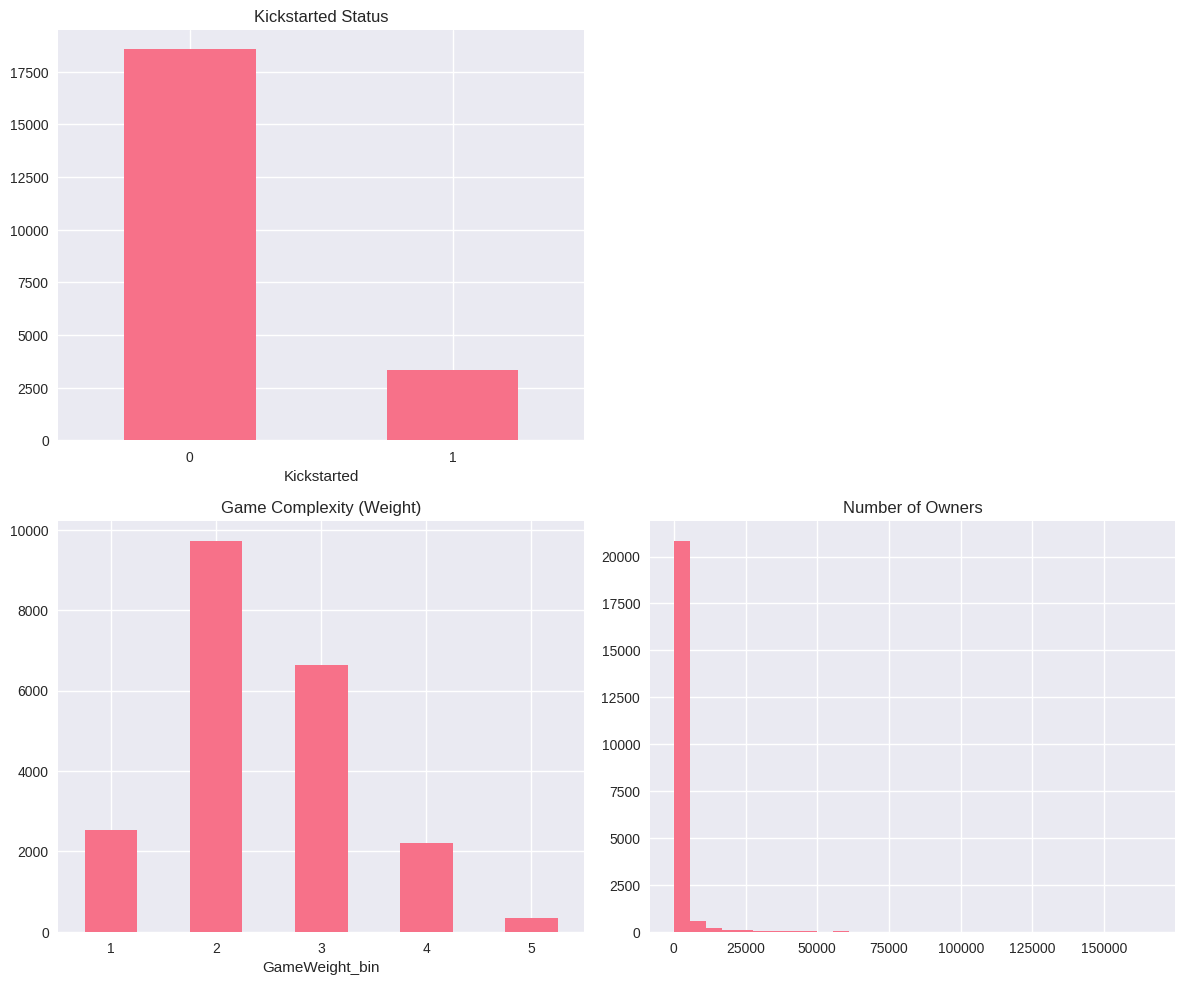

In [ ]:
# Prepare binned columns
df['GameWeight_bin'] = pd.cut(df['GameWeight'], bins=[0,1,2,3,4,5], labels=['1','2','3','4','5'])
df['YearPublished_bin'] = pd.cut(df['YearPublished'],
                                 bins=range(1900, 2030, 10),
                                 labels=[f'{y}s' for y in range(1900, 2020, 10)])

# Set up the figure
fig = plt.figure(figsize=(12, 10))
fig_dims = (2, 2)  # 2 rows x 2 columns

# 1️⃣ Kickstarted counts
plt.subplot2grid(fig_dims, (0, 0))
df['Kickstarted'].value_counts().plot(kind='bar', title='Kickstarted Status')
plt.xticks(rotation=0)


# 3️⃣ GameWeight_bin counts
plt.subplot2grid(fig_dims, (1, 0))
df['GameWeight_bin'].value_counts().sort_index().plot(kind='bar', title='Game Complexity (Weight)')
plt.xticks(rotation=0)

# 4️⃣ NumOwned histogram
plt.subplot2grid(fig_dims, (1, 1))
df['NumOwned'].hist(bins=30)
plt.title('Number of Owners')

plt.tight_layout()
plt.show()


## E. Bar Plot

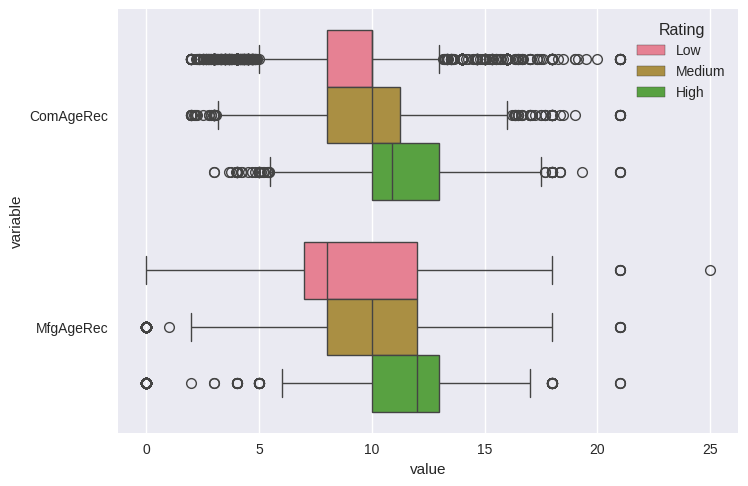

In [ ]:
df_sns = df.melt(value_vars = ["ComAgeRec", "MfgAgeRec"], id_vars = ["Rating"])
sns.boxplot(data=df_sns, x='value', y = 'variable', hue = 'Rating', orient = 'h')
plt.show()

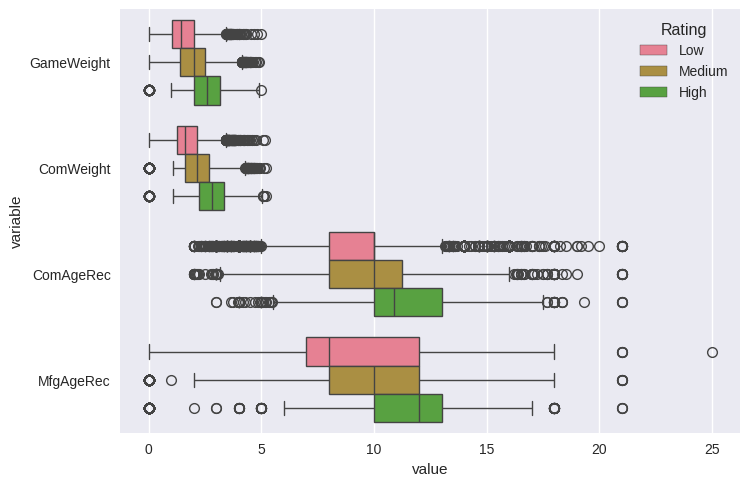

In [ ]:
df_sns = df.melt(value_vars = ["GameWeight", "ComWeight", "ComAgeRec", "MfgAgeRec"], id_vars = ["Rating"])
sns.boxplot(data=df_sns, x='value', y = 'variable', hue = 'Rating', orient = 'h')
plt.show()

Text(0.5, 1.0, 'ComWeight vs Rating')

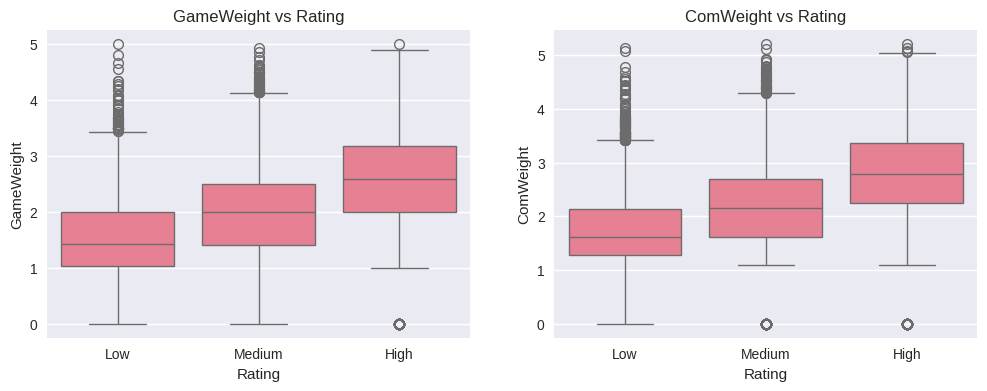

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(x='Rating', y='GameWeight', data=df, ax = axes[0])
sns.boxplot(x='Rating', y='ComWeight', data=df, ax=axes[1])
axes[0].set_title('GameWeight vs Rating')
axes[1].set_title("ComWeight vs Rating")

# Handling Outliers

In [ ]:

# Copy to avoid modifying original
df_out = df.copy()

# Select numeric columns to handle outliers
numeric_cols = df_out.select_dtypes(include='number').columns

for col in numeric_cols:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Compute 5th and 95th percentiles for capping
    p5 = df_out[col].quantile(0.05)
    p95 = df_out[col].quantile(0.95)

    # Cap values outside the bounds
    df_out[col] = df_out[col].apply(lambda x: p5 if x < lower_bound else (p95 if x > upper_bound else x))

print("Outliers capped successfully.")


Outliers capped successfully.


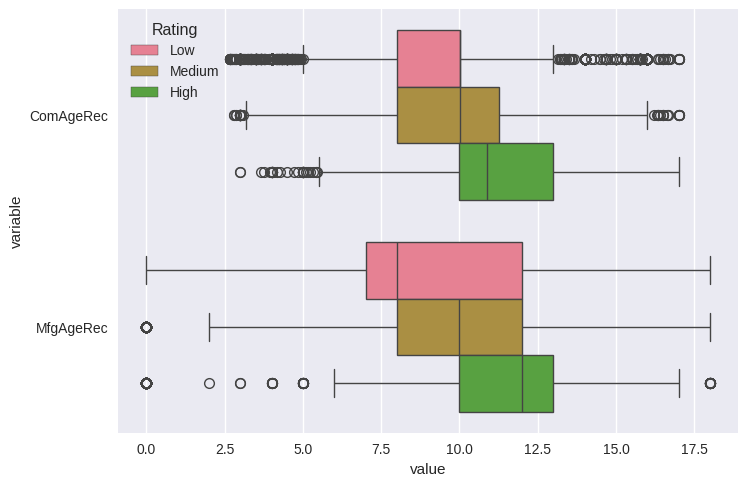

In [ ]:
df_sns = df_out.melt(value_vars = ["ComAgeRec", "MfgAgeRec"], id_vars = ["Rating"])
sns.boxplot(data=df_sns, x='value', y = 'variable', hue = 'Rating', orient = 'h')
plt.show()

# Correlation Analysis

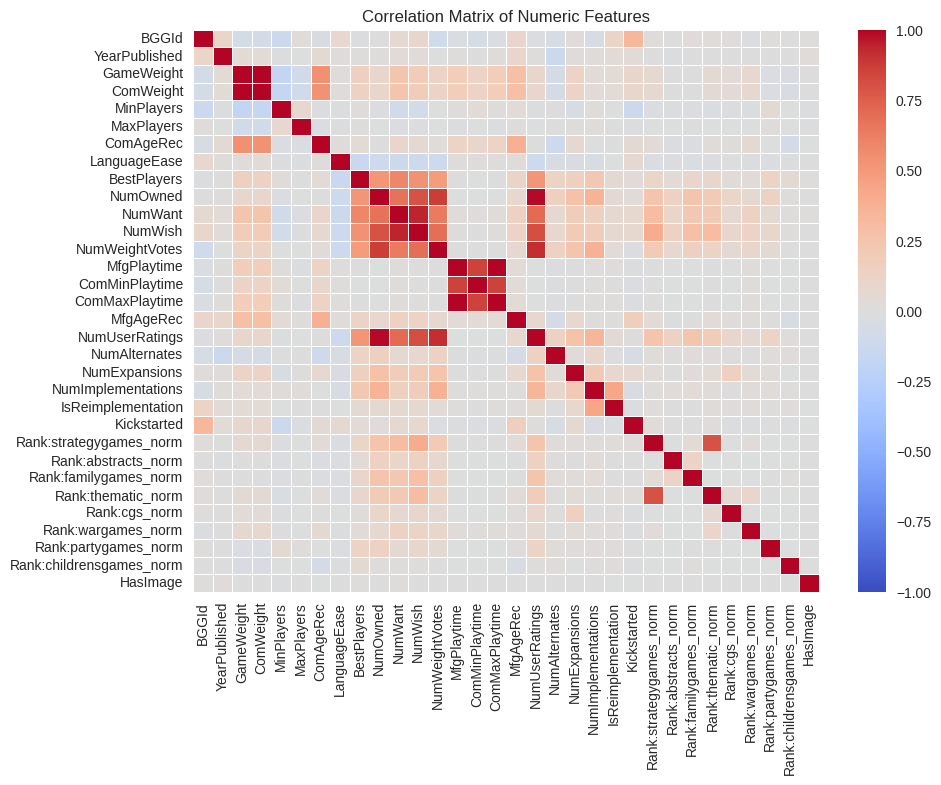

Highly correlated pairs (|r| > 0.8):
                        Var1                Var2  Correlation
61                GameWeight           ComWeight     0.997268
245                 NumOwned      NumWeightVotes     0.874875
250                 NumOwned      NumUserRatings     0.985474
265                  NumWant             NumWish     0.939757
291                  NumWish      NumUserRatings     0.814348
310           NumWeightVotes      NumUserRatings     0.917185
325              MfgPlaytime      ComMinPlaytime     0.854678
326              MfgPlaytime      ComMaxPlaytime     1.000000
343           ComMinPlaytime      ComMaxPlaytime     0.854678
462  Rank:strategygames_norm  Rank:thematic_norm     0.803527


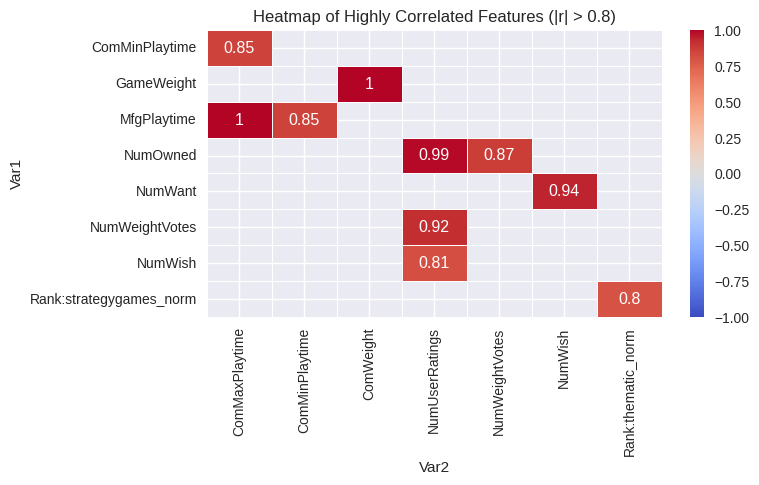

Original number of numeric features: 32
Reduced number of numeric features: 25
Number of PCA components explaining 95% variance: 22


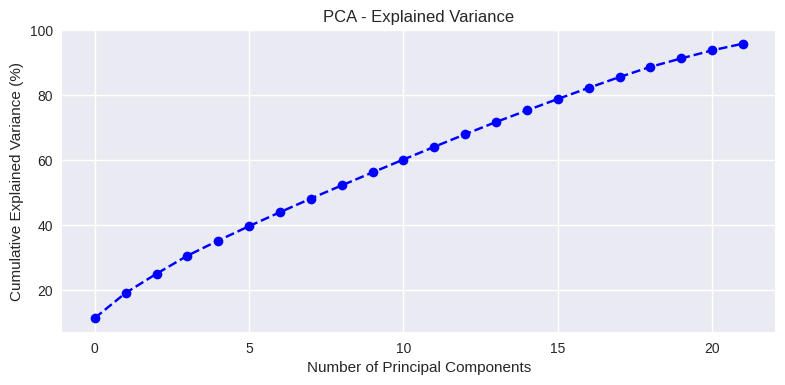

Columns retained in final dataframe:
Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
       'GoodPlayers', 'NumOwned', 'NumWant', 'MfgPlaytime', 'MfgAgeRec',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rating',
       'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:cgs_norm', 'Rank:wargames_norm',
       'Rank:partygames_norm', 'Rank:childrensgames_norm', 'HasImage'],
      dtype='object')


In [ ]:
from sklearn.decomposition import PCA
# -------------------------------
# 0️⃣ Make a copy of your cleaned dataframe
df_out = df_clean_clean.copy()

# -------------------------------
# 1️⃣ Identify numeric columns
numeric_cols = df_out.select_dtypes(include='number').columns
X = df_out[numeric_cols].copy()

# -------------------------------
# 2️⃣ Full correlation matrix
corr_matrix = X.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

# -------------------------------
# 3️⃣ Identify highly correlated features (|r| > 0.8)
threshold = 0.8

high_corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
high_corr_pairs.columns = ["Var1", "Var2", "Correlation"]
high_corr_pairs = high_corr_pairs[high_corr_pairs["Correlation"].abs() > threshold]

print("Highly correlated pairs (|r| > 0.8):")
print(high_corr_pairs)

# -------------------------------
# 3a️⃣ Plot highly correlated features
if not high_corr_pairs.empty:
    plt.figure(figsize=(8, 5))
    # Convert pairs to a square matrix for heatmap
    high_corr_matrix = high_corr_pairs.pivot(index="Var1", columns="Var2", values="Correlation")
    sns.heatmap(high_corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Heatmap of Highly Correlated Features (|r| > 0.8)")
    plt.tight_layout()
    plt.show()

# -------------------------------
# 4️⃣ Drop redundant features while keeping original names
to_drop = set()
for var1, var2 in zip(high_corr_pairs['Var1'], high_corr_pairs['Var2']):
    to_drop.add(var2)  # arbitrarily drop the second variable in each pair

df_reduced = df_out.drop(columns=to_drop)
print(f"Original number of numeric features: {len(numeric_cols)}")
print(f"Reduced number of numeric features: {len(df_reduced.select_dtypes(include='number').columns)}")

# -------------------------------
# 5️⃣ Use PCA for guidance (optional)
X_reduced = df_reduced.select_dtypes(include='number')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

pca = PCA(n_components=0.95)  # retain 95% of variance
pca.fit(X_scaled)
print(f"Number of PCA components explaining 95% variance: {pca.n_components_}")

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ Final reduced dataframe with original column names
df_final = df_reduced.copy()
print("Columns retained in final dataframe:")
print(df_final.columns)



In [ ]:
df_final.shape

(21924, 29)

In [ ]:
df_final.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
       'GoodPlayers', 'NumOwned', 'NumWant', 'MfgPlaytime', 'MfgAgeRec',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Kickstarted', 'Rating',
       'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:cgs_norm', 'Rank:wargames_norm',
       'Rank:partygames_norm', 'Rank:childrensgames_norm', 'HasImage'],
      dtype='object')

In [ ]:
df = df_final.copy()
df.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0      1.8333           2           4   8.000000         213.0            0   
1      1.0000           2           5   8.000000          36.0            0   
2      3.6667           1           5  10.004391         138.0            0   
3      1.3077           2           2   7.000000         138.0            0   
4      1.5000           2           4  10.004391           7.0            0   

   ... Kickstarted  Rating  Rank:strategygames_norm  Rank:abstracts_norm  \
0  ...           0     Low                      0.0                  0.0   
1  ...           0  Medium                      0.0                  0.0   
2  ...           0    High                      0.0                  0.0   
3  ...           0     Low                      0.0                  0.0   
4  ...           0  Medium                      0.0                  0.0   

   Rank:familygames_norm  Rank:cgs_norm  Rank:wargames_norm  \
0                    0.0            0.0                 0.0   
1                    0.0            0.0                 0.0   
2                    0.0            0.0                 0.0   
3                    0.0            0.0                 0.0   
4                    0.0            0.0                 0.0   

   Rank:partygames_norm  Rank:childrensgames_norm  HasImage  
0                   0.0                       0.0         1  
1                   0.0                       0.0         1  
2                   0.0                       0.0         1  
3                   0.0                       0.0         1  
4                   0.0                       0.0         1  

[5 rows x 29 columns]

In [ ]:
single_df = df[['Kickstarted', 'Rating']]
single_df.head()

Kickstarted  Rating
0            0     Low
1            0  Medium
2            0    High
3            0     Low
4            0  Medium

In [ ]:
# df = df.drop(['YearPublished_bin', 'GameWeight_bin'], axis = 1)

In [ ]:
df['Rating'] = df['Rating'].replace({'Low':0, 'Medium':1, 'High':2})


In [ ]:
df.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...           2014   
1  bag chip party game face crucial choice score ...           2021   
2  big box contain component gugravegng deluxe ed...           2020   
3  publisherthe reveal game secret wordsletterfli...           2004   
4  rescue   mayan   treasure       easy   task   ...           2019   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0      1.8333           2           4   8.000000         213.0            0   
1      1.0000           2           5   8.000000          36.0            0   
2      3.6667           1           5  10.004391         138.0            0   
3      1.3077           2           2   7.000000         138.0            0   
4      1.5000           2           4  10.004391           7.0            0   

   ... Kickstarted  Rating  Rank:strategygames_norm  Rank:abstracts_norm  \
0  ...           0       0                      0.0                  0.0   
1  ...           0       1                      0.0                  0.0   
2  ...           0       2                      0.0                  0.0   
3  ...           0       0                      0.0                  0.0   
4  ...           0       1                      0.0                  0.0   

   Rank:familygames_norm  Rank:cgs_norm  Rank:wargames_norm  \
0                    0.0            0.0                 0.0   
1                    0.0            0.0                 0.0   
2                    0.0            0.0                 0.0   
3                    0.0            0.0                 0.0   
4                    0.0            0.0                 0.0   

   Rank:partygames_norm  Rank:childrensgames_norm  HasImage  
0                   0.0                       0.0         1  
1                   0.0                       0.0         1  
2                   0.0                       0.0         1  
3                   0.0                       0.0         1  
4                   0.0                       0.0         1  

[5 rows x 29 columns]

In [ ]:
df  = df.drop(['Kickstarted', 'Rating'], axis=1)

In [ ]:
mask1 = df.columns == 'Kickstarted'
mask2 = df.columns == 'Rating'
mask1, mask2

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]))

# 5. Normalization/Standardization

In [ ]:
# ----------------------------
# 1️⃣ Detect binary indicator columns
# ----------------------------
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print("Binary indicator columns detected:", binary_cols)

Binary indicator columns detected: ['IsReimplementation', 'HasImage']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling from the CLEANED dataset
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exclude ID columns and binary indicators
exclude_cols = ['BGGId'] + binary_cols
cols_to_scale = [col for col in numerical_cols if col not in exclude_cols and df_clean[col].nunique() > 2]

# Apply MinMax scaling to the CLEANED dataset

df_scaled = df.copy()
scaler = MinMaxScaler()

for col in cols_to_scale:
    df_scaled[col] = scaler.fit_transform(df_scaled[[col]])
df_scaled.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...       0.998732   
1  bag chip party game face crucial choice score ...       1.000000   
2  big box contain component gugravegng deluxe ed...       0.999819   
3  publisherthe reveal game secret wordsletterfli...       0.996921   
4  rescue   mayan   treasure       easy   task   ...       0.999638   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0     0.36666         0.2    0.004004   0.315789      0.120729          0.0   
1     0.20000         0.2    0.005005   0.315789      0.019932          0.0   
2     0.73334         0.1    0.005005   0.421284      0.078018          0.0   
3     0.26154         0.2    0.002002   0.263158      0.078018          0.0   
4     0.30000         0.2    0.004004   0.421284      0.003417          0.0   

   ... NumImplementations  IsReimplementation  Rank:strategygames_norm  \
0  ...                0.0                   0                      0.0   
1  ...                0.0                   0                      0.0   
2  ...                0.0                   0                      0.0   
3  ...                0.0                   0                      0.0   
4  ...                0.0                   0                      0.0   

   Rank:abstracts_norm  Rank:familygames_norm  Rank:cgs_norm  \
0                  0.0                    0.0            0.0   
1                  0.0                    0.0            0.0   
2                  0.0                    0.0            0.0   
3                  0.0                    0.0            0.0   
4                  0.0                    0.0            0.0   

   Rank:wargames_norm  Rank:partygames_norm  Rank:childrensgames_norm  \
0                 0.0                   0.0                       0.0   
1                 0.0                   0.0                       0.0   
2                 0.0                   0.0                       0.0   
3                 0.0                   0.0                       0.0   
4                 0.0                   0.0                       0.0   

   HasImage  
0         1  
1         1  
2         1  
3         1  
4         1  

[5 rows x 27 columns]

In [ ]:
df_scaled = pd.concat([df_scaled, single_df], axis=1)
mask1 = df_scaled.columns == 'Kickstarted'
mask2 = df_scaled.columns == 'Rating'
df_scaled.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...       0.998732   
1  bag chip party game face crucial choice score ...       1.000000   
2  big box contain component gugravegng deluxe ed...       0.999819   
3  publisherthe reveal game secret wordsletterfli...       0.996921   
4  rescue   mayan   treasure       easy   task   ...       0.999638   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0     0.36666         0.2    0.004004   0.315789      0.120729          0.0   
1     0.20000         0.2    0.005005   0.315789      0.019932          0.0   
2     0.73334         0.1    0.005005   0.421284      0.078018          0.0   
3     0.26154         0.2    0.002002   0.263158      0.078018          0.0   
4     0.30000         0.2    0.004004   0.421284      0.003417          0.0   

   ... Rank:strategygames_norm  Rank:abstracts_norm  Rank:familygames_norm  \
0  ...                     0.0                  0.0                    0.0   
1  ...                     0.0                  0.0                    0.0   
2  ...                     0.0                  0.0                    0.0   
3  ...                     0.0                  0.0                    0.0   
4  ...                     0.0                  0.0                    0.0   

   Rank:cgs_norm  Rank:wargames_norm  Rank:partygames_norm  \
0            0.0                 0.0                   0.0   
1            0.0                 0.0                   0.0   
2            0.0                 0.0                   0.0   
3            0.0                 0.0                   0.0   
4            0.0                 0.0                   0.0   

   Rank:childrensgames_norm  HasImage  Kickstarted  Rating  
0                       0.0         1            0     Low  
1                       0.0         1            0  Medium  
2                       0.0         1            0    High  
3                       0.0         1            0     Low  
4                       0.0         1            0  Medium  

[5 rows x 29 columns]

In [ ]:

########### Important note: This process is done after the normalization because Rating is our target variable  ########

df_scaled['Rating'] = df_scaled['Rating'].replace({'Low':0, 'Medium':1, 'High':2})


In [ ]:
df_scaled.columns[df_scaled.columns.duplicated()]

Index([], dtype='object')

In [ ]:
duplicated_cols = df_scaled.columns[df_scaled.columns.duplicated()].unique()
print(duplicated_cols)

Index([], dtype='object')


In [ ]:
df_scaled = df_scaled.iloc[:, ~df_scaled.columns.duplicated()]

In [ ]:
df_scaled.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...       0.998732   
1  bag chip party game face crucial choice score ...       1.000000   
2  big box contain component gugravegng deluxe ed...       0.999819   
3  publisherthe reveal game secret wordsletterfli...       0.996921   
4  rescue   mayan   treasure       easy   task   ...       0.999638   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0     0.36666         0.2    0.004004   0.315789      0.120729          0.0   
1     0.20000         0.2    0.005005   0.315789      0.019932          0.0   
2     0.73334         0.1    0.005005   0.421284      0.078018          0.0   
3     0.26154         0.2    0.002002   0.263158      0.078018          0.0   
4     0.30000         0.2    0.004004   0.421284      0.003417          0.0   

   ... Rank:strategygames_norm  Rank:abstracts_norm  Rank:familygames_norm  \
0  ...                     0.0                  0.0                    0.0   
1  ...                     0.0                  0.0                    0.0   
2  ...                     0.0                  0.0                    0.0   
3  ...                     0.0                  0.0                    0.0   
4  ...                     0.0                  0.0                    0.0   

   Rank:cgs_norm  Rank:wargames_norm  Rank:partygames_norm  \
0            0.0                 0.0                   0.0   
1            0.0                 0.0                   0.0   
2            0.0                 0.0                   0.0   
3            0.0                 0.0                   0.0   
4            0.0                 0.0                   0.0   

   Rank:childrensgames_norm  HasImage  Kickstarted  Rating  
0                       0.0         1            0       0  
1                       0.0         1            0       1  
2                       0.0         1            0       2  
3                       0.0         1            0       0  
4                       0.0         1            0       1  

[5 rows x 29 columns]

In [ ]:
df_scaled.to_csv('df_scaled_test_clustering.csv', index = False)

In [ ]:
df_save = pd.read_csv('df_scaled_test_clustering.csv')
df_save.head(5)

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...       0.998732   
1  bag chip party game face crucial choice score ...       1.000000   
2  big box contain component gugravegng deluxe ed...       0.999819   
3  publisherthe reveal game secret wordsletterfli...       0.996921   
4  rescue   mayan   treasure       easy   task   ...       0.999638   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0     0.36666         0.2    0.004004   0.315789      0.120729          0.0   
1     0.20000         0.2    0.005005   0.315789      0.019932          0.0   
2     0.73334         0.1    0.005005   0.421284      0.078018          0.0   
3     0.26154         0.2    0.002002   0.263158      0.078018          0.0   
4     0.30000         0.2    0.004004   0.421284      0.003417          0.0   

   ... Rank:strategygames_norm  Rank:abstracts_norm  Rank:familygames_norm  \
0  ...                     0.0                  0.0                    0.0   
1  ...                     0.0                  0.0                    0.0   
2  ...                     0.0                  0.0                    0.0   
3  ...                     0.0                  0.0                    0.0   
4  ...                     0.0                  0.0                    0.0   

   Rank:cgs_norm  Rank:wargames_norm  Rank:partygames_norm  \
0            0.0                 0.0                   0.0   
1            0.0                 0.0                   0.0   
2            0.0                 0.0                   0.0   
3            0.0                 0.0                   0.0   
4            0.0                 0.0                   0.0   

   Rank:childrensgames_norm  HasImage  Kickstarted  Rating  
0                       0.0         1            0       0  
1                       0.0         1            0       1  
2                       0.0         1            0       2  
3                       0.0         1            0       0  
4                       0.0         1            0       1  

[5 rows x 29 columns]

In [ ]:
df_save.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
       'GoodPlayers', 'NumOwned', 'NumWant', 'MfgPlaytime', 'MfgAgeRec',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:cgs_norm', 'Rank:wargames_norm',
       'Rank:partygames_norm', 'Rank:childrensgames_norm', 'HasImage',
       'Kickstarted', 'Rating'],
      dtype='object')

In [ ]:

df_scaled = df_save.copy()

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId", "YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]




df_complexity = df_scaled[complexity_features].copy()
df_popularity = df_scaled[popularity_features].copy()
df_comprehensive = df_scaled[comprehensive_features].copy()

## TASK 2: Clustering

Analysis by centroid-based methods

    • K-Means (mandatory), Bisecting K-Means (optional), X-Means (optional);
    • Choose the attributes, identify the best value of k, discuss the clusters.
    
• Analysis by density-based clustering

    • DBSCAN (mandatory), OPTICS (optional);
    • Choose the attributes, identify the best parameter configuration, discuss clusters.
    
• Analysis by hierarchical clustering

    • Choose the attributes, the distance function, analyze several dendrograms.
• Final discussion
    
    • Which is the best algorithm? Remember that best is studied w.r.t. several aggregate
statistics, cluster distributions and w.r.t. the typology of algorithm used for that particular
dataset;

## 1. Analysis by centroid-based methods

    • K-Means (mandatory), Bisecting K-Means (optional), X-Means (optional);
    • Choose the attributes, identify the best value of k, discuss the clusters.
    

## a) K-Means Implementation

### Approach A: Game Complexity & Player Experience

Justification: Clusters games by how hard they are to play. Groups simple family games, complex strategy games, and quick party games based on difficulty, player count, and playtime.

=== SSE and Silhouette Scores for each k ===
k  | SSE      | Silhouette
---|----------|-----------
 2 |  1454.52 | 0.2840
 3 |  1265.98 | 0.1935
 4 |  1104.44 | 0.2129
 5 |   987.49 | 0.2240
 6 |   905.20 | 0.2044
 7 |   845.33 | 0.2050
 8 |   790.99 | 0.2128
 9 |   750.19 | 0.1937
10 |   707.03 | 0.2153
11 |   672.19 | 0.2053
12 |   639.36 | 0.2120
13 |   613.78 | 0.2162
14 |   589.79 | 0.2145
15 |   571.31 | 0.2029
16 |   546.67 | 0.2220
17 |   530.05 | 0.2059
18 |   513.39 | 0.2058
19 |   501.09 | 0.2188

Selected optimal k: 3


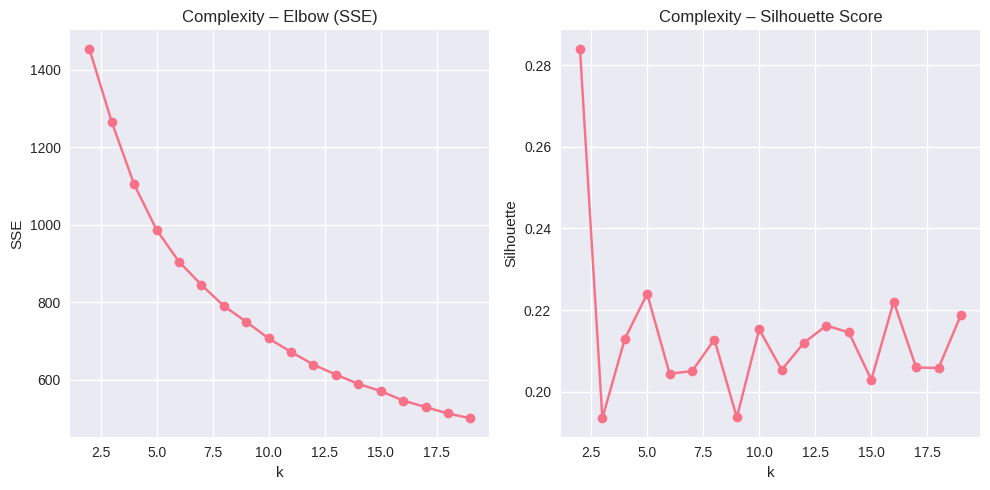

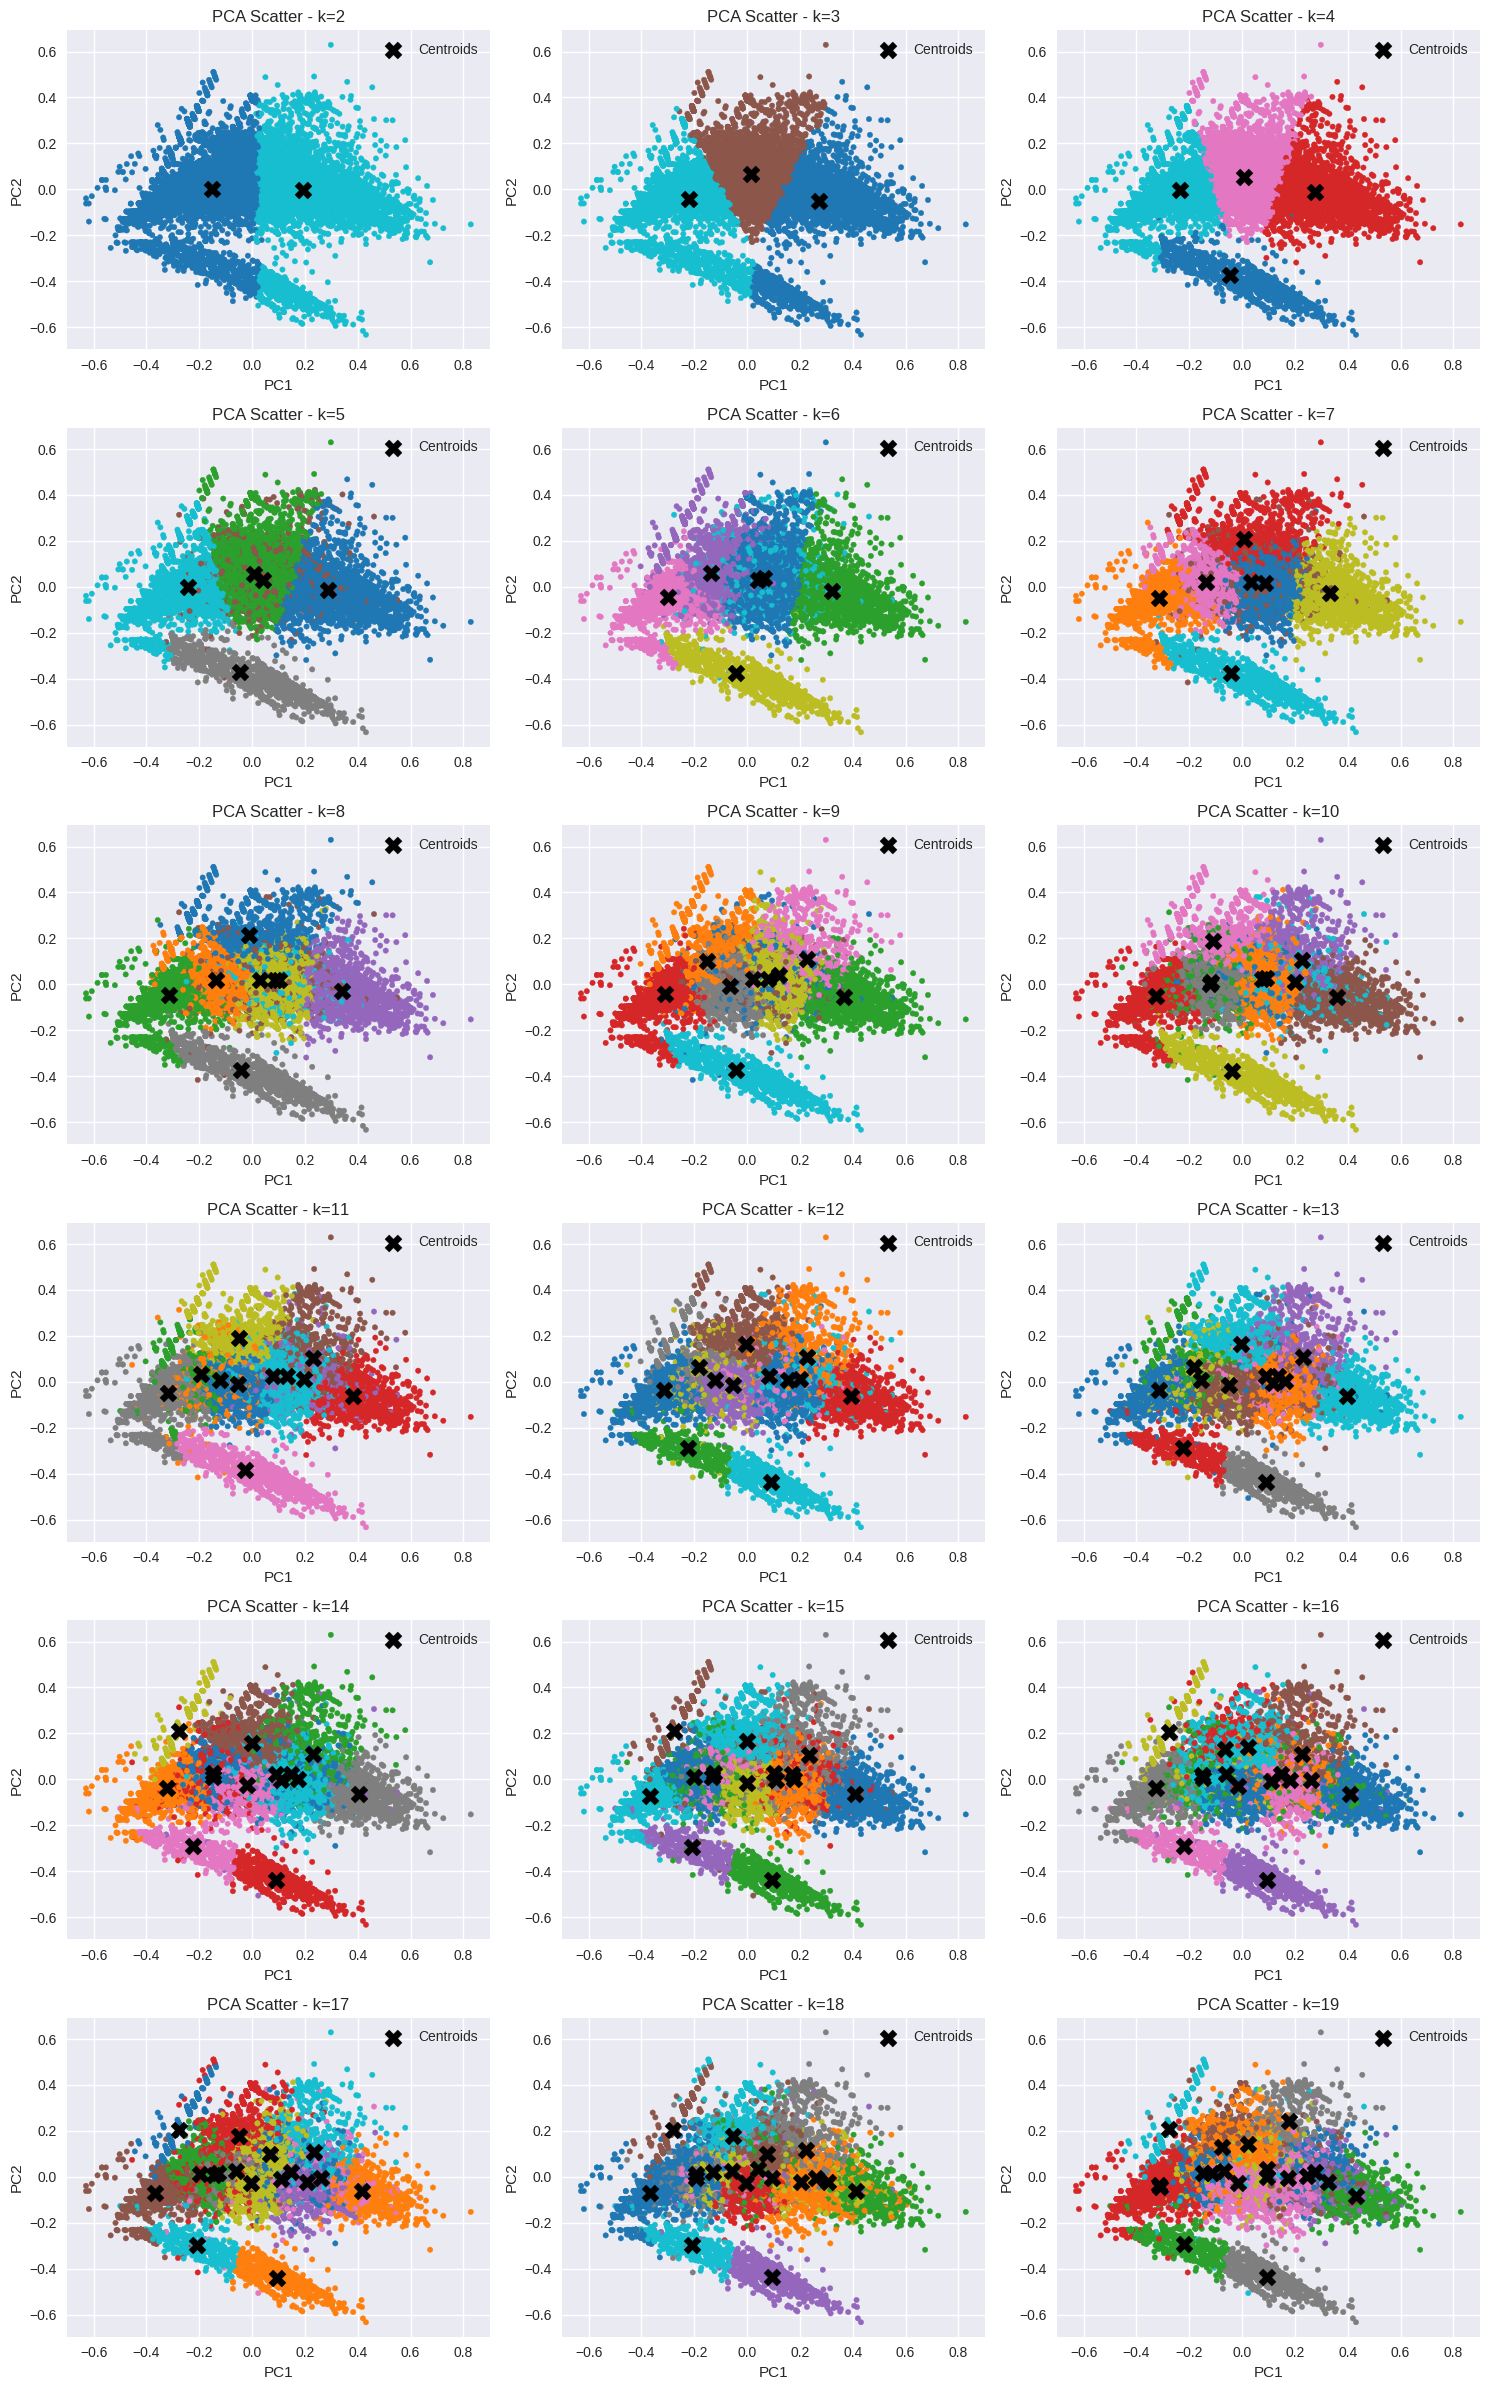


PCA Explained Variance: PC1=46.47%, PC2=17.86%
Total Variance Explained: 64.33%

Cluster distribution for k=3:
cluster
0    5566
1    8919
2    7439
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ======================
# COMPLEXITY CLUSTERING
# ======================



df_complexity = df_scaled[complexity_features].copy()

# Range of k to test
K = range(2, 20)
sse = []
sil = []

print("=== SSE and Silhouette Scores for each k ===")
print("k  | SSE      | Silhouette")
print("---|----------|-----------")

# Use only the features for KMeans
X = df_complexity.values

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)
    sil_score = silhouette_score(X, km.labels_)
    sil.append(sil_score)
    print(f"{k:2} | {km.inertia_:8.2f} | {sil_score:.4f}")

# Determine optimal k (based on elbow, silhouette, and visual inspection)
k_opt = 3  # update based on your analysis
print(f"\nSelected optimal k: {k_opt}")

# Fit KMeans with the chosen k
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_complexity['cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# ========= 2 PLOTS: SSE & Silhouette =========
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# 1) Elbow plot
axes[0].plot(K, sse, marker='o')
axes[0].set_title("Complexity – Elbow (SSE)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("SSE")
# axes[0].axvline(x=k_opt, color='red', linestyle='--', alpha=0.3, label=f'Selected k={k_opt}')
axes[0].legend()

# 2) Silhouette plot
axes[1].plot(K, sil, marker='o')
axes[1].set_title("Complexity – Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
# axes[1].axvline(x=k_opt, color='red', linestyle='--', alpha=0.7, label=f'Selected k={k_opt}')
axes[1].legend()

plt.tight_layout()
plt.show()

####################


# ========= GRID OF PCA SCATTERS FOR ALL k =========
n_plots = len(K)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for idx, k in enumerate(K):
    # Fit KMeans for this k
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_
    centroids_pca = pca.transform(centroids)

    # Plot clusters
    axes[idx].scatter(pca_data[:, 0], pca_data[:, 1],
                      c=labels, cmap='tab10', s=15)
    # Plot centroids
    axes[idx].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                      c='black', s=150, marker='X', label='Centroids')

    axes[idx].set_title(f"PCA Scatter - k={k}")
    axes[idx].set_xlabel("PC1")
    axes[idx].set_ylabel("PC2")
    axes[idx].legend()

# Remove unused axes if any
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ========= ADDITIONAL INFO =========
print(f"\nPCA Explained Variance: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

print(f"\nCluster distribution for k={k_opt}:")
print(df_complexity['cluster'].value_counts().sort_index())


### Approach B: Popularity & Community Engagement

Rationale: This ranking groups games according to their popularity. It distinguishes mainstream successes from niche games based on the number of owners, user ratings, and community engagement.


=== SSE and Silhouette Scores for each k ===
k  | SSE      | Silhouette
---|----------|-----------
 2 |    67.78 | 0.9093
 3 |    50.79 | 0.9121
 4 |    35.85 | 0.8616
 5 |    29.52 | 0.8060
 6 |    25.38 | 0.8022
 7 |    22.44 | 0.7634
 8 |    20.62 | 0.7538
 9 |    19.17 | 0.7086

: 5


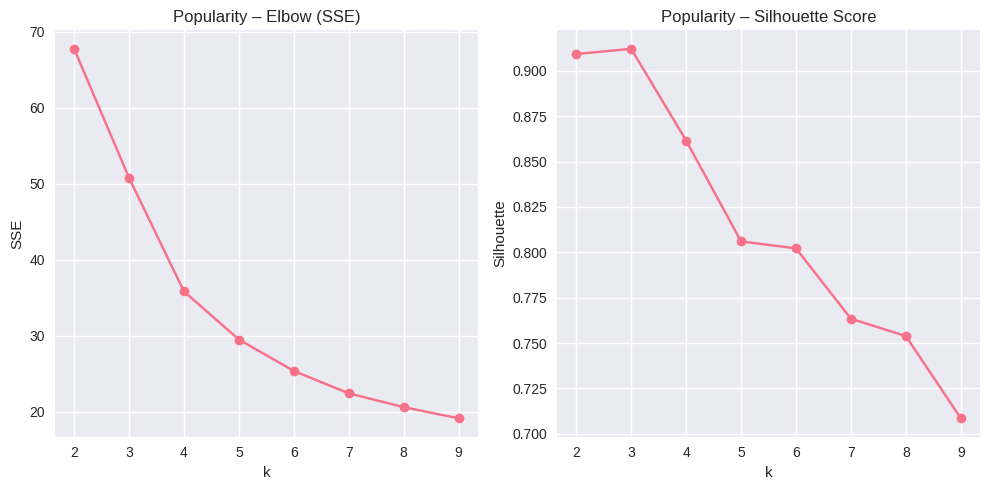

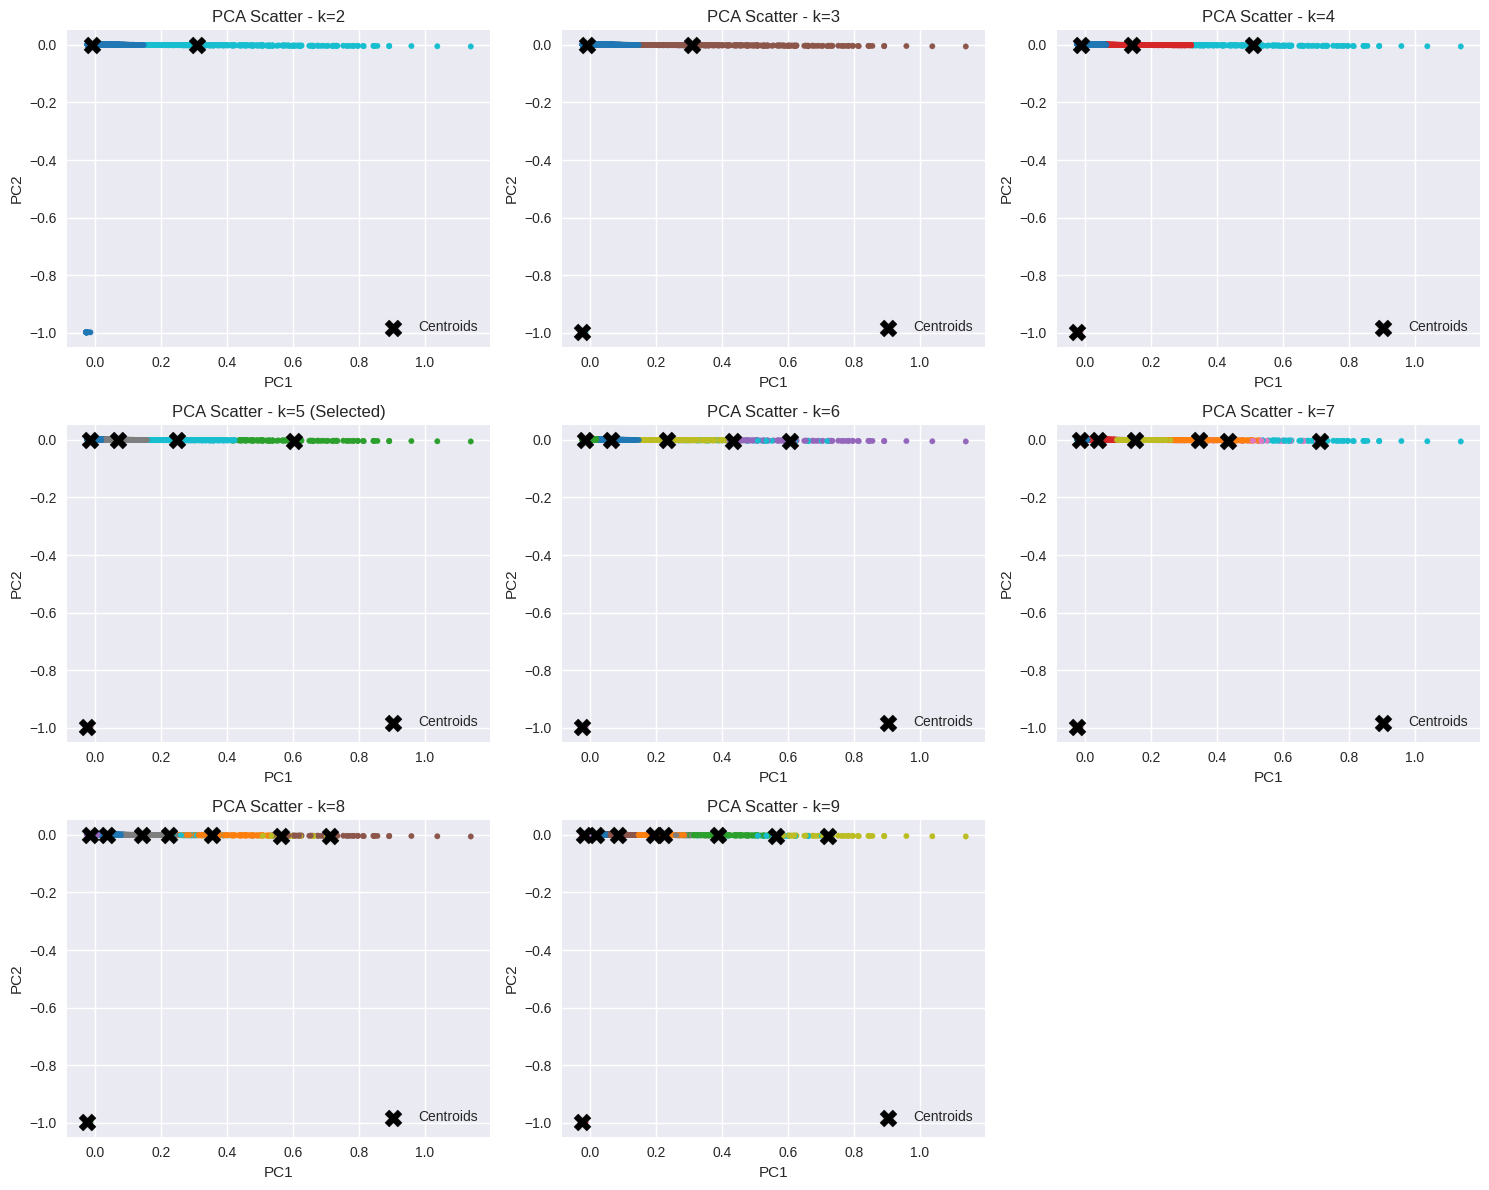


PCA Explained Variance: PC1=68.92%, PC2=13.73%
Total Variance Explained: 82.65%

Cluster distribution for k=5:
cluster
0    19806
1      109
2       17
3     1569
4      423
Name: count, dtype: int64


In [ ]:

# =======================
# POPULARITY CLUSTERING
# =======================


df_pop = df_scaled[popularity_features].copy()

# Range of k to test
K = range(2, 10)
sse = []
sil = []

print("=== SSE and Silhouette Scores for each k ===")
print("k  | SSE      | Silhouette")
print("---|----------|-----------")

X = df_pop.values

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)
    sil_score = silhouette_score(X, km.labels_)
    sil.append(sil_score)
    print(f"{k:2} | {km.inertia_:8.2f} | {sil_score:.4f}")

# Determine optimal k (update based on elbow/silhouette)
k_opt = 5
#print(f"\nSelected optimal k: {k_opt}")
print(f"\n: {k_opt}")

# Fit KMeans with k_opt
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_pop['cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# PCA transformation
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# ========= 2 PLOTS: SSE & Silhouette =========
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Elbow
axes[0].plot(K, sse, marker='o')
axes[0].set_title("Popularity – Elbow (SSE)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("SSE")
axes[0].legend()

# Silhouette
axes[1].plot(K, sil, marker='o')
axes[1].set_title("Popularity – Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
axes[1].legend()

plt.tight_layout()
plt.show()

# ========= GRID OF PCA SCATTERS FOR ALL k =========
n_plots = len(K)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for idx, k in enumerate(K):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_
    centroids_pca = pca.transform(centroids)

    axes[idx].scatter(pca_data[:, 0], pca_data[:, 1],
                      c=labels, cmap='tab10', s=15)
    axes[idx].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                      c='black', s=150, marker='X', label='Centroids')

    title = f"PCA Scatter - k={k}"
    if k == k_opt:
        title += " (Selected)"
    axes[idx].set_title(title)
    axes[idx].set_xlabel("PC1")
    axes[idx].set_ylabel("PC2")
    axes[idx].legend()

# Remove unused axes if any
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ========= ADDITIONAL INFO =========
print(f"\nPCA Explained Variance: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")
print(f"Total Variance Explained: {sum(pca.explained_variance_ratio_):.2%}")

print(f"\nCluster distribution for k={k_opt}:")
print(df_pop['cluster'].value_counts().sort_index())

### Approach C: Comprehensive Game Profile

Justification: Combines both complexity and popularity. Finds groups like "successful complex games" or "simple but popular family games" by mixing game features with popularity metrics.

=== SSE and Silhouette Scores for each k ===
k  | SSE      | Silhouette
---|----------|-----------
 2 | 45725882609512.27 | 0.7133
 3 | 17259586273640.37 | 0.6950
 4 | 10438593712390.06 | 0.6589
 5 | 6736980692740.46 | 0.6453
 6 | 4718524717688.11 | 0.6422
 7 | 3496868436385.81 | 0.6015
 8 | 2625588667168.56 | 0.5950
 9 | 2078197292234.17 | 0.5934

Selected optimal k: 6


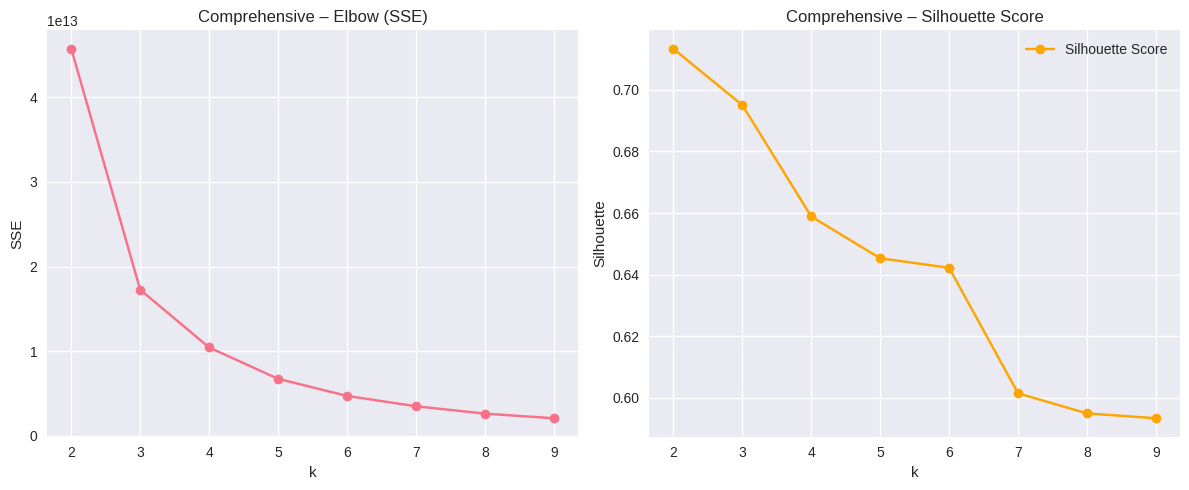

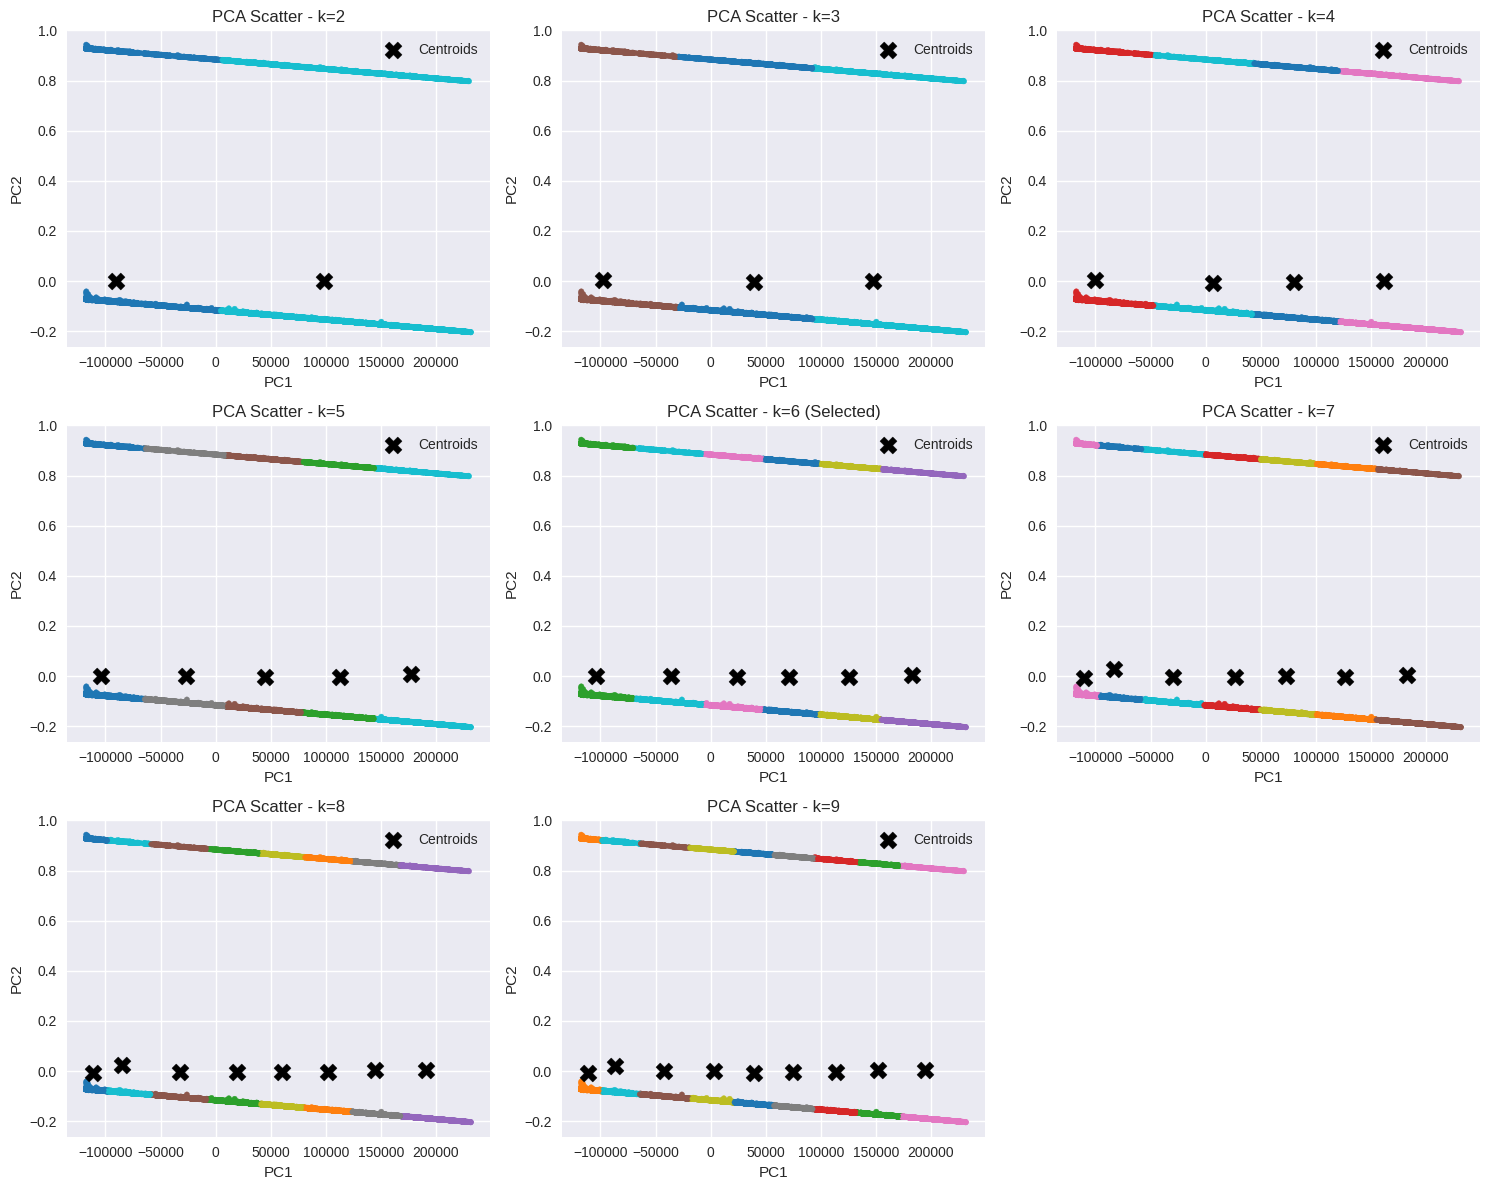

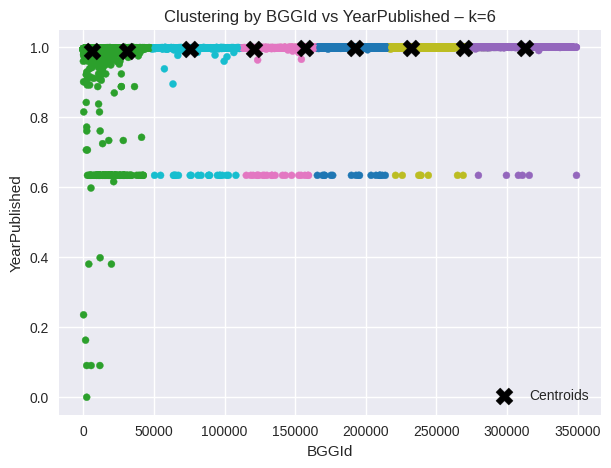

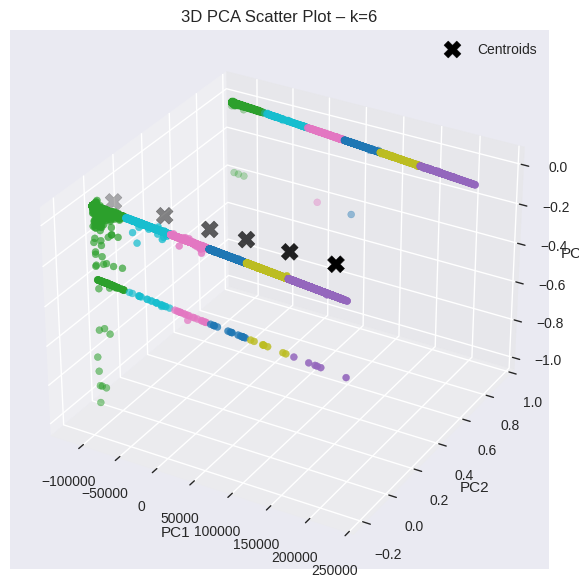


2D PCA Explained Variance: PC1=100.00%, PC2=0.00%
3D PCA Explained Variance: PC1=100.00%, PC2=0.00%, PC3=0.00%
Total Variance Explained (3D PCA): 100.00%

Cluster distribution for k=6:
cluster
0    2989
1    9288
2    2060
3    2768
4    2983
5    1836
Name: count, dtype: int64


In [ ]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

# ==========================
# COMPREHENSIVE CLUSTERING
# ==========================

# Ensure only numeric features
df_comp = df_scaled[comprehensive_features].select_dtypes(include=['float64','int64']).copy()

# Range of k to test
K = range(2, 10)
sse = []
sil = []

print("=== SSE and Silhouette Scores for each k ===")
print("k  | SSE      | Silhouette")
print("---|----------|-----------")

X = df_comp.values

for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    sse.append(km.inertia_)
    sil_score = silhouette_score(X, km.labels_)
    sil.append(sil_score)
    print(f"{k:2} | {km.inertia_:8.2f} | {sil_score:.4f}")

# Determine optimal k (manual or based on silhouette/elbow)
k_opt = 6
print(f"\nSelected optimal k: {k_opt}")

# Fit KMeans with k_opt
kmeans = KMeans(n_clusters=k_opt, random_state=42, n_init=10)
df_comp['cluster'] = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

# ========= PCA transformation for 2D =========
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

# ========= 2 PLOTS: SSE & Silhouette =========
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Elbow
axes[0].plot(K, sse, marker='o')
axes[0].set_title("Comprehensive – Elbow (SSE)")
axes[0].set_xlabel("k")
axes[0].set_ylabel("SSE")
#axes[0].axvline(x=k_opt, color='red', linestyle='--', alpha=0.6, label=f'Selected k={k_opt}')
axes[0].legend()

# Silhouette
axes[1].plot(K, sil, marker='o', color='orange')
axes[1].set_title("Comprehensive – Silhouette Score")
axes[1].set_xlabel("k")
axes[1].set_ylabel("Silhouette")
#axes[1].axvline(x=k_opt, color='red', linestyle='--', alpha=0.6)
axes[1].legend(["Silhouette Score", f"Selected k={k_opt}"])

plt.tight_layout()
plt.show()

# ========= GRID OF 2D PCA SCATTERS FOR ALL k =========
n_plots = len(K)
n_cols = 3
n_rows = (n_plots + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for idx, k in enumerate(K):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X)
    centroids = km.cluster_centers_
    centroids_pca = pca.transform(centroids)

    # PCA scatter
    axes[idx].scatter(pca_data[:, 0], pca_data[:, 1],
                      c=labels, cmap='tab10', s=15)
    axes[idx].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                      c='black', s=150, marker='X', label='Centroids')

    title = f"PCA Scatter - k={k}"
    if k == k_opt:
        title += " (Selected)"
    axes[idx].set_title(title)
    axes[idx].set_xlabel("PC1")
    axes[idx].set_ylabel("PC2")
    axes[idx].legend()

# Remove unused axes
for j in range(idx+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# ========= 2D FEATURE SCATTER (first two numeric features) =========
feature1, feature2 = df_comp.columns[:2]  # pick first two numeric features
plt.figure(figsize=(7, 5))
plt.scatter(df_comp[feature1], df_comp[feature2],
            c=df_comp['cluster'], cmap='tab10', s=25)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c='black', s=150, marker='X', label='Centroids')
plt.title(f"Clustering by {feature1} vs {feature2} – k={k_opt}")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()
plt.show()

# ========= 3D PCA SCATTER PLOT =========
pca_3d = PCA(n_components=3)
pca_data_3d = pca_3d.fit_transform(X)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter with clusters
scatter = ax.scatter(pca_data_3d[:, 0], pca_data_3d[:, 1], pca_data_3d[:, 2],
                     c=df_comp['cluster'], cmap='tab10', s=25)

# Centroids in 3D
centroids_3d = pca_3d.transform(kmeans.cluster_centers_)
ax.scatter(centroids_3d[:, 0], centroids_3d[:, 1], centroids_3d[:, 2],
           c='black', s=150, marker='X', label='Centroids')

ax.set_title(f"3D PCA Scatter Plot – k={k_opt}")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend()
plt.show()

# ========= ADDITIONAL INFO =========
print(f"\n2D PCA Explained Variance: PC1={pca.explained_variance_ratio_[0]:.2%}, PC2={pca.explained_variance_ratio_[1]:.2%}")
print(f"3D PCA Explained Variance: PC1={pca_3d.explained_variance_ratio_[0]:.2%}, "
      f"PC2={pca_3d.explained_variance_ratio_[1]:.2%}, "
      f"PC3={pca_3d.explained_variance_ratio_[2]:.2%}")
print(f"Total Variance Explained (3D PCA): {sum(pca_3d.explained_variance_ratio_):.2%}")

print(f"\nCluster distribution for k={k_opt}:")
print(df_comp['cluster'].value_counts().sort_index())


## b). Bisecting-KMeans Implemantation.

In [ ]:

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId","YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]


df_complexity = df_scaled[complexity_features].copy()
df_popularity = df_scaled[popularity_features].copy()
df_comprehensive = df_scaled[comprehensive_features].copy()


📊 Complexity: 21924 points, 8 features
Estimated optimal k (elbow heuristic): 3


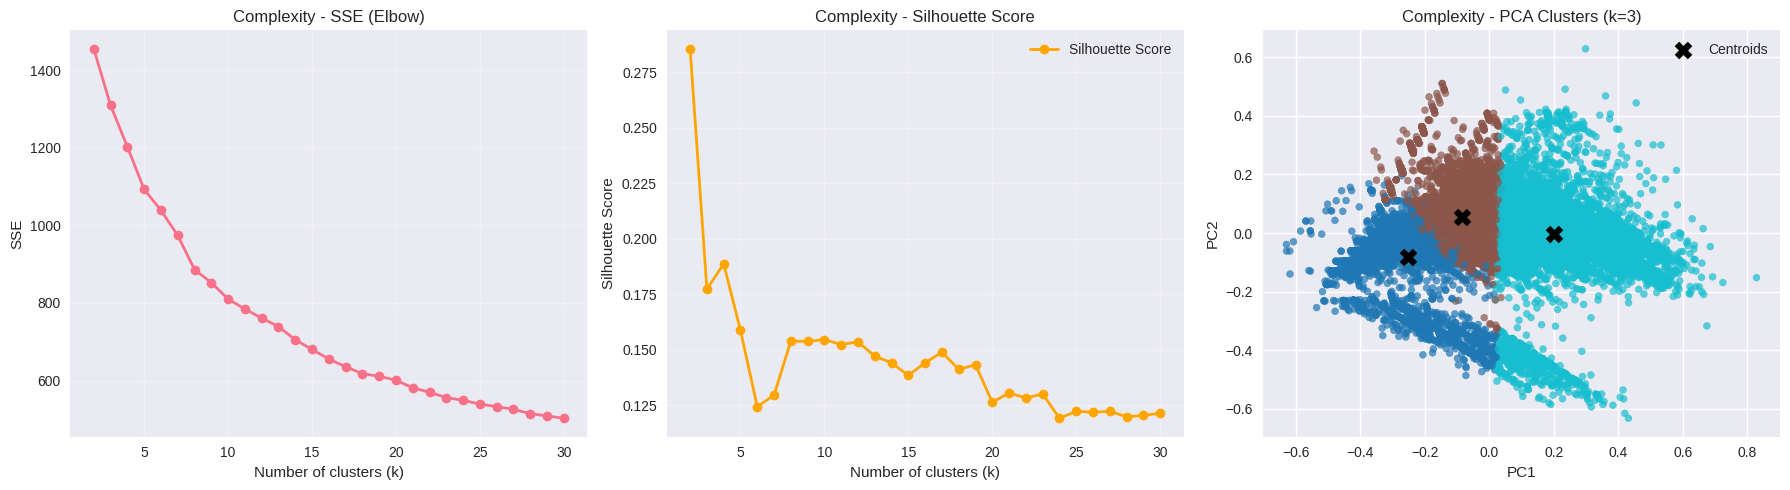

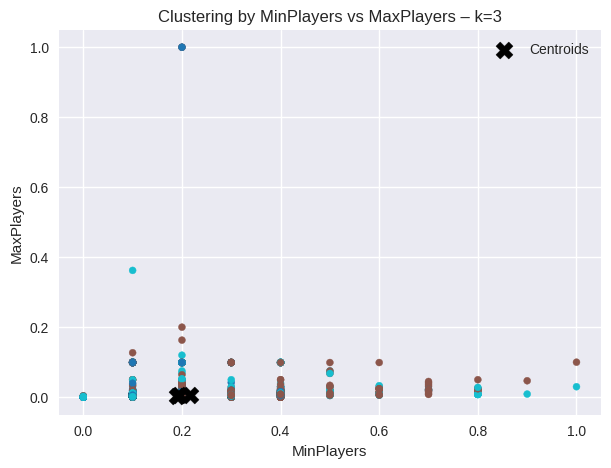

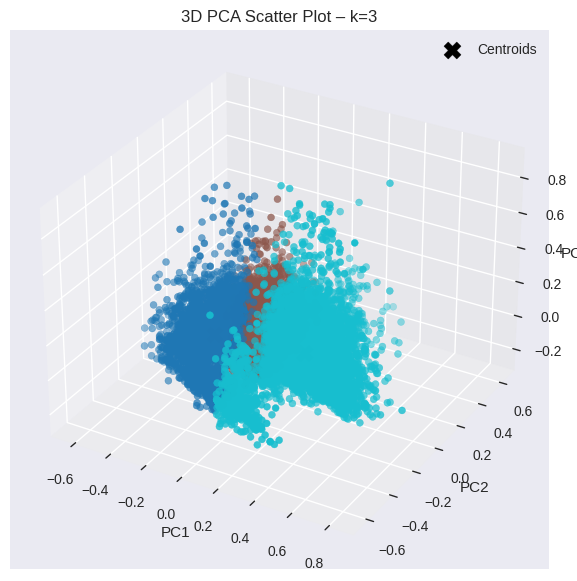

Cluster sizes: [4573 7944 9407]
SSE values: ['1455', '1309', '1203', '1093', '1039', '974', '886', '852', '810', '784', '761', '739', '705', '680', '656', '636', '618', '611', '601', '581', '570', '556', '549', '539', '533', '526', '515', '509', '503']
2D PCA Explained Variance: PC1=46.47%, PC2=17.86%
3D PCA Explained Variance: 78.74%

📊 Popularity: 21924 points, 10 features
Estimated optimal k (elbow heuristic): 8


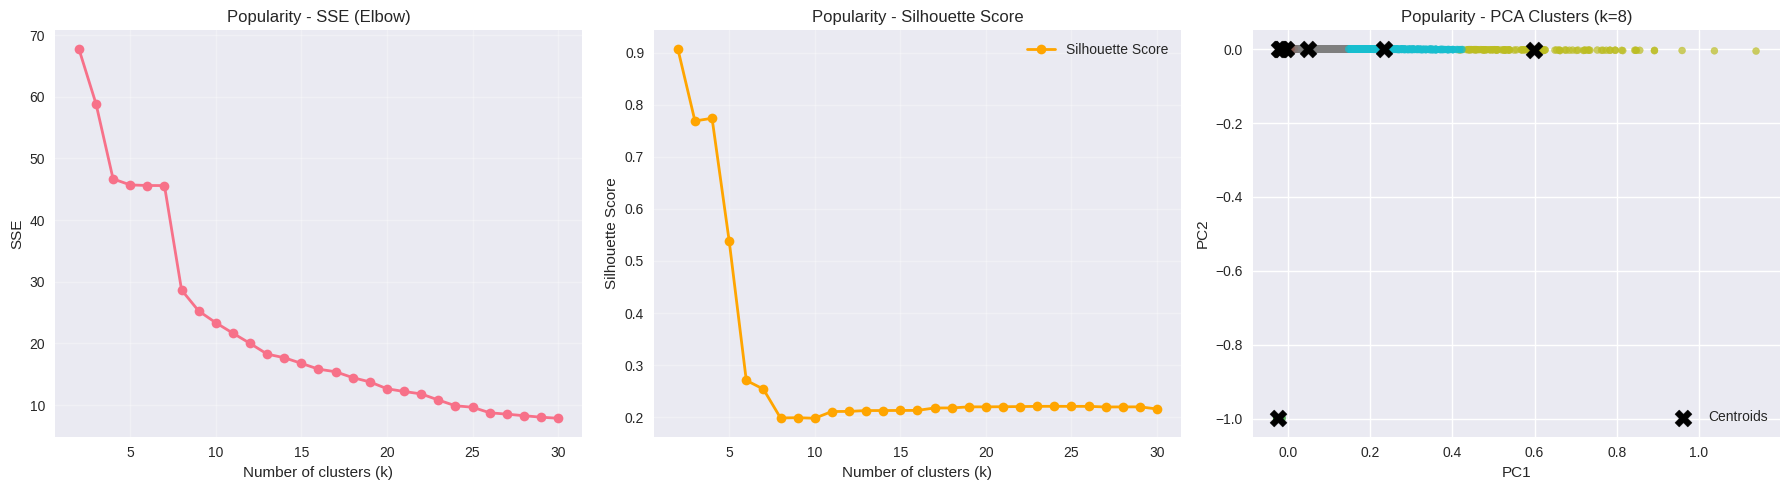

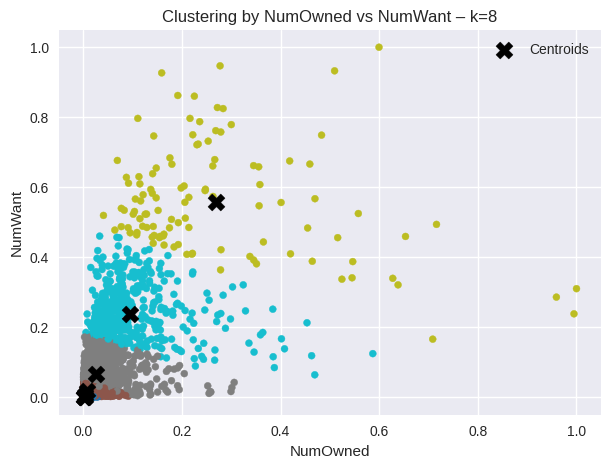

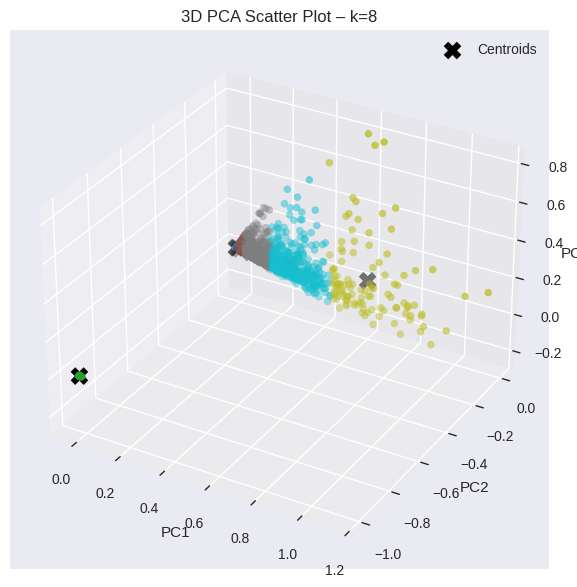

Cluster sizes: [5500 7595   17 1822 4371 2026  110  483]
SSE values: ['68', '59', '47', '46', '46', '46', '29', '25', '23', '22', '20', '18', '18', '17', '16', '15', '14', '14', '13', '12', '12', '11', '10', '10', '9', '9', '8', '8', '8']
2D PCA Explained Variance: PC1=68.92%, PC2=13.73%
3D PCA Explained Variance: 91.04%

📊 Comprehensive: 21924 points, 6 features
Estimated optimal k (elbow heuristic): 3


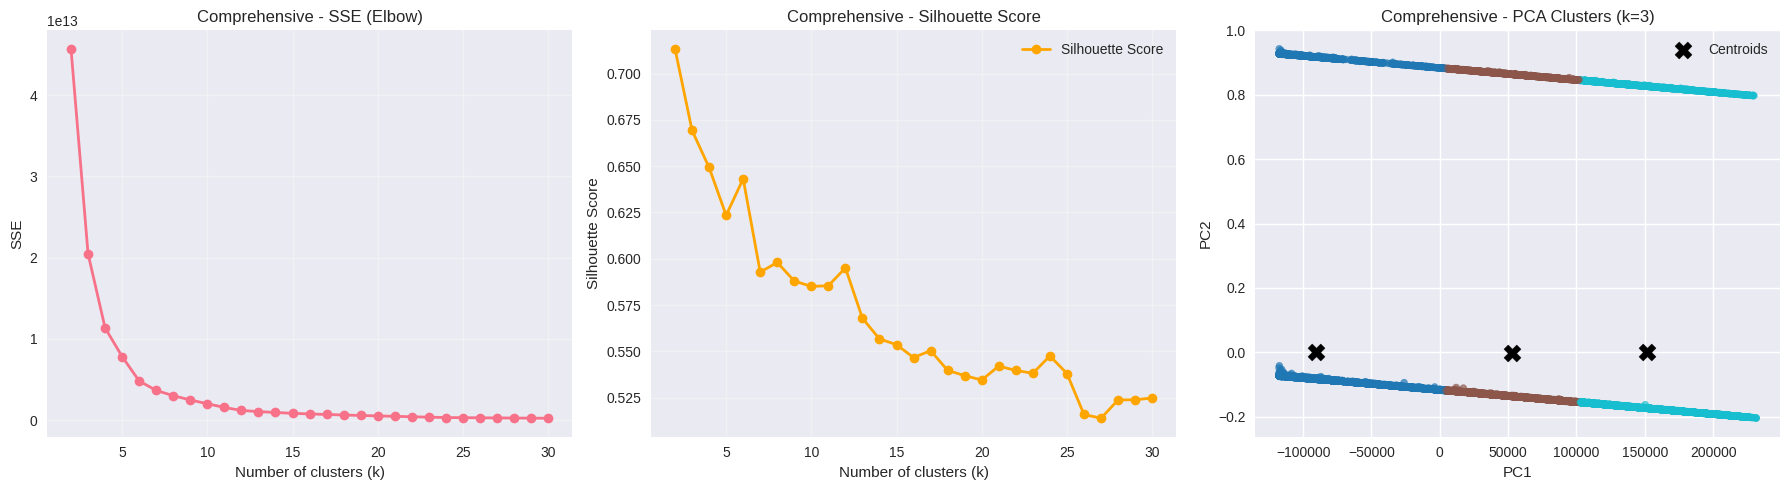

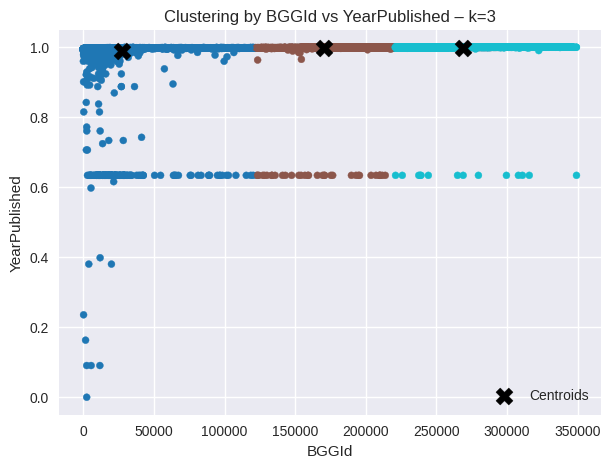

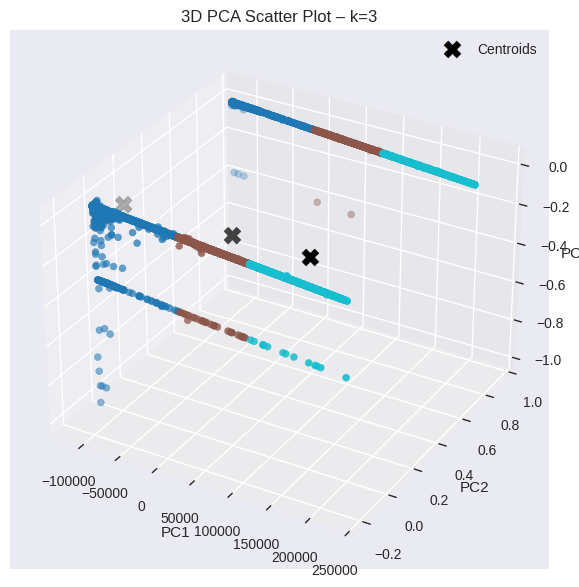

Cluster sizes: [11413  5695  4816]
SSE values: ['45725842055008', '20483259294925', '11349055307979', '7819767065596', '4809919459707', '3646530689263', '3001787847349', '2475199729877', '2006167112104', '1556573526592', '1179335465190', '1042608872786', '931426355076', '828296254479', '753283333794', '685809287358', '623440751587', '564090193031', '510645662957', '459202153823', '404905876825', '359864272485', '309783461811', '292681621130', '276172698470', '261268340813', '247285197908', '233632765993', '221306503771']
2D PCA Explained Variance: PC1=100.00%, PC2=0.00%
3D PCA Explained Variance: 100.00%

🎉 Analysis complete! Optimal clusters found:
   Complexity: 3 clusters
   Popularity: 8 clusters
   Comprehensive: 3 clusters


In [ ]:

from sklearn.cluster import BisectingKMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def quick_bisecting_kmeans(data, name, max_clusters=30):
    """
    Bisecting K-Means including SSE, Silhouette, PCA clusters, raw-feature scatter, and centroids.
    """
    # Ensure numeric values only
    X = data.select_dtypes(include=['float64','int64']).values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"\n📊 {name}: {X.shape[0]} points, {X.shape[1]} features")

    # Track SSE and Silhouette for different numbers of clusters
    sse_values = []
    sil_scores = []
    cluster_range = range(2, max_clusters + 1)

    for k in cluster_range:
        bkm = BisectingKMeans(n_clusters=k, random_state=42)
        labels = bkm.fit_predict(X)
        sse_values.append(bkm.inertia_)

        # Silhouette score requires at least 2 clusters
        if k < len(X):
            sil_scores.append(silhouette_score(X, labels))
        else:
            sil_scores.append(np.nan)

    # Approximate elbow point
    sse_diff = np.diff(sse_values)
    optimal_k = np.argmin(sse_diff) + 3
    print(f"Estimated optimal k (elbow heuristic): {optimal_k}")

    # Fit final model with optimal k
    final_bkm = BisectingKMeans(n_clusters=optimal_k, random_state=42)
    labels = final_bkm.fit_predict(X)
    centroids = final_bkm.cluster_centers_

    # PCA for 2D and 3D visualization
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X)
    centroids_pca_2d = pca_2d.transform(centroids)

    pca_3d = PCA(n_components=3)
    X_pca_3d = pca_3d.fit_transform(X)
    centroids_pca_3d = pca_3d.transform(centroids)

    # ========= PLOTS =========
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # 1) SSE curve
    axes[0].plot(cluster_range, sse_values, marker='o', linewidth=2)
    axes[0].set_title(f"{name} - SSE (Elbow)")
    axes[0].set_xlabel("Number of clusters (k)")
    axes[0].set_ylabel("SSE")
    axes[0].grid(alpha=0.3)
    #axes[0].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.6, label=f'Optimal k={optimal_k}')
    axes[0].legend()

    # 2) Silhouette curve
    axes[1].plot(cluster_range, sil_scores, marker='o', color='orange', linewidth=2)
    axes[1].set_title(f"{name} - Silhouette Score")
    axes[1].set_xlabel("Number of clusters (k)")
    axes[1].set_ylabel("Silhouette Score")
    axes[1].grid(alpha=0.3)
    #axes[1].axvline(x=optimal_k, color='red', linestyle='--', alpha=0.6)
    axes[1].legend(["Silhouette Score", f"Selected k={optimal_k}"])

    # 3) PCA 2D scatter with clusters & centroids
    axes[2].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab10', alpha=0.7, s=25)
    axes[2].scatter(centroids_pca_2d[:, 0], centroids_pca_2d[:, 1],
                    c='black', s=150, marker='X', label='Centroids')
    axes[2].set_title(f"{name} - PCA Clusters (k={optimal_k})")
    axes[2].set_xlabel("PC1")
    axes[2].set_ylabel("PC2")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    # ========= Raw Feature 2D Scatter =========
    if X.shape[1] >= 2:
        feature1, feature2 = data.select_dtypes(include=['float64','int64']).columns[:2]
        plt.figure(figsize=(7, 5))
        plt.scatter(data[feature1], data[feature2], c=labels, cmap='tab10', s=25)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=150, marker='X', label='Centroids')
        plt.title(f"Clustering by {feature1} vs {feature2} – k={optimal_k}")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.legend()
        plt.show()

    # ========= 3D PCA Scatter =========
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
               c=labels, cmap='tab10', s=25)
    ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2],
               c='black', s=150, marker='X', label='Centroids')
    ax.set_title(f"3D PCA Scatter Plot – k={optimal_k}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend()
    plt.show()

    # ========= Cluster Info =========
    cluster_sizes = np.bincount(labels)
    print(f"Cluster sizes: {cluster_sizes}")
    print(f"SSE values: {[f'{sse:.0f}' for sse in sse_values]}")
    print(f"2D PCA Explained Variance: PC1={pca_2d.explained_variance_ratio_[0]:.2%}, PC2={pca_2d.explained_variance_ratio_[1]:.2%}")
    print(f"3D PCA Explained Variance: {sum(pca_3d.explained_variance_ratio_):.2%}")

    return labels, optimal_k, sse_values, sil_scores

# ---- Example usage ----
datasets = {
    'Complexity': df_complexity[complexity_features],
    'Popularity': df_popularity[popularity_features],
    'Comprehensive': df_comprehensive[comprehensive_features]
}

results = {}
for name, data in datasets.items():
    labels, optimal_k, sse_history, sil_history = quick_bisecting_kmeans(data, name)
    results[name] = {
        'labels': labels,
        'optimal_k': optimal_k,
        'sse_history': sse_history,
        'silhouette_history': sil_history
    }

print("\n🎉 Analysis complete! Optimal clusters found:")
for name, result in results.items():
    print(f"   {name}: {result['optimal_k']} clusters")


## C). X-Means Implementation

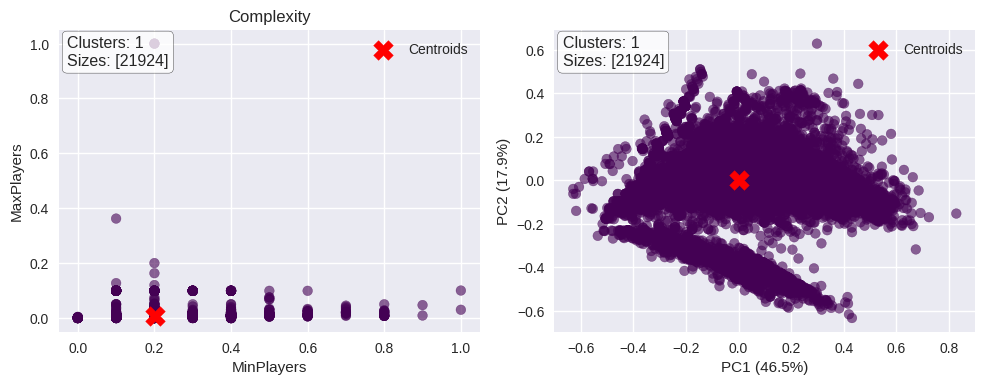

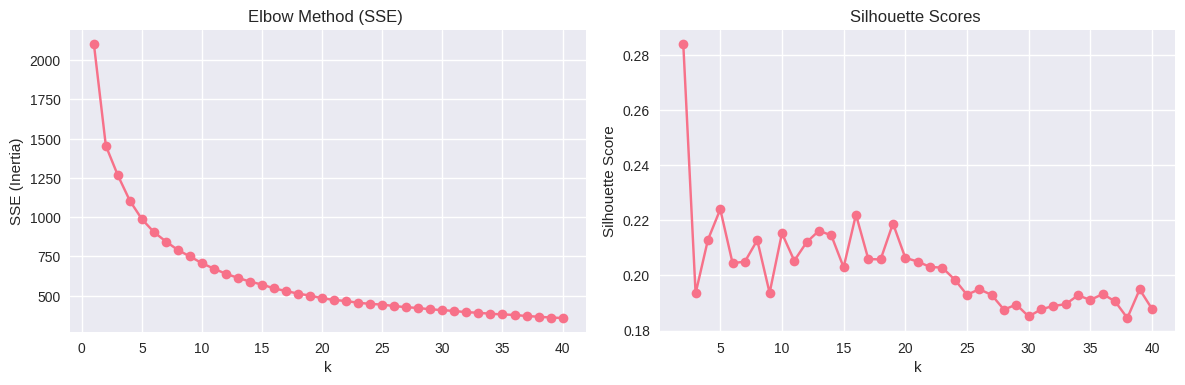

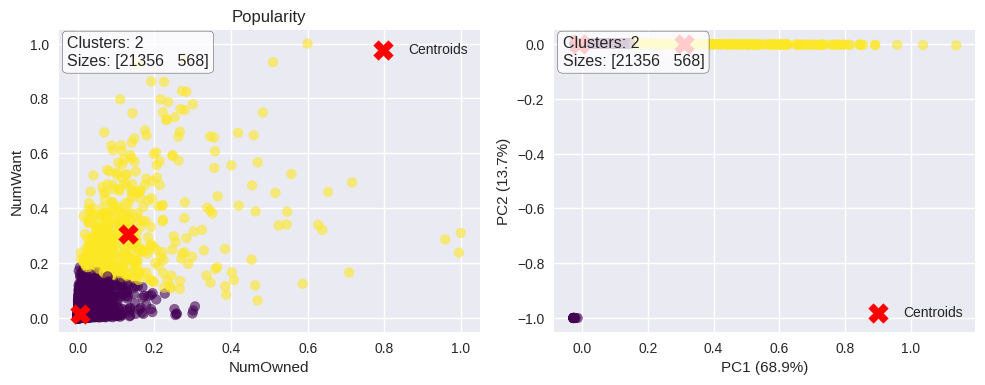

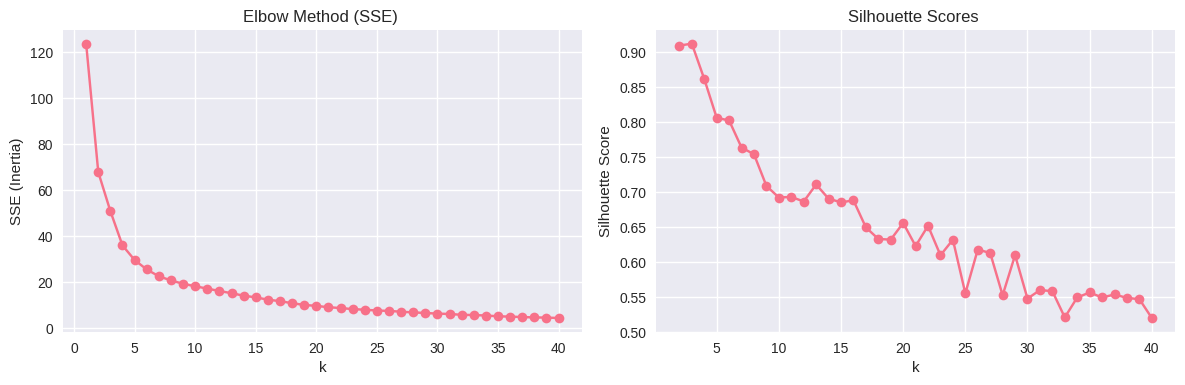

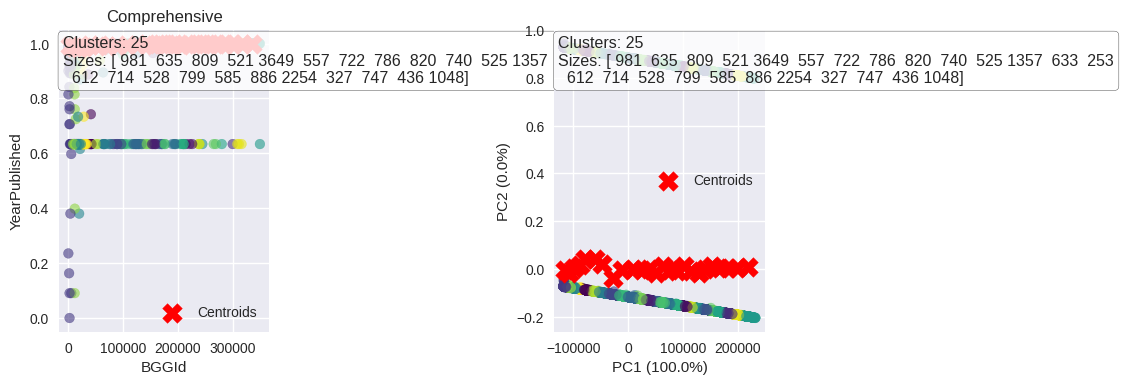

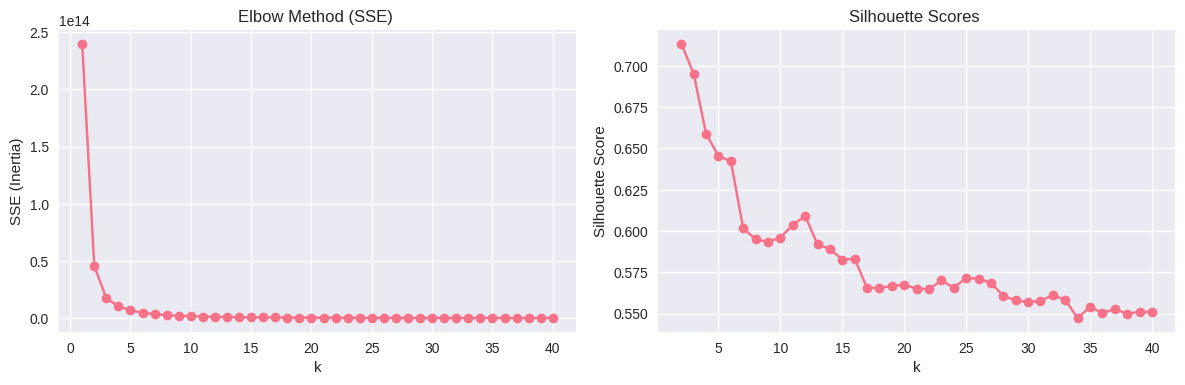

X-means BIC Results:

Complexity:
  Optimal K: 1
  Best BIC: -146489.90
  Cluster sizes: [21924]
  BIC values:
    K=1: BIC=-146489.90
    K=2: BIC=-157449.50
    K=3: BIC=-164481.04
    K=4: BIC=-166360.25
    K=5: BIC=-169933.46
    K=6: BIC=-173654.54
    K=7: BIC=-176098.39
    K=8: BIC=-177812.80
    K=9: BIC=-180378.15
    K=10: BIC=-181351.31
    K=11: BIC=-183883.41
    K=12: BIC=-184715.52
    K=13: BIC=-185295.27
    K=14: BIC=-186064.19
    K=15: BIC=-187776.62
    K=16: BIC=-188165.12
    K=17: BIC=-189992.61
    K=18: BIC=-190976.67
    K=19: BIC=-190747.21
    K=20: BIC=-192539.43
    K=21: BIC=-193330.16
    K=22: BIC=-194104.41
    K=23: BIC=-195071.10
    K=24: BIC=-195838.55
    K=25: BIC=-196502.01
    K=26: BIC=-197933.05
    K=27: BIC=-197904.97
    K=28: BIC=-199446.44
    K=29: BIC=-199365.51
    K=30: BIC=-199552.57
    K=31: BIC=-200748.51
    K=32: BIC=-201015.04
    K=33: BIC=-201782.74
    K=34: BIC=-201449.37
    K=35: BIC=-202658.73
    K=36: BIC=-202623.8

In [ ]:


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

def compute_bic(kmeans, X, min_points_per_cluster=50):
    """Compute BIC for K-means clustering with minimum cluster size check"""
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    n_clusters = kmeans.n_clusters
    n_samples, n_features = X.shape

    # Check minimum cluster size
    cluster_sizes = np.bincount(labels)
    if np.any(cluster_sizes < min_points_per_cluster):
        return -np.inf

    # Compute variance for each cluster
    cluster_variances = []
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        if len(cluster_points) > 1:
            variance = np.sum((cluster_points - centers[i]) ** 2) / (len(cluster_points) - 1)
            variance = max(variance, 1e-6)
        else:
            variance = 1e-6
        cluster_variances.append(variance)

    # Log likelihood calculation
    log_likelihood = 0
    for i in range(n_clusters):
        cluster_points = X[labels == i]
        n_points = len(cluster_points)

        if n_points > 0 and cluster_variances[i] > 0:
            log_likelihood += n_points * np.log(n_points)
            log_likelihood -= n_points * np.log(n_samples)
            log_likelihood -= n_points * n_features / 2 * np.log(2 * np.pi)
            log_likelihood -= n_points / 2 * np.log(cluster_variances[i])
            log_likelihood -= (n_points - 1) / 2

    n_params = n_clusters * n_features
    bic = log_likelihood - (n_params / 2) * np.log(n_samples)
    return bic


def x_means(X, k_max=40, min_points_per_cluster=10):
    """X-means with minimum cluster size enforcement"""
    best_k = 1
    best_bic = -np.inf
    best_kmeans = None
    bic_values = []
    k_values = []

    for k in range(1, k_max + 1):
        if len(X) / k < min_points_per_cluster:
            bic_values.append(-np.inf)
            k_values.append(k)
            continue

        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)

        bic = compute_bic(kmeans, X, min_points_per_cluster)
        bic_values.append(bic)
        k_values.append(k)

        if bic > best_bic:
            best_bic = bic
            best_k = k
            best_kmeans = kmeans

    return best_kmeans, best_k, best_bic, k_values, bic_values


#  datasets
datasets = {
    'Complexity': df_complexity,
    'Popularity': df_popularity,
    'Comprehensive': df_comprehensive
}

# Storage for results
results = {}

for name, data in datasets.items():
    X = data.values

    # Run X-means
    kmeans, best_k, bic, k_values, bic_values = x_means(X, min_points_per_cluster=40)
    results[name] = {
        'kmeans': kmeans,
        'k': best_k,
        'bic': bic,
        'k_values': k_values,
        'bic_values': bic_values
    }

    # ==== Part 1: Cluster Plots (Feature + PCA) ====
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

    feature1 = data.columns[0]
    feature2 = data.columns[1]

    # Feature scatter
    scatter1 = ax1.scatter(data[feature1], data[feature2],
                           c=kmeans.labels_, cmap='viridis', alpha=0.6)
    ax1.set_title(f'{name}')
    ax1.set_xlabel(feature1)
    ax1.set_ylabel(feature2)

    # Centroids
    centroids_features = kmeans.cluster_centers_[:, [
        list(data.columns).index(feature1),
        list(data.columns).index(feature2)
    ]]
    ax1.scatter(centroids_features[:, 0], centroids_features[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    ax1.legend()

    # PCA Scatter
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centers_pca = pca.transform(kmeans.cluster_centers_)

    scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1],
                           c=kmeans.labels_, cmap='viridis', alpha=0.6)
    ax2.scatter(centers_pca[:, 0], centers_pca[:, 1],
                c='red', marker='X', s=200, label='Centroids')
    ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    ax2.legend()

    # Add cluster sizes
    cluster_sizes = np.bincount(kmeans.labels_)
    ax1.text(0.02, 0.98, f'Clusters: {kmeans.n_clusters}\nSizes: {cluster_sizes}',
             transform=ax1.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    ax2.text(0.02, 0.98, f'Clusters: {kmeans.n_clusters}\nSizes: {cluster_sizes}',
             transform=ax2.transAxes, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # ==== Part 2: Elbow Plot (SSE) & Silhouette Scores ====
    sse = []
    silhouette_scores = []
    ks = list(range(1, max(k_values) + 1))

    for k in ks:
        kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_temp.fit(X)
        sse.append(kmeans_temp.inertia_)

        if k > 1:  # silhouette undefined for k=1
            score = silhouette_score(X, kmeans_temp.labels_)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(np.nan)

    # Plot SSE + Silhouette
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Elbow SSE
    ax[0].plot(ks, sse, marker='o')
    ax[0].set_title(f'Elbow Method (SSE) ')
    ax[0].set_xlabel('k')
    ax[0].set_ylabel('SSE (Inertia)')
    ax[0].grid(True)

    # Silhouette
    ax[1].plot(ks[1:], silhouette_scores[1:], marker='o')
    ax[1].set_title(f'Silhouette Scores ')
    ax[1].set_xlabel('k')
    ax[1].set_ylabel('Silhouette Score')
    ax[1].grid(True)


    plt.tight_layout()
    plt.show()


# ==== Print BIC Results ====
print("X-means BIC Results:")
for name, result in results.items():
    kmeans = result['kmeans']
    cluster_sizes = np.bincount(kmeans.labels_)
    print(f"\n{name}:")
    print(f"  Optimal K: {result['k']}")
    print(f"  Best BIC: {result['bic']:.2f}")
    print(f"  Cluster sizes: {cluster_sizes}")

    print("  BIC values:")
    for k, bic_val in zip(result['k_values'], result['bic_values']):
        if bic_val != -np.inf:
            print(f"    K={k}: BIC={bic_val:.2f}")


In [ ]:
df_scaled = df_save.copy()

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId", "YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]




df_complexity = df_scaled[complexity_features].copy()
df_popularity = df_scaled[popularity_features].copy()
df_comprehensive = df_scaled[comprehensive_features].copy()

   ## D. DBSCAN Implementation

MEMORY-EFFICIENT DBSCAN WITH 3D VISUALIZATION

Processing Dataset: Complexity
Data shape: (21924, 8)
Using subsample of 1000 points for k-distance plot


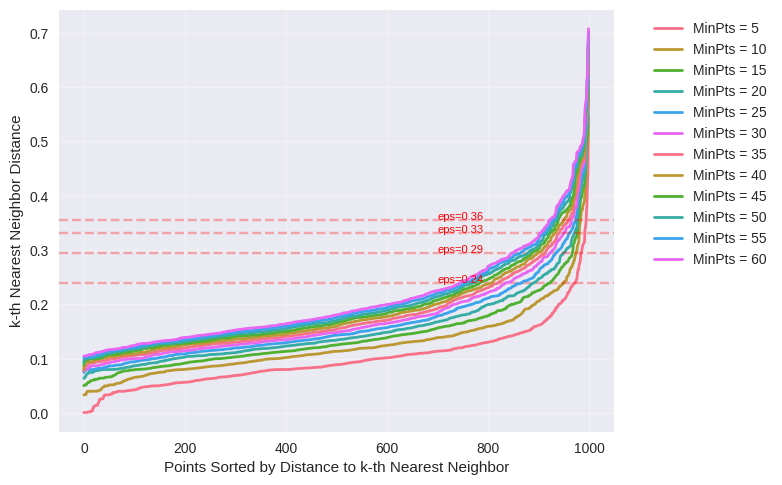

Generating SSE (Elbow) and Silhouette Score plots...
Using subsample of 2000 points for SSE + Silhouette


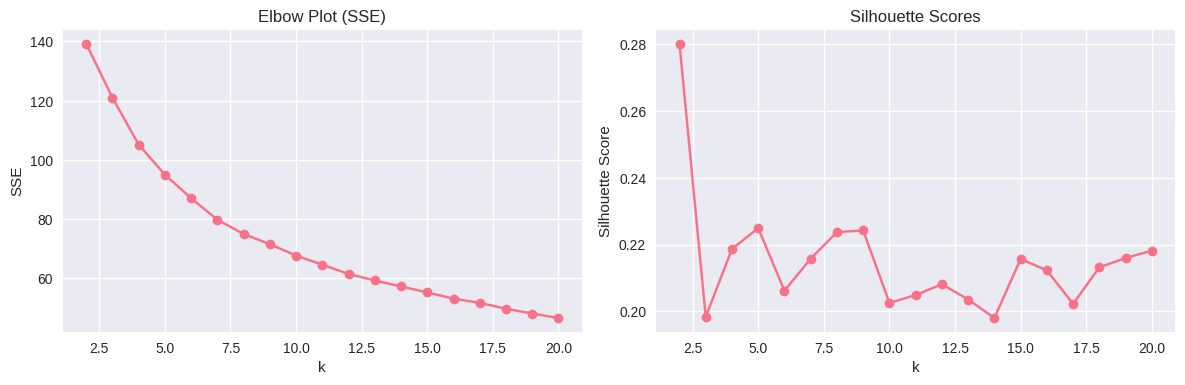

Using DBSCAN parameters: eps=0.381, min_samples=50
Visualizing 1000 random points (subsampled from 21924)


IndexError: index 2 is out of bounds for axis 0 with size 2

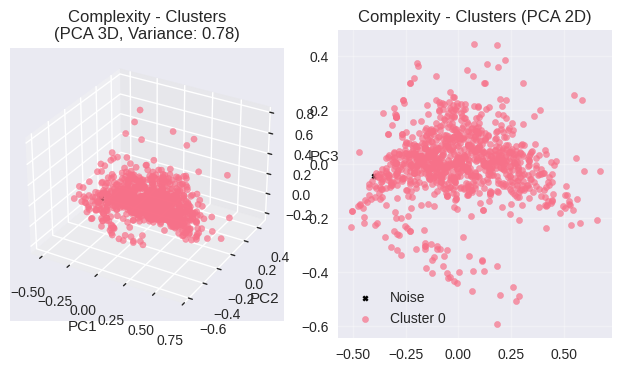

In [ ]:

from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
import matplotlib.pyplot as plt


# ======================================================
# 1. MEMORY-EFFICIENT DBSCAN IMPLEMENTATION
# ============================================================
def dbscan_efficient(X, eps, min_samples):
    """
    Memory-efficient DBSCAN implementation that doesn't compute full distance matrix
    """
    n = len(X)
    labels = np.full(n, -1)
    visited = np.zeros(n, dtype=bool)
    cluster_id = 0

    nn = NearestNeighbors(radius=eps)
    nn.fit(X)

    for i in range(n):
        if visited[i]:
            continue

        visited[i] = True
        neighbors = nn.radius_neighbors([X[i]], return_distance=False)[0]

        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            labels[i] = cluster_id
            stack = list(neighbors)

            while stack:
                j = stack.pop()

                if not visited[j]:
                    visited[j] = True
                    j_neighbors = nn.radius_neighbors([X[j]], return_distance=False)[0]

                    if len(j_neighbors) >= min_samples:
                        for neighbor in j_neighbors:
                            if not visited[neighbor]:
                                stack.append(neighbor)

                if labels[j] == -1:
                    labels[j] = cluster_id

            cluster_id += 1

    return labels


# ============================================================
# 2. K-DISTANCE PLOT FOR SUBSAMPLED DATA (MEMORY EFFICIENT)
# ============================================================
def plot_k_distance_efficient(X, k_list=None, sample_size=1000):
    if k_list is None:
        k_list = list(range(5, 65, 5))

    if len(X) > sample_size:
        indices = np.random.choice(len(X), sample_size, replace=False)
        X_sample = X[indices]
        print(f"Using subsample of {sample_size} points for k-distance plot")
    else:
        X_sample = X

    plt.figure(figsize=(8, 5))
    parameter_suggestions = {}

    for k in k_list:
        if k >= len(X_sample):
            continue

        nn = NearestNeighbors(n_neighbors=k)
        nn.fit(X_sample)
        distances, _ = nn.kneighbors(X_sample)

        kth_dist = np.sort(distances[:, k-1])
        plt.plot(kth_dist, label=f"MinPts = {k}", linewidth=2)

        if len(kth_dist) > 20:
            elbow_idx = int(len(kth_dist) * 0.95)
            elbow_value = kth_dist[elbow_idx]
            parameter_suggestions[k] = elbow_value

            if k in [10, 20, 30, 40]:
                plt.axhline(y=elbow_value, color='red', linestyle='--', alpha=0.3)
                plt.text(len(kth_dist)*0.7, elbow_value,
                         f'eps={elbow_value:.2f}', fontsize=8, color='red')

    plt.xlabel("Points Sorted by Distance to k-th Nearest Neighbor")
    plt.ylabel("k-th Nearest Neighbor Distance")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    return parameter_suggestions


# ============================================================
# 2B. ADDITION: SSE (ELBOW) & SILHOUETTE PLOTS FOR VALIDATION
# ============================================================
def plot_sse_and_silhouette(X, max_k=20):
    """
    Plots:
    - Elbow SSE / inertia
    - Silhouette score
    using subsampling for large datasets
    """
    print("Generating SSE (Elbow) and Silhouette Score plots...")

    # Use subsampling for very large datasets
    if len(X) > 2000:
        idx = np.random.choice(len(X), 2000, replace=False)
        X_plot = X[idx]
        print("Using subsample of 2000 points for SSE + Silhouette")
    else:
        X_plot = X

    ks = range(2, max_k + 1)

    sse = []
    sil_scores = []

    for k in ks:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(X_plot)

        sse.append(kmeans.inertia_)
        sil_scores.append(silhouette_score(X_plot, labels))

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # SSE
    ax[0].plot(list(ks), sse, marker='o')
    ax[0].set_title("Elbow Plot (SSE)")
    ax[0].set_xlabel("k")
    ax[0].set_ylabel("SSE")
    ax[0].grid(True)

    # Silhouette
    ax[1].plot(list(ks), sil_scores, marker='o')
    ax[1].set_title("Silhouette Scores")
    ax[1].set_xlabel("k")
    ax[1].set_ylabel("Silhouette Score")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()


# ============================================================
# 3. 3D VISUALIZATION WITH SUBSAMPLING
# ============================================================
def visualize_dbscan_3d_efficient(X, labels, name, max_points=1000):
    if len(X) > max_points:
        indices = np.random.choice(len(X), max_points, replace=False)
        X_vis = X[indices]
        labels_vis = labels[indices]
        print(f"Visualizing {max_points} random points (subsampled from {len(X)})")
    else:
        X_vis = X
        labels_vis = labels

    fig = plt.figure(figsize=(12, 4))

    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_vis)
    variance_explained = pca.explained_variance_ratio_.sum()

    ax1 = fig.add_subplot(131, projection='3d')
    plot_3d_clusters(ax1, X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], labels_vis)
    ax1.set_title(f"{name} - Clusters\n(PCA 3D, Variance: {variance_explained:.2f})")
    ax[1].grid(True)

    ax2 = fig.add_subplot(132)
    plot_2d_clusters(ax2, X_pca[:, 0], X_pca[:, 1], labels_vis)
    ax2.set_title(f"{name} - Clusters (PCA 2D)")
    ax[2].grid(True)

    ax3 = fig.add_subplot(133)
    plot_cluster_distribution(ax3, labels)
    ax3.set_title(f"{name} - Cluster Distribution")
    ax[3].grid(True)

    plt.tight_layout()
    plt.show()


def plot_3d_clusters(ax, x, y, z, labels):
    unique = np.unique(labels)
    for lab in unique:
        mask = labels == lab
        if lab == -1:
            ax.scatter(x[mask], y[mask], z[mask], c='black', s=10, marker='x', label="Noise")
        else:
            ax.scatter(x[mask], y[mask], z[mask], s=20, alpha=0.7, label=f"Cluster {lab}")

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")


def plot_2d_clusters(ax, x, y, labels):
    unique = np.unique(labels)
    for lab in unique:
        mask = labels == lab
        if lab == -1:
            ax.scatter(x[mask], y[mask], c='black', s=10, marker='x', label="Noise")
        else:
            ax.scatter(x[mask], y[mask], s=20, alpha=0.7, label=f"Cluster {lab}")

    ax.legend()
    ax.grid(True, alpha=0.3)


def plot_cluster_distribution(ax, labels):
    unique, counts = np.unique(labels, return_counts=True)
    names = []
    sizes = []
    for lab, cnt in zip(unique, counts):
        names.append("Noise" if lab == -1 else f"Cluster {lab}")
        sizes.append(cnt)

    ax.bar(names, sizes)
    ax.set_ylabel("Points")
    ax.tick_params(axis='x', rotation=45)


# ============================================================
# 4. UPDATED MAIN EXECUTION (NOW WITH SSE + SILHOUETTE)
# ============================================================

datasets = {
    'Complexity': df_complexity[complexity_features],
    'Popularity': df_popularity[popularity_features],
    'Comprehensive': df_comprehensive[comprehensive_features]
}

results = {}

print("MEMORY-EFFICIENT DBSCAN WITH 3D VISUALIZATION")
print("=" * 60)

for name, data in datasets.items():

    print(f"\nProcessing Dataset: {name}")
    print("=" * 60)

    X = data.values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"Data shape: {X.shape}")

    # Step 1 — k-distance plot
    param_suggestions = plot_k_distance_efficient(X)

    # Step 1B — SSE & Silhouette plot (NEW)
    plot_sse_and_silhouette(X)

    # Step 2 — choose DBSCAN params
    if param_suggestions:
        min_samples = 50
        eps = param_suggestions.get(min_samples, np.median(list(param_suggestions.values())))
    else:
        min_samples = 20
        eps = 1.0

    print(f"Using DBSCAN parameters: eps={eps:.3f}, min_samples={min_samples}")

    # Step 3 — run DBSCAN
    labels = dbscan_efficient(X, eps, min_samples)
    results[name] = labels

    # Step 4 — visualization
    visualize_dbscan_3d_efficient(X, labels, name)

    # Step 5 — analysis
    unique, counts = np.unique(labels, return_counts=True)
    n_clusters = len(unique[unique != -1])
    noise = counts[unique == -1][0] if -1 in unique else 0

    print(f"Clusters: {n_clusters}, Noise points: {noise}")


print("DBSCAN analysis complete.")


## Hierarchical Clustering

## F. Hierarchical clustring: MIN

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df_scaled = df_save.copy()

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId", "YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]




df_complexity = df_scaled[complexity_features].copy()
df_popularity = df_scaled[popularity_features].copy()
df_comprehensive = df_scaled[comprehensive_features].copy()

In [ ]:
def hierarchical_single_with_cutoff_clean(X, name, cutoff_distance=0.4):
    """Hierarchical Clustering with Single (MIN) Linkage - Clean dendrogram view with data points"""

    # Create linkage matrix for dendrogram (single method)
    Z = linkage(X, method='single', metric='euclidean')

    # Cut the dendrogram at specified distance to get clusters
    labels = fcluster(Z, t=cutoff_distance, criterion='distance')

    # Count unique clusters
    n_clusters = len(set(labels))

    # Create a figure with more space for the dendrogram
    fig = plt.figure(figsize=(10, 5))

    # Plot 1: Clean Dendrogram (wider view)
    ax1 = fig.add_subplot(121)  # Wider subplot for dendrogram

    # For large datasets, show a simplified dendrogram with leaf labels
    if len(X) > 1000:
        p_value = min(30, n_clusters)
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=p_value,
                   show_leaf_counts=True,
                   leaf_rotation=90,  # Rotate labels for readability
                   leaf_font_size=8,  # Smaller font for many labels
                   above_threshold_color='black')
    else:
        # Show more detail for smaller datasets
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=min(50, len(X)),
                   show_leaf_counts=True,
                   leaf_rotation=90,  # Rotate labels for readability
                   leaf_font_size=8,
                   above_threshold_color='black')

    # Get current y-axis limits
    y_min, y_max = ax1.get_ylim()

    # COMPLETELY REMOVE bottom part by setting y-axis start at cutoff
    ax1.set_ylim(cutoff_distance, y_max)

    # Add horizontal line at cutoff to show where we cut
    ax1.axhline(y=cutoff_distance, color='r', linestyle='--', linewidth=2,
                label=f'Cutoff = {cutoff_distance}')

    # Enhance the dendrogram appearance
    ax1.set_title(f'{name} - MIN Linkage\nDendrogram (Cutoff at {cutoff_distance})',
                  fontsize=14, fontweight='bold')
    ax1.set_ylabel('Distance', fontsize=12)
    ax1.set_xlabel('Data Points', fontsize=12)  # Keep x-label
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Adjust x-axis for better label visibility
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right')

    # Make the dendrogram lines thicker for better visibility
    for line in ax1.lines:
        line.set_linewidth(1.5)

    # Plot 2: 2D PCA with clusters colored (smaller subplot)
    ax2 = fig.add_subplot(122)
    X_pca_2d = PCA(n_components=2).fit_transform(X)
    scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels,
                         cmap='tab20', alpha=0.7, s=20)
    ax2.set_title(f'2D Clusters - {n_clusters} clusters', fontsize=14, fontweight='bold')
    ax2.set_xlabel('PC1', fontsize=12)
    ax2.set_ylabel('PC2', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add colorbar for clusters
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Cluster ID', fontsize=10)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)  # Extra space for rotated labels

    plt.show()

    # Print results
    print(f"\n{name} - Single (MIN) Linkage Results:")
    print("-" * 40)
    print(f"  Cutoff distance: {cutoff_distance}")
    print(f"  Number of clusters: {n_clusters}")

    # Display cluster size distribution
    cluster_sizes = np.bincount(labels)
    print(f"  Total data points: {len(X)}")

    if len(cluster_sizes) <= 10:
        print(f"  Cluster sizes: {cluster_sizes}")
    else:
        # Show distribution summary
        sorted_sizes = np.sort(cluster_sizes)[::-1]
        print(f"  Largest cluster: {sorted_sizes[0]} points")
        print(f"  Smallest cluster: {sorted_sizes[-1]} points")
        print(f"  Average cluster size: {np.mean(cluster_sizes):.1f} points")

    print("-" * 40)

    return labels, Z

# Usage example
print("SINGLE (MIN) LINKAGE CLUSTERING WITH CLEAN DENDOGRAM VIEW")
for name, data in datasets.items():
    X = data.values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"\n{name} ({len(X)} points):")
    labels, Z = hierarchical_single_with_cutoff_clean(X, name, cutoff_distance=0.4)

## G. Hierarchical clustering: MAX

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def hierarchical_complete_with_cutoff(X, name, cutoff_distance=0.8):
    """Hierarchical Clustering with Complete (MAX) Linkage and distance-based cutoff"""

    # Create linkage matrix for dendrogram (complete method)
    Z = linkage(X, method='complete', metric='euclidean')

    # Cut the dendrogram at specified distance to get clusters
    labels = fcluster(Z, t=cutoff_distance, criterion='distance')

    # Count unique clusters
    n_clusters = len(set(labels))

    # Create figure with better layout
    fig = plt.figure(figsize=(10, 5))

    # Plot 1: Dendrogram with cutoff line - TRUNCATED VIEW
    ax1 = fig.add_subplot(121)  # Wider subplot

    # Create dendrogram with proper labels
    if len(X) > 1000:
        p_value = min(30, n_clusters)
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=p_value,
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')
    else:
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=min(50, len(X)),
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')

    # Get current y-axis limits
    y_min, y_max = ax1.get_ylim()

    # COMPLETELY REMOVE bottom part by setting y-axis start at cutoff
    ax1.set_ylim(cutoff_distance, y_max)

    # Add horizontal line at cutoff to show where we cut
    ax1.axhline(y=cutoff_distance, color='r', linestyle='--', linewidth=2,
                label=f'Cutoff = {cutoff_distance}')

    ax1.set_title(f'{name} - MAX Linkage\nDendrogram (Cutoff at {cutoff_distance})',
                  fontsize=14, fontweight='bold')
    ax1.set_ylabel('Distance', fontsize=12)
    ax1.set_xlabel('Data Points', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Adjust x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right')

    # Make dendrogram lines thicker
    for line in ax1.lines:
        line.set_linewidth(1.5)

    # Plot 2: 2D PCA with clusters colored
    ax2 = fig.add_subplot(122)
    X_pca_2d = PCA(n_components=2).fit_transform(X)
    scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab20', alpha=0.7, s=20)
    ax2.set_title(f'2D Clusters - {n_clusters} clusters', fontsize=14, fontweight='bold')
    ax2.set_xlabel('PC1', fontsize=12)
    ax2.set_ylabel('PC2', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add colorbar for clusters
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Cluster ID', fontsize=10)

    # Adjust layout for better label visibility
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    plt.show()

    # Print results
    print(f"\n{name} - Complete (MAX) Linkage Results:")
    print("-" * 40)
    print(f"  Cutoff distance: {cutoff_distance}")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Total data points: {len(X)}")

    # Display cluster size distribution
    cluster_sizes = np.bincount(labels)

    if len(cluster_sizes) <= 10:
        print(f"  Cluster sizes: {cluster_sizes}")
    else:
        # Show distribution summary
        sorted_sizes = np.sort(cluster_sizes)[::-1]
        print(f"  Largest cluster: {sorted_sizes[0]} points")
        print(f"  Smallest cluster: {sorted_sizes[-1]} points")
        print(f"  Average cluster size: {np.mean(cluster_sizes):.1f} points")

    print(f"  Size range: {cluster_sizes.min()} to {cluster_sizes.max()} points")
    print("-" * 40)

    return labels, Z

# Usage example
print("COMPLETE (MAX) LINKAGE CLUSTERING WITH DISTANCE CUTOFF")
for name, data in datasets.items():
    X = data.values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"\n{name} ({len(X)} points):")
    labels, Z = hierarchical_complete_with_cutoff(X, name, cutoff_distance=0.8)

## H. Hierarchical clustering: Group average

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def hierarchical_average_with_cutoff(X, name, cutoff_distance=0.6):
    """Hierarchical Clustering with Average Linkage and distance-based cutoff"""

    # Create linkage matrix for dendrogram (average method)
    Z = linkage(X, method='average', metric='euclidean')

    # Cut the dendrogram at specified distance to get clusters
    labels = fcluster(Z, t=cutoff_distance, criterion='distance')

    # Count unique clusters
    n_clusters = len(set(labels))

    # Create figure with better layout
    fig = plt.figure(figsize=(10, 5))

    # Plot 1: Dendrogram with cutoff line - TRUNCATED VIEW
    ax1 = fig.add_subplot(121)  # Wider subplot

    # Create dendrogram with proper labels
    if len(X) > 1000:
        p_value = min(30, n_clusters)
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=p_value,
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')
    else:
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=min(50, len(X)),
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')

    # Get current y-axis limits
    y_min, y_max = ax1.get_ylim()

    # COMPLETELY REMOVE bottom part by setting y-axis start at cutoff
    ax1.set_ylim(cutoff_distance, y_max)

    # Add horizontal line at cutoff to show where we cut
    ax1.axhline(y=cutoff_distance, color='r', linestyle='--', linewidth=2,
                label=f'Cutoff = {cutoff_distance}')

    ax1.set_title(f'{name} - Group Average Linkage\nDendrogram (Cutoff at {cutoff_distance})',
                  fontsize=14, fontweight='bold')
    ax1.set_ylabel('Distance', fontsize=12)
    ax1.set_xlabel('Data Points', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Adjust x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right')

    # Make dendrogram lines thicker
    for line in ax1.lines:
        line.set_linewidth(1.5)

    # Plot 2: 2D PCA with clusters colored
    ax2 = fig.add_subplot(122)
    X_pca_2d = PCA(n_components=2).fit_transform(X)
    scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab20', alpha=0.7, s=20)
    ax2.set_title(f'2D Clusters - {n_clusters} clusters', fontsize=14, fontweight='bold')
    ax2.set_xlabel('PC1', fontsize=12)
    ax2.set_ylabel('PC2', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add colorbar for clusters
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Cluster ID', fontsize=10)

    # Adjust layout for better label visibility
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    plt.show()

    # Print results
    print(f"\n{name} - Average Linkage Results:")
    print("-" * 40)
    print(f"  Cutoff distance: {cutoff_distance}")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Total data points: {len(X)}")

    # Display cluster size distribution
    cluster_sizes = np.bincount(labels)

    if len(cluster_sizes) <= 10:
        print(f"  Cluster sizes: {cluster_sizes}")
    else:
        # Show distribution summary
        sorted_sizes = np.sort(cluster_sizes)[::-1]
        print(f"  Largest cluster: {sorted_sizes[0]} points")
        print(f"  Smallest cluster: {sorted_sizes[-1]} points")
        print(f"  Average cluster size: {np.mean(cluster_sizes):.1f} points")

    print(f"  Size range: {cluster_sizes.min()} to {cluster_sizes.max()} points")
    print("-" * 40)

    return labels, Z

# Usage example
print("AVERAGE LINKAGE CLUSTERING WITH DISTANCE CUTOFF")
for name, data in datasets.items():
    X = data.values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"\n{name} ({len(X)} points):")
    labels, Z = hierarchical_average_with_cutoff(X, name, cutoff_distance=0.6)

## J.) Hierarchical clustering: Ward Linkage

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def hierarchical_ward_with_cutoff(X, name, cutoff_distance=2.0):
    """Hierarchical Clustering with Ward Linkage and distance-based cutoff"""

    # Create linkage matrix for dendrogram (Ward method requires 'euclidean' metric)
    Z = linkage(X, method='ward', metric='euclidean')

    # Cut the dendrogram at specified distance to get clusters
    labels = fcluster(Z, t=cutoff_distance, criterion='distance')

    # Count unique clusters
    n_clusters = len(set(labels))

    # Create figure with better layout
    fig = plt.figure(figsize=(10, 5))

    # Plot 1: Dendrogram with cutoff line - TRUNCATED VIEW
    ax1 = fig.add_subplot(121)  # Wider subplot

    # Create dendrogram with proper labels
    if len(X) > 1000:
        p_value = min(30, n_clusters)
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=p_value,
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')
    else:
        dendrogram(Z, ax=ax1, truncate_mode='lastp', p=min(50, len(X)),
                   show_leaf_counts=True,
                   leaf_rotation=90,
                   leaf_font_size=8,
                   above_threshold_color='black')

    # Get current y-axis limits
    y_min, y_max = ax1.get_ylim()

    # COMPLETELY REMOVE bottom part by setting y-axis start at cutoff
    ax1.set_ylim(cutoff_distance, y_max)

    # Add horizontal line at cutoff to show where we cut
    ax1.axhline(y=cutoff_distance, color='r', linestyle='--', linewidth=2,
                label=f'Cutoff = {cutoff_distance}')

    ax1.set_title(f'{name} - Ward Linkage\nDendrogram (Cutoff at {cutoff_distance})',
                  fontsize=14, fontweight='bold')
    ax1.set_ylabel('Distance', fontsize=12)
    ax1.set_xlabel('Data Points', fontsize=12)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)

    # Adjust x-axis labels for better readability
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90, ha='right')

    # Make dendrogram lines thicker
    for line in ax1.lines:
        line.set_linewidth(1.5)

    # Plot 2: 2D PCA with clusters colored
    ax2 = fig.add_subplot(122)
    X_pca_2d = PCA(n_components=2).fit_transform(X)
    scatter = ax2.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='tab20', alpha=0.7, s=20)
    ax2.set_title(f'2D Clusters - {n_clusters} clusters', fontsize=14, fontweight='bold')
    ax2.set_xlabel('PC1', fontsize=12)
    ax2.set_ylabel('PC2', fontsize=12)
    ax2.grid(True, alpha=0.3)

    # Add colorbar for clusters
    cbar = plt.colorbar(scatter, ax=ax2)
    cbar.set_label('Cluster ID', fontsize=10)

    # Adjust layout for better label visibility
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15)

    plt.show()

    # Print results
    print(f"\n{name} - Ward Linkage Results:")
    print("-" * 40)
    print(f"  Cutoff distance: {cutoff_distance}")
    print(f"  Number of clusters: {n_clusters}")
    print(f"  Total data points: {len(X)}")

    # Display cluster size distribution
    cluster_sizes = np.bincount(labels)

    if len(cluster_sizes) <= 10:
        print(f"  Cluster sizes: {cluster_sizes}")
    else:
        # Show distribution summary
        sorted_sizes = np.sort(cluster_sizes)[::-1]
        print(f"  Largest cluster: {sorted_sizes[0]} points")
        print(f"  Smallest cluster: {sorted_sizes[-1]} points")
        print(f"  Average cluster size: {np.mean(cluster_sizes):.1f} points")

    print(f"  Size range: {cluster_sizes.min()} to {cluster_sizes.max()} points")
    print("-" * 40)

    return labels, Z

# Usage example
print("WARD LINKAGE CLUSTERING WITH DISTANCE CUTOFF")
for name, data in datasets.items():
    X = data.values.astype(float)
    X = X[~np.isnan(X).any(axis=1)]

    print(f"\n{name} ({len(X)} points):")
    labels, Z = hierarchical_ward_with_cutoff(X, name, cutoff_distance=2.0)

## Task 3: Classification and Regression

Classification of at least the Rating variable (mandatory):

• by Decision Trees, KNN, Naive Bayes.
    
You should discuss the choice of the attributes and identify the best parameter configurations (e.g. gain
criterion for trees, best k for KNN etc.).
                                                                                                
Any other potential target variables for classification beside Rating can be chosen for extra analysis
                          
• Regression - single and multiple regression:
• Choose one target and one independent variable and solve a linear regression task
• Choose one target (the same for the previous task) but this time consider 2+
independent variables and solve with linear and at least 2 non linear approches
    
• Discussion
• Evaluate the quantitative performance of the classification algorithms w.r.t. confusion matrix,
accuracy, precision, recall, F1, ROC curve
• Evaluate the quantitative performance of the regression algorithms w.r.t. MSE, R²
• Discuss some insight (e.g. try to interpret the tree(s))
• Which is the best algorithm? Best can be studied w.r.t. the performance evaluation or other
preferred point of view;

### A) Classification

In [ ]:
# # Installation of necessary packages

# !pip install scikit-plot
# !pip install scipy==1.11.4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay
)


from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall

In [ ]:
df_original = pd.read_csv('df_scaled_test_Regression.csv')
df_original.head()

BGGId                     Name  \
0  140386  Assassin's Creed: Arena   
1  344114             Bag of Chips   
2  319196   Gùgōng: Deluxe Big Box   
3   11404               LetterFlip   
4  281020      Treasures of Cibola   

                                         Description  YearPublished  \
0  game description publisherin assassins creed a...       0.998732   
1  bag chip party game face crucial choice score ...       1.000000   
2  big box contain component gugravegng deluxe ed...       0.999819   
3  publisherthe reveal game secret wordsletterfli...       0.996921   
4  rescue   mayan   treasure       easy   task   ...       0.999638   

   GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  BestPlayers  \
0     0.36666    0.447214    0.232990   0.315789      0.332250          0.0   
1     0.20000    0.447214    0.259384   0.315789      0.122200          0.0   
2     0.73334    0.316228    0.259384   0.421284      0.275182          0.0   
3     0.26154    0.447214    0.159040   0.263158      0.275182          0.0   
4     0.30000    0.447214    0.232990   0.421284      0.040222          0.0   

   ... Rank:strategygames_norm  Rank:abstracts_norm  Rank:familygames_norm  \
0  ...                     0.0                  0.0                    0.0   
1  ...                     0.0                  0.0                    0.0   
2  ...                     0.0                  0.0                    0.0   
3  ...                     0.0                  0.0                    0.0   
4  ...                     0.0                  0.0                    0.0   

   Rank:cgs_norm  Rank:wargames_norm  Rank:partygames_norm  \
0            0.0                 0.0                   0.0   
1            0.0                 0.0                   0.0   
2            0.0                 0.0                   0.0   
3            0.0                 0.0                   0.0   
4            0.0                 0.0                   0.0   

   Rank:childrensgames_norm  HasImage  Kickstarted  Rating  
0                       0.0         1            0       0  
1                       0.0         1            0       1  
2                       0.0         1            0       2  
3                       0.0         1            0       0  
4                       0.0         1            0       1  

[5 rows x 29 columns]

In [ ]:
df_original.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'MinPlayers', 'MaxPlayers', 'ComAgeRec', 'LanguageEase', 'BestPlayers',
       'GoodPlayers', 'NumOwned', 'NumWant', 'MfgPlaytime', 'MfgAgeRec',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Rank:strategygames_norm', 'Rank:abstracts_norm',
       'Rank:familygames_norm', 'Rank:cgs_norm', 'Rank:wargames_norm',
       'Rank:partygames_norm', 'Rank:childrensgames_norm', 'HasImage',
       'Kickstarted', 'Rating'],
      dtype='object')

In [ ]:
df_original['Kickstarted']

0        0
1        0
2        0
3        0
4        0
        ..
21919    0
21920    0
21921    0
21922    1
21923    0
Name: Kickstarted, Length: 21924, dtype: int64

In [ ]:
df_scaled = df_original.copy()

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId", "YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]




df_complexity = df_scaled[complexity_features].copy()
df_popularity = df_scaled[popularity_features].copy()
df_comprehensive = df_scaled[comprehensive_features].copy()

## Partitioning & Balancing

In [ ]:
# Clean Rating column: replace infinite with NaN and drop missing
ratings_clean = df_original['Kickstarted'].replace([np.inf, -np.inf], np.nan).dropna()

# Round and convert to integer
rounded_counts = ratings_clean.round().astype(int).value_counts().sort_index()
print("\nRounded distribution:")
print(rounded_counts)



Rounded distribution:
Kickstarted
0    18562
1     3362
Name: count, dtype: int64


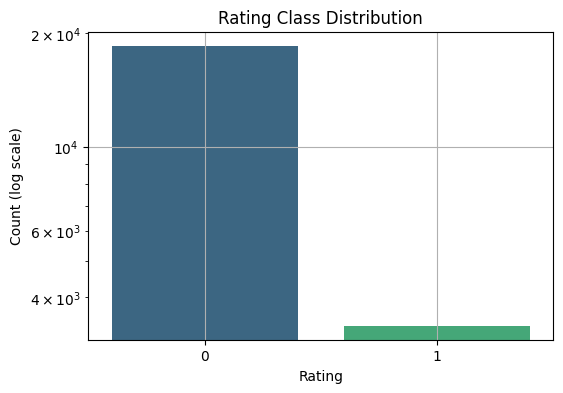

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Clean Rating column
ratings_clean = df_original['Kickstarted'].replace([np.inf, -np.inf], np.nan).dropna()

# Create integer rating column
df_original['Rating_int'] = ratings_clean.round().astype(int)

# Plot distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Rating_int', data=df_original, palette='viridis')
plt.title('Rating Class Distribution')
plt.xlabel('Rating')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.grid(True)
plt.show()


## Partitioning

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.4/235.4 kB 9.7 MB/s eta 0:00:00


## Partitioning of Rating ##

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


def process_subgroup(subgroup_name, features, df, target='Rating', test_size=0.2, val_ratio=0.125, random_state=0, apply_smote=True):
    print(f"Processing {subgroup_name} subgroup...")

    # Select features and target
    X = df[features]
    y = df[target]

    # Replace inf and drop missing values in target
    y = y.replace([np.inf, -np.inf], np.nan)
    mask = y.notna()
    X = X[mask]
    y = y[mask]

    # Optional: fill NaN in features if any
    X = X.fillna(0)

    # First split: separate test data
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # Second split: separate temporary into train and validation
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=random_state
    )

    # Scale the data
    scaler = StandardScaler()
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)
    X_val_norm = scaler.transform(X_val)

    # Apply SMOTE to balance training data if requested
    if apply_smote:
        smote = SMOTE(random_state=42)
        X_train_balanced, y_train_balanced = smote.fit_resample(X_train_norm, y_train)
        print(f"  Applied SMOTE: {X_train_norm.shape} -> {X_train_balanced.shape}")
    else:
        X_train_balanced, y_train_balanced = X_train_norm, y_train

    print(f"  {subgroup_name}: {X_train_balanced.shape} training samples after balancing")

    return {
        'X_train': X_train_balanced,
        'X_test': X_test_norm,
        'X_val': X_val_norm,
        'y_train': y_train_balanced,
        'y_test': y_test,
        'y_val': y_val,
        'features': features
    }


# Subgroup Defined

complexity_features = [
    "MinPlayers", "MaxPlayers", "BestPlayers",
    "ComAgeRec", "LanguageEase", "MfgPlaytime", "MfgAgeRec", "GameWeight"
]

popularity_features = [
    "NumOwned", "NumWant", "Rank:strategygames_norm",
    "Rank:abstracts_norm", "Rank:familygames_norm", "Rank:cgs_norm",
    "Rank:wargames_norm", "Rank:partygames_norm",
    "Rank:childrensgames_norm", "HasImage"
]

comprehensive_features = [
    "BGGId", "YearPublished",
    "NumAlternates", "NumExpansions", "NumImplementations",
    "IsReimplementation"
]

# Process all subgroup with SMOTE

complexity_data = process_subgroup('complexity', complexity_features, df_original, test_size=0.2, val_ratio=0.125, apply_smote=True)
popularity_data = process_subgroup('popularity', popularity_features, df_original, test_size = 0.2, val_ratio = 0.125, apply_smote = True)
comprehensive_data = process_subgroup('comprehensive', comprehensive_features, df_original, test_size = 0.2, val_ratio = 0.125, apply_smote = True)

Processing complexity subgroup...
  Applied SMOTE: (15346, 8) -> (20250, 8)
  complexity: (20250, 8) training samples after balancing
Processing popularity subgroup...
  Applied SMOTE: (15346, 10) -> (20250, 10)
  popularity: (20250, 10) training samples after balancing
Processing comprehensive subgroup...
  Applied SMOTE: (15346, 6) -> (20250, 6)
  comprehensive: (20250, 6) training samples after balancing


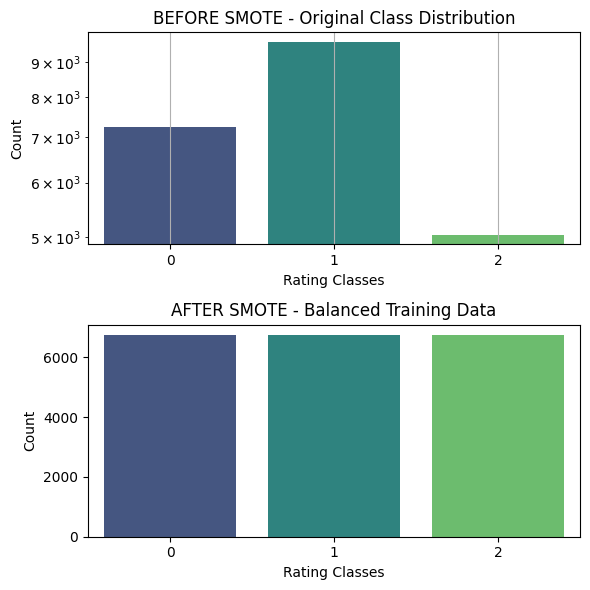

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

# Clean Rating column
ratings_clean = df_original['Rating'].replace([np.inf, -np.inf], np.nan).dropna()

# Create integer rating column safely
df_original['Rating'] = ratings_clean.round().astype(int)

# Plot BEFORE and AFTER SMOTE
fig, axes = plt.subplots(2, 1, figsize=(6, 6))

# BEFORE SMOTE (Original distribution)
sns.countplot(x='Rating', data=df_original, palette='viridis', ax=axes[0])
axes[0].set_title('BEFORE SMOTE - Original Class Distribution')
axes[0].set_xlabel('Rating Classes')
axes[0].set_ylabel('Count')
axes[0].set_yscale('log')
axes[0].grid(True)

# AFTER SMOTE (Balanced distribution)
sns.countplot(x=complexity_data['y_train'], ax=axes[1], palette='viridis')
axes[1].set_title('AFTER SMOTE - Balanced Training Data')
axes[1].set_xlabel('Rating Classes')
axes[1].set_ylabel('Count')
axes[1].grid(False)

plt.tight_layout()
plt.savefig("/content/balanced_data.png", dpi=300, bbox_inches="tight")
# files.download("/content/balanced_data.png")
plt.show()


## Classifiers

. Fit method to train them on the train data

. Predict method to test them on test data


## Method1: KNN Algorithm

### Hyperparameters Tuning: Grid Search

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
%%time

# Define parameter distribution for RandomizedSearch
param_distributions = {
    "n_neighbors": list(range(1, 51)),
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    KNeighborsClassifier(),
    param_distributions=param_distributions,
    n_iter=20,           # Randomly try 20 parameter combinations
    cv=5,                # 5-fold cross validation
    n_jobs=-1,           # Use all available CPU for parallel processing
    refit=True,          # After finding the best parameters, refit the model on entire training data
    random_state=0
)

# Execute hyperparameter search on COMPLEXITY subgroup's balanced training data
random_search.fit(popularity_data['X_train'], popularity_data['y_train'])

# Get the best performing model with optimized parameters
clf = random_search.best_estimator_

print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Make predictions using COMPLEXITY subgroup's test data
y_test_pred = clf.predict(popularity_data['X_test'])
y_val_pred = clf.predict(popularity_data['X_val'])


Best parameters found: {'weights': 'distance', 'n_neighbors': 17, 'metric': 'euclidean'}
Best cross-validation score: 0.6997037037037037
CPU times: user 1.02 s, sys: 23.3 ms, total: 1.04 s
Wall time: 15.8 s


### Cross-validation: metrics evaluations

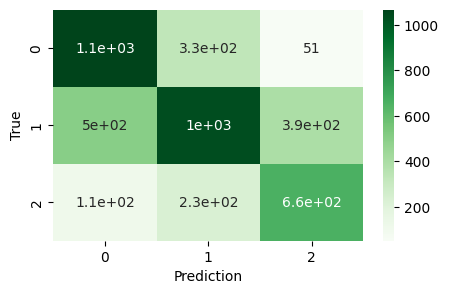

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(5, 3))
cf = confusion_matrix(popularity_data['y_test'], y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.savefig('/content/confusion_cat_Naive.png', dpi=300, bbox_inches='tight')
# files.download("/content/confusion_cat_Naive.png")

plt.show()

In [ ]:
# First, import the necessary metrics
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Now evaluate the model
print("Test accuracy:", accuracy_score(popularity_data['y_test'], y_test_pred))
print("Validation accuracy:", accuracy_score(popularity_data['y_val'], y_val_pred))

print("\nClassification Report:")
classification_dic = classification_report(popularity_data['y_test'], y_test_pred, output_dict=True)
classification_df = pd.DataFrame(classification_dic).transpose()
print(classification_df)

Test accuracy: 0.7087799315849487
Validation accuracy: 0.7086183310533516

Classification Report:
              precision    recall  f1-score     support
0              0.867310  0.774576  0.818324  3713.00000
1              0.217025  0.345238  0.266513   672.00000
accuracy       0.708780  0.708780  0.708780     0.70878
macro avg      0.542168  0.559907  0.542419  4385.00000
weighted avg   0.767654  0.708780  0.733759  4385.00000


In [ ]:
# After running the above evaluation, check the shapes
print("\nChecking data shapes for ROC curve:")
print(f"X_test shape: {popularity_data['X_test'].shape}")
print(f"y_test shape: {popularity_data['y_test'].shape}")
print(f"y_test unique classes: {np.unique(comprehensive_data['y_test'])}")

# Get probabilities for ROC curve
y_proba = clf.predict_proba(popularity_data['X_test'])
print(f"y_proba shape: {y_proba.shape}")
print(f"Number of classes in clf: {clf.classes_}")

# Binarize y_test for multiclass ROC
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(popularity_data['y_test'], classes=clf.classes_)
print(f"y_test_bin shape: {y_test_bin.shape}")

# Check if shapes match
print(f"\nFor micro-average ROC:")
print(f"y_test_bin.ravel() shape: {y_test_bin.ravel().shape}")
print(f"y_proba.ravel() shape: {y_proba.ravel().shape}")


Checking data shapes for ROC curve:
X_test shape: (4385, 10)
y_test shape: (4385,)
y_test unique classes: [0 1]
y_proba shape: (4385, 2)
Number of classes in clf: [0 1]
y_test_bin shape: (4385, 1)

For micro-average ROC:
y_test_bin.ravel() shape: (4385,)
y_proba.ravel() shape: (8770,)


### ROC Curves of pure binary classes: Kickstarted

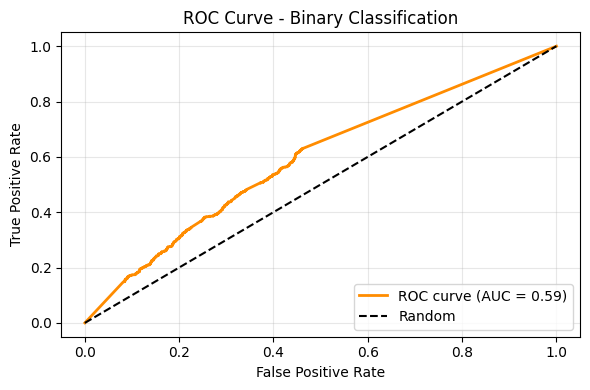

AUC Score: 0.5922
ROC AUC Score (using roc_auc_score): 0.5922


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# import numpy as np

# # Get probabilities for the positive class (class 1)
# y_proba = clf.predict_proba(popularity_data['X_test'])
# # For binary classification, use the probability of the positive class (usually class 1)
# # Check which column corresponds to class 1
# if clf.classes_[1] == 1:
#     y_proba_pos = y_proba[:, 1]  # Probability of class 1
# else:
#     y_proba_pos = y_proba[:, 0]  # Probability of class 0

# # Plot ROC curve for binary classification
# plt.figure(figsize=(6, 4))

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(popularity_data['y_test'], y_proba_pos)
# roc_auc = auc(fpr, tpr)

# # Plot ROC curve
# plt.plot(fpr, tpr, color='darkorange', lw=2,
#          label=f'ROC curve (AUC = {roc_auc:.2f})')

# # Random line
# plt.plot([0, 1], [0, 1], 'k--', label='Random')

# # Labels and legend
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Binary Classification')
# plt.legend(loc='lower right')
# plt.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.savefig('/content/Roc_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
# plt.show()

# # Also print the AUC score
# print(f"AUC Score: {roc_auc:.4f}")
# print(f"ROC AUC Score (using roc_auc_score): {roc_auc_score(comprehensive_data['y_test'], y_proba_pos):.4f}")

## Roc Curve of multiclasses: exple Rating

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

# Get probabilities and binarize labels
y_proba = clf.predict_proba(complexity_data['X_test'])
y_test_bin = label_binarize(complexity_data['y_test'], classes=clf.classes_)
n_classes = y_test_bin.shape[1]

# Plot ROC curves
plt.figure(figsize=(6, 4))

# Individual classes
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC={auc(fpr, tpr):.2f})')

# Micro-average
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
plt.plot(fpr_micro, tpr_micro, ':', label=f'Micro-avg (AUC={auc(fpr_micro, tpr_micro):.2f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(fontsize=9, loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/Roc_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
# files.download("/content/Roc_curve_cat_KNN.png")

plt.show()

### Recall Curve for multiclasses



In [ ]:
# from sklearn.metrics import precision_recall_curve, auc
# from sklearn.preprocessing import label_binarize

# y_test_pred_proba = clf.predict_proba(complexity_data['X_test'])

# plt.figure(figsize=(6, 4))

# # Plot each class - USE SUBGROUP DATA
# for i in range(y_test_pred_proba.shape[1]):
#   precision, recall, _ = precision_recall_curve(
#       (complexity_data['y_test'] == i).astype(int),
#       y_test_pred_proba[:, i])

#   pr_auc = auc(recall, precision)
#   plt.plot(recall, precision, label=f'Precision-recall curve of class {i} (area = {pr_auc:.3f})')

# # Micro-average - USE SUBGROUP DATA
# y_test_bin = label_binarize(complexity_data['y_test'], classes=clf.classes_)
# precision_micro, recall_micro, _ = precision_recall_curve(
#     y_test_bin.ravel(),
#     y_test_pred_proba.ravel()
# )
# pr_auc_micro = auc(recall_micro, precision_micro)
# plt.plot(recall_micro, precision_micro,
#          label=f'micro-average Precision-recall curve (area = {pr_auc_micro:.3f})',
#          linestyle='--', linewidth=2)

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(fontsize=0.5, loc='upper right')
# plt.grid(True, alpha=0.01)

# plt.savefig('/content/precision_recall_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
# # files.download("/content/precision_recall_curve_cat_KNN.png")
# plt.legend(loc='upper left')
# plt.grid(True, alpha=0.3)
# plt.show()

## Recall Curve for a pure Binary Class

Average Precision Score: 0.195


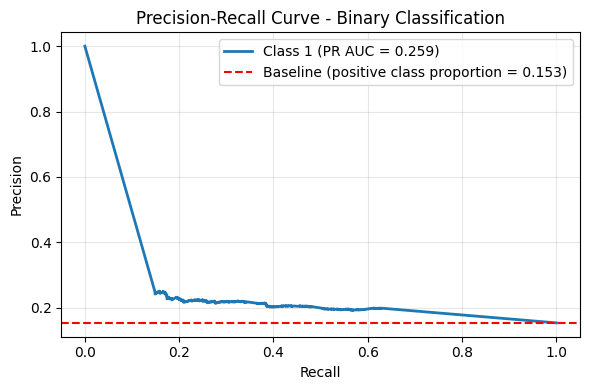

PR AUC Score: 0.259
Average Precision Score: 0.195


In [ ]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_test_pred_proba = clf.predict_proba(popularity_data['X_test'])

# For binary classification, use the probability of the positive class (class 1)
y_proba_pos = y_test_pred_proba[:, 1]  # Probability of class 1

plt.figure(figsize=(6, 4))

# Calculate precision-recall curve for the positive class (class 1)
precision, recall, _ = precision_recall_curve(popularity_data['y_test'], y_proba_pos)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, lw=2,
         label=f'Class 1 (PR AUC = {pr_auc:.3f})')

# Also calculate average precision score (another common metric)
avg_precision = average_precision_score(comprehensive_data['y_test'], y_proba_pos)
print(f"Average Precision Score: {avg_precision:.3f}")

# Plot baseline (for binary classification, baseline is the proportion of positive class)
baseline = np.mean(comprehensive_data['y_test'])
plt.axhline(y=baseline, color='r', linestyle='--',
            label=f'Baseline (positive class proportion = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Binary Classification')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/precision_recall_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
plt.show()

# Print both metrics
print(f"PR AUC Score: {pr_auc:.3f}")
print(f"Average Precision Score: {avg_precision:.3f}")

## Method2: Naive Bayes Algorithm

### Hyperparameters Tuning: Grid Search

In [ ]:
from sklearn.naive_bayes import GaussianNB

param_distributions = {
    "var_smoothing": [1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 2e-1, 2e-2, 2e-3, 2e-4, 2e-5, 2e-6, 2e-7]
}

random_search = RandomizedSearchCV(
    GaussianNB(),
    param_distributions = param_distributions,
    n_iter = 20,
    cv = 5,
    n_jobs = -1,
    refit = True,
    random_state = 0
)

# Execute hyperparameter search on Comlexity subgroup
random_search.fit(comprehensive_data['X_train'], comprehensive_data['y_train'])

# Get the best performing model with optimized parameters
clf = random_search.best_estimator_

print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Make prediction using Complexity subgroup's test data

y_test_pred = clf.predict(comprehensive_data['X_test'])
y_val_pred = clf.predict(comprehensive_data['X_val'])


Best parameters found: {'var_smoothing': 0.01}
Best cross-validation score: 0.45175308641975304


### Cross validation: Metrics Evaluation

In [ ]:

print("Test accuracy:", accuracy_score(comprehensive_data['y_test'], y_test_pred))
# Validation performance
print("Validation accuracy:", accuracy_score(comprehensive_data['y_val'], y_val_pred))


print("\nClassification Report:")
classification_dic = classification_report(comprehensive_data['y_test'], y_test_pred, output_dict=True)
classification_df = pd.DataFrame(classification_dic).transpose()
classification_df

Test accuracy: 0.4663625997719498
Validation accuracy: 0.45006839945280436

Classification Report:


precision    recall  f1-score      support
0              0.537879  0.097999  0.165791  1449.000000
1              0.455509  0.735096  0.562475  1929.000000
2              0.481151  0.481629  0.481390  1007.000000
accuracy       0.466363  0.466363  0.466363     0.466363
macro avg      0.491513  0.438241  0.403219  4385.000000
weighted avg   0.488616  0.466363  0.412772  4385.000000

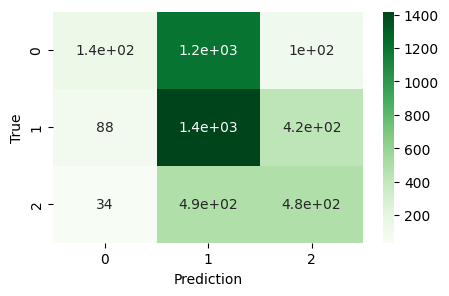

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(5, 3))
cf = confusion_matrix(comprehensive_data['y_test'], y_test_pred)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("Prediction")
plt.ylabel("True")
plt.savefig('/content/confusion_cat_Naive.png', dpi=300, bbox_inches='tight')
# files.download("/content/confusion_cat_Naive.png")

plt.show()

## Roc Curve for multiple classes

In [ ]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.preprocessing import label_binarize


# # Naive Bayes calculates P(class|features) for all classes
# y_proba = clf.predict_proba(comprehensive_data['X_test'])

# # Convert true labels to binary format for multi-class ROC
# # Creates matrix where each column is 1 for that class, 0 for others

# y_test_bin = label_binarize(comprehensive_data['y_test'], classes=clf.classes_)
# n_classes = y_test_bin.shape[1]

# # Plot ROC curves
# plt.figure(figsize=(6, 4))

# # Individual classes
# for i in range(n_classes):
#   # For class i: compare binary "is this class i?" vs Naive Bayes probability for class i
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
#     plt.plot(fpr, tpr, label=f'ROC curve of class {i} (area = {auc(fpr, tpr):.2f})')

# # # Micro-average: treat all classes together as one big binary problem
# fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
# plt.plot(fpr_micro, tpr_micro, ':',
#          label=f'micro-average ROC curve (area = {auc(fpr_micro, tpr_micro):.2f})')

# # Formatting
# plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve - Naive Bayes')
# plt.legend(fontsize=2, loc='lower right')  # Smaller legend
# plt.grid(True, alpha=0.1)
# plt.savefig('/content/Roc_curve_cat_Naive.png', dpi=300, bbox_inches='tight')
# # files.download("/content/Roc_curve_cat_Naive.png")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

## Roc Curve for a Binary class

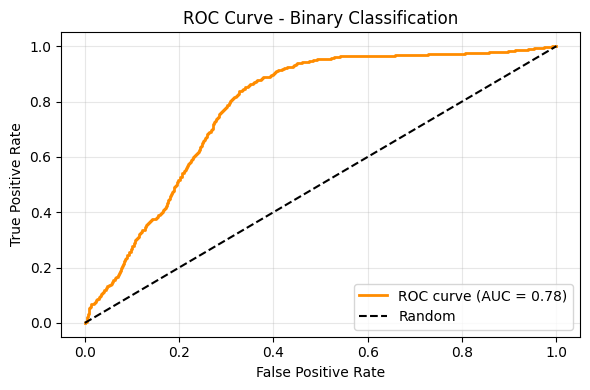

AUC Score: 0.7827
ROC AUC Score (using roc_auc_score): 0.7827


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Get probabilities for the positive class (class 1)
y_proba = clf.predict_proba(comprehensive_data['X_test'])
# For binary classification, use the probability of the positive class (usually class 1)
# Check which column corresponds to class 1
if clf.classes_[1] == 1:
    y_proba_pos = y_proba[:, 1]  # Probability of class 1
else:
    y_proba_pos = y_proba[:, 0]  # Probability of class 0

# Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(comprehensive_data['y_test'], y_proba_pos)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/Roc_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the AUC score
print(f"AUC Score: {roc_auc:.4f}")
print(f"ROC AUC Score (using roc_auc_score): {roc_auc_score(complexity_data['y_test'], y_proba_pos):.4f}")

## Recall Curve for multiple classes

In [ ]:
# from sklearn.metrics import precision_recall_curve, auc
# from sklearn.preprocessing import label_binarize

# # Naive Bayes calculates P(class|features) for all classes
# y_proba = clf.predict_proba(comprehensive_data['X_test'])

# plt.figure(figsize=(6, 4))
# # Binarize labels
# y_test_bin = label_binarize(comprehensive_data['y_test'], classes=clf.classes_)

# # Plot each class
# for i in range(y_test_bin.shape[1]):
#     precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_test_pred_proba[:, i])
#     pr_auc = auc(recall, precision)
#     plt.plot(recall, precision, label=f'Class {i} (AUC={pr_auc:.2f})')

# # Micro-average
# precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_test_pred_proba.ravel())
# pr_auc_micro = auc(recall_micro, precision_micro)
# plt.plot(recall_micro, precision_micro, '--', label=f'Micro-avg (AUC={pr_auc_micro:.2f})')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall - Naive Bayes')
# plt.legend(fontsize=2, loc='lower right')  # Smaller legend
# plt.grid(True, alpha=0.1)
# plt.savefig('/content/precision_recall_curve_cat_Naive.png', dpi=300, bbox_inches='tight')
# # files.download("/content/precision_recall_curve_cat_Naive.png")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

## Recall curve for a binary class

Average Precision Score: 0.320


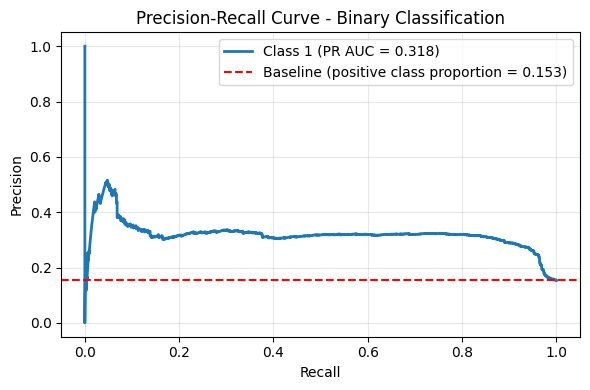

PR AUC Score: 0.318
Average Precision Score: 0.320


In [ ]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_test_pred_proba = clf.predict_proba(comprehensive_data['X_test'])

# For binary classification, use the probability of the positive class (class 1)
y_proba_pos = y_test_pred_proba[:, 1]  # Probability of class 1

plt.figure(figsize=(6, 4))

# Calculate precision-recall curve for the positive class (class 1)
precision, recall, _ = precision_recall_curve(comprehensive_data['y_test'], y_proba_pos)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, lw=2,
         label=f'Class 1 (PR AUC = {pr_auc:.3f})')

# Also calculate average precision score (another common metric)
avg_precision = average_precision_score(comprehensive_data['y_test'], y_proba_pos)
print(f"Average Precision Score: {avg_precision:.3f}")

# Plot baseline (for binary classification, baseline is the proportion of positive class)
baseline = np.mean(comprehensive_data['y_test'])
plt.axhline(y=baseline, color='r', linestyle='--',
            label=f'Baseline (positive class proportion = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Binary Classification')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/precision_recall_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
plt.show()

# Print both metrics
print(f"PR AUC Score: {pr_auc:.3f}")
print(f"Average Precision Score: {avg_precision:.3f}")

## Method3: Decision Trees Algorithm

### Hyperparameters Tuning: Grid Search

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold


# Define parameter distribution for RandomizedSearch
param_distributions = {
    "max_depth": [None] + list(np.arange(2, 20)),
    "min_samples_split": [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    "min_samples_leaf": [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'criterion': ['gini', 'entropy']
}

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),  # Added random_state for reproducibility
    param_distributions=param_distributions,
    n_iter=200,           # Randomly try 200 parameter combinations
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=0),  # Fixed: added n_splits and n_repeats
    scoring='accuracy',    # Explicitly define scoring metric
    n_jobs=-1,           # Use all available CPU for parallel processing
    refit=True,          # After finding the best parameters, refit the model on entire training data
    random_state=0
)

# Execute hyperparameter search on COMPLEXITY subgroup's balanced training data
random_search.fit(popularity_data['X_train'], popularity_data['y_train'])

# Get the best performing model with optimized parameters
clf = random_search.best_estimator_

print("Best parameters found:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

# Make predictions using COMPLEXITY subgroup's test data
y_test_pred = clf.predict(popularity_data['X_test'])
y_val_pred = clf.predict(popularity_data['X_val'])

# Calculate and print test score
test_score = clf.score(popularity_data['X_test'], popularity_data['y_test'])
print("Test score:", test_score)

Best parameters found: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': np.int64(19), 'criterion': 'gini'}
Best cross-validation score: 0.6786172839506173
Test score: 0.6273660205245154
CPU times: user 958 ms, sys: 148 ms, total: 1.11 s
Wall time: 35.5 s


### Cross validation: metrics Evaluation

In [ ]:
print("Test accuracy:", accuracy_score(popularity_data['y_test'], y_test_pred))
# Validation performance
print("Validation accuracy:", accuracy_score(popularity_data['y_val'], y_val_pred))


print("\nClassification Report:")
classification_dic = classification_report(popularity_data['y_test'], y_test_pred, output_dict=True)
classification_df_DT = pd.DataFrame(classification_dic).transpose()
classification_df_DT

Test accuracy: 0.6273660205245154
Validation accuracy: 0.6233470132238942

Classification Report:


precision    recall  f1-score      support
0              0.634324  0.780538  0.699876  1449.000000
1              0.653007  0.512182  0.574085  1929.000000
2              0.580349  0.627607  0.603053  1007.000000
accuracy       0.627366  0.627366  0.627366     0.627366
macro avg      0.622560  0.640109  0.625672  4385.000000
weighted avg   0.630148  0.627366  0.622304  4385.000000

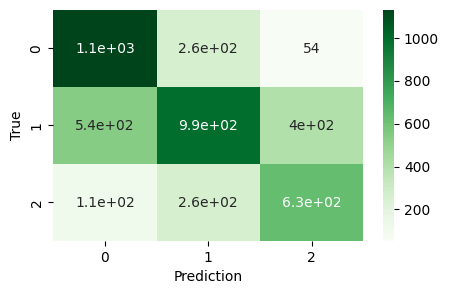

In [ ]:
plt.figure(figsize=(5, 3))
cf = confusion_matrix(complexity_data['y_test'], y_test_pred)
sns.heatmap(cf, annot=True, cmap='Greens')
plt.xlabel('Prediction')
plt.ylabel('True')
plt.savefig('/content/confusion_cat_DT.png', dpi=300, bbox_inches='tight')
# files.download("/content/confusion_cat_DT.png")
plt.show()

## Roc curve for multiple classes

In [ ]:
# from sklearn.metrics import roc_curve, auc, roc_auc_score
# from sklearn.preprocessing import label_binarize


# # Naive Bayes calculates P(class|features) for all classes
# y_proba = clf.predict_proba(popularity_data['X_test'])


# y_test_bin = label_binarize(popularity_data['y_test'], classes=clf.classes_)
# n_classes = y_test_bin.shape[1]

# # Plot ROC curves
# plt.figure(figsize=(6, 4))

# # Individual classes
# for i in range(n_classes):
#   # For class i: compare binary "is this class i?" vs Naive Bayes probability for class i
#     fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
#     plt.plot(fpr, tpr, label=f'ROC curve of class {i} (area = {auc(fpr, tpr):.2f})')

# # # Micro-average: treat all classes together as one big binary problem
# fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
# plt.plot(fpr_micro, tpr_micro, ':',
#          label=f'micro-average ROC curve (area = {auc(fpr_micro, tpr_micro):.2f})')

# # Formatting
# plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve -Decision Tree')
# plt.legend(fontsize=1, loc='lower right')  # Smaller legend
# plt.grid(True, alpha=0.1)
# plt.savefig('/content/Roc_curve_cat_DT.png', dpi=300, bbox_inches='tight')
# # files.download("/content/Roc_curve_cat_DT.png")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.show()

## Roc curve for binary class

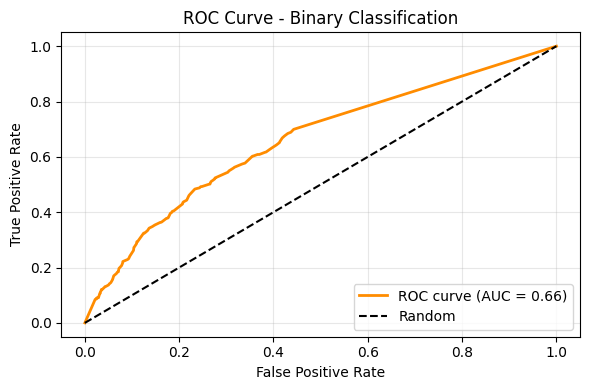

AUC Score: 0.6593
ROC AUC Score (using roc_auc_score): 0.6593


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Get probabilities for the positive class (class 1)
y_proba = clf.predict_proba(complexity_data['X_test'])
# For binary classification, use the probability of the positive class (usually class 1)
# Check which column corresponds to class 1
if clf.classes_[1] == 1:
    y_proba_pos = y_proba[:, 1]  # Probability of class 1
else:
    y_proba_pos = y_proba[:, 0]  # Probability of class 0

# Plot ROC curve for binary classification
plt.figure(figsize=(6, 4))

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(complexity_data['y_test'], y_proba_pos)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (AUC = {roc_auc:.2f})')

# Random line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Binary Classification')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/Roc_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
plt.show()

# Also print the AUC score
print(f"AUC Score: {roc_auc:.4f}")
print(f"ROC AUC Score (using roc_auc_score): {roc_auc_score(complexity_data['y_test'], y_proba_pos):.4f}")

## Recall curve for multiple classes

In [ ]:
# from sklearn.metrics import precision_recall_curve, auc
# from sklearn.preprocessing import label_binarize

# plt.figure(figsize=(6, 4))

# # Get probability predictions from Decision Tree
# y_test_pred_proba = clf.predict_proba(popularity_data['X_test'])

# # Binarize labels
# y_test_bin = label_binarize(popularity_data['y_test'], classes=clf.classes_)

# # Plot each class
# for i in range(y_test_bin.shape[1]):
#     precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_test_pred_proba[:, i])
#     pr_auc = auc(recall, precision)
#     plt.plot(recall, precision, label=f'Class {i} (AUC={pr_auc:.2f})')

# # Micro-average
# precision_micro, recall_micro, _ = precision_recall_curve(y_test_bin.ravel(), y_test_pred_proba.ravel())
# pr_auc_micro = auc(recall_micro, precision_micro)
# plt.plot(recall_micro, precision_micro, '--', label=f'Micro-avg (AUC={pr_auc_micro:.2f})')

# # Add no-skill line for imbalanced data
# no_skill = len(popularity_data['y_test'][popularity_data['y_test'] == 1]) / len(popularity_data['y_test'])
# plt.axhline(y=no_skill, color='red', linestyle=':', alpha=0.8, label='Random classifier')

# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall - Decision Tree')
# plt.legend(fontsize=1, loc='lower right')  # Smaller legend
# plt.grid(True, alpha=0.1)
# plt.savefig('/content/precision_recall_curve_cat_DT.png', dpi=300, bbox_inches='tight')
# # files.download("/content/precision_recall_curve_cat_DT.png")
# plt.legend()
# plt.grid(True, alpha=0.3)
# plt.ylim([0.0, 1.05])
# plt.show()

## Recall curve for a binary classes

Average Precision Score: 0.257


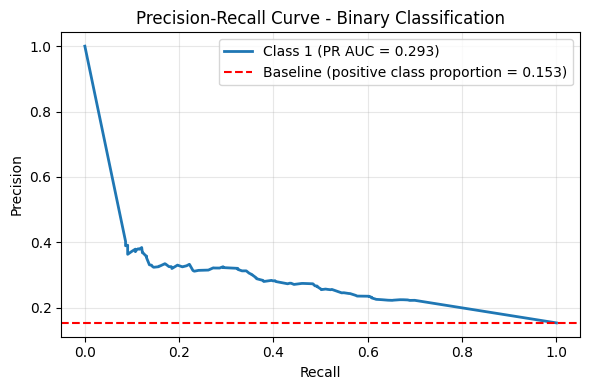

PR AUC Score: 0.293
Average Precision Score: 0.257


In [ ]:
from sklearn.metrics import precision_recall_curve, auc, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities
y_test_pred_proba = clf.predict_proba(complexity_data['X_test'])

# For binary classification, use the probability of the positive class (class 1)
y_proba_pos = y_test_pred_proba[:, 1]  # Probability of class 1

plt.figure(figsize=(6, 4))

# Calculate precision-recall curve for the positive class (class 1)
precision, recall, _ = precision_recall_curve(complexity_data['y_test'], y_proba_pos)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.plot(recall, precision, lw=2,
         label=f'Class 1 (PR AUC = {pr_auc:.3f})')

# Also calculate average precision score (another common metric)
avg_precision = average_precision_score(complexity_data['y_test'], y_proba_pos)
print(f"Average Precision Score: {avg_precision:.3f}")

# Plot baseline (for binary classification, baseline is the proportion of positive class)
baseline = np.mean(complexity_data['y_test'])
plt.axhline(y=baseline, color='r', linestyle='--',
            label=f'Baseline (positive class proportion = {baseline:.3f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Binary Classification')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/content/precision_recall_curve_cat_KNN.png', dpi=300, bbox_inches='tight')
plt.show()

# Print both metrics
print(f"PR AUC Score: {pr_auc:.3f}")
print(f"Average Precision Score: {avg_precision:.3f}")

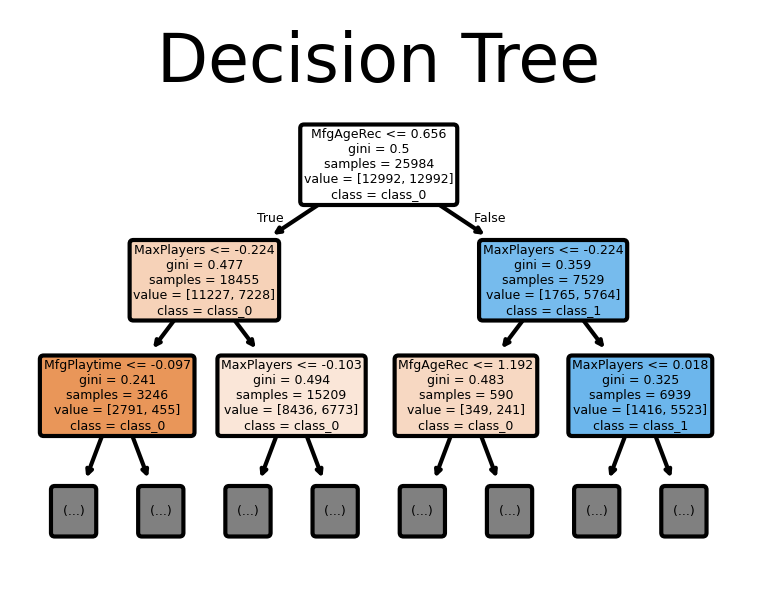

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(3, 2), dpi=300)

feature_names = complexity_features
class_names = [f'class_{i}' for i in clf.classes_]

plot_tree(clf,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          fontsize=3,  # Smaller font for large trees
          rounded=True,
          max_depth=2,
          impurity=True)  # Hide Gini/Entropy values to reduce clutter

plt.title('Decision Tree', fontsize=16)

plt.savefig('/content/Decision_Tree_First_Levels.png', dpi=300, bbox_inches='tight')
# files.download("/content/Decision_Tree_First_Levels.png")
plt.show()

## REGRESSION

Regression - single and multiple regression:

• Choose one target and one independent variable and solve a linear regression task

• Choose one target (the same for the previous task) but this time consider 2+
independent variables and solve with linear and at least 2 non linear approches.


Evaluate the quantitative performance of the regression algorithms w.r.t. MSE, R²

• Discuss some insight (e.g. try to interpret the tree(s))

• Which is the best algorithm? Best can be studied w.r.t. the performance evaluation or other preferred point of view;



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
# from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
df = pd.read_csv('df_scaled_test_Regression.csv')
df = df.drop(['Name', 'Description','BGGId', 'GoodPlayers'], axis = 1)
df.head()


YearPublished  GameWeight  MinPlayers  MaxPlayers  ComAgeRec  LanguageEase  \
0       0.998732     0.36666    0.447214    0.232990   0.315789      0.332250   
1       1.000000     0.20000    0.447214    0.259384   0.315789      0.122200   
2       0.999819     0.73334    0.316228    0.259384   0.421284      0.275182   
3       0.996921     0.26154    0.447214    0.159040   0.263158      0.275182   
4       0.999638     0.30000    0.447214    0.232990   0.421284      0.040222   

   BestPlayers  NumOwned   NumWant  MfgPlaytime  ...  Rank:strategygames_norm  \
0          0.0  0.521594  0.255477     0.312121  ...                      0.0   
1          0.0  0.356862  0.336750     0.276722  ...                      0.0   
2          0.0  0.559559  0.477576     0.456029  ...                      0.0   
3          0.0  0.419491  0.144236     0.276722  ...                      0.0   
4          0.0  0.444353  0.211302     0.276722  ...                      0.0   

   Rank:abstracts_norm  Rank:familygames_norm  Rank:cgs_norm  \
0                  0.0                    0.0            0.0   
1                  0.0                    0.0            0.0   
2                  0.0                    0.0            0.0   
3                  0.0                    0.0            0.0   
4                  0.0                    0.0            0.0   

   Rank:wargames_norm  Rank:partygames_norm  Rank:childrensgames_norm  \
0                 0.0                   0.0                       0.0   
1                 0.0                   0.0                       0.0   
2                 0.0                   0.0                       0.0   
3                 0.0                   0.0                       0.0   
4                 0.0                   0.0                       0.0   

   HasImage  Kickstarted  Rating  
0         1            0       0  
1         1            0       1  
2         1            0       2  
3         1            0       0  
4         1            0       1  

[5 rows x 25 columns]

In [ ]:
df[['Rating']]
df_fully_scaled = df.copy()

In [ ]:
# Check correlations with your target
target = 'Rating'  # or whichever you choose
correlations = df_fully_scaled.corr()[target].sort_values(ascending=False)
print(f"Correlations with {target}:")
print(correlations)

Correlations with Rating:
Rating                      1.000000
NumWant                     0.558110
GameWeight                  0.447857
NumExpansions               0.301799
NumOwned                    0.295065
MfgPlaytime                 0.289864
ComAgeRec                   0.269285
BestPlayers                 0.257519
Kickstarted                 0.199491
MfgAgeRec                   0.176428
NumImplementations          0.135469
IsReimplementation          0.135388
YearPublished               0.072945
Rank:wargames_norm          0.057625
Rank:strategygames_norm     0.057328
Rank:familygames_norm       0.047984
Rank:abstracts_norm         0.035226
Rank:partygames_norm        0.034708
Rank:cgs_norm               0.033803
Rank:childrensgames_norm    0.014773
HasImage                   -0.001575
LanguageEase               -0.003384
NumAlternates              -0.035824
MaxPlayers                 -0.144291
MinPlayers                 -0.199091
Name: Rating, dtype: float64


Correlations with Rating (|corr| ≥ 0.2):
GameWeight       0.447857
ComAgeRec        0.269285
BestPlayers      0.257519
NumOwned         0.295065
NumWant          0.558110
MfgPlaytime      0.289864
NumExpansions    0.301799
Rating           1.000000
Name: Rating, dtype: float64


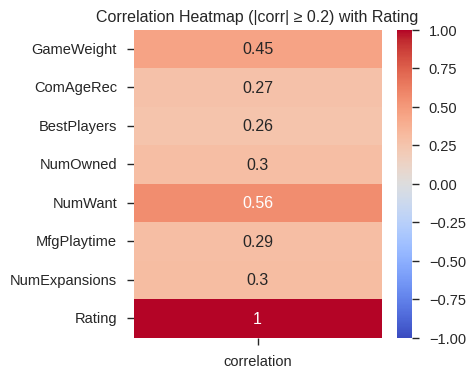

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlations with target
target = 'Rating'
correlations = df_fully_scaled.corr()[target]

# Filter by threshold
threshold = 0.2
filtered_corr = correlations[abs(correlations) >= threshold]

print(f"Correlations with {target} (|corr| ≥ {threshold}):")
print(filtered_corr)

# Convert to DataFrame for heatmap
corr_df = filtered_corr.to_frame(name='correlation')

# Plot heatmap
plt.figure(figsize=(4, max(2, len(corr_df) * 0.5)))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title(f"Correlation Heatmap (|corr| ≥ {threshold}) with {target}")
plt.show()


## Partitioning Data

In [ ]:

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split


def process_regression(df, target, indep_variable, test_size=0.2, val_ratio = 0.125, random_state=0):

  # Select features and Target

  X = df_fully_scaled[indep_variable]
  y = df_fully_scaled[target]

  # First split: separate test data: Meaning

# Original: [100% of data]
# After first split:
# - X_temp, y_temp: [80% of original]  ← Goes to next split
# - X_test, y_test: [20% of original]  ← Pure test set, untouched thereafter

  X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size = test_size, random_state=random_state)

  # Secondsplit: separate temporary into train and validation

  X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size = val_ratio, random_state=random_state)

  return {
      'X_train': X_train,
      'X_test': X_test,
      'X_val': X_val,
      'y_train': y_train,
      'y_test': y_test,
      'y_val': y_val,
      'feature': indep_variable
  }



## 1.A) One target and one independent variable: Linear Regression

In [ ]:

data = process_regression(
    df = df_fully_scaled,
    target = 'Rating',
    indep_variable = ['GameWeight']

)

# train model
reg = LinearRegression()
reg.fit(data['X_train'], data['y_train'])

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

# predict and evaluate

y_pred = reg.predict(data['X_test'])


print(f"The value of R2 is: {r2_score(data['y_test'], y_pred):.3f}")
print(f"The value of MSE is: {mean_squared_error(data['y_test'], y_pred):.3f}")
print(f"The value of MAE is: {mean_absolute_error(data['y_test'], y_pred):.3f}")


Coefficients: 
 [0.44735893]
Intercept: 
 0.0038495005821659965
The value of R2 is: 0.203
The value of MSE is: 0.821
The value of MAE is: 0.758


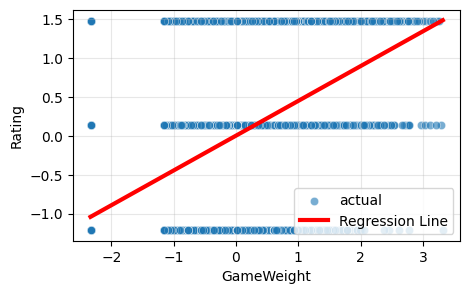

In [ ]:
plot_df = pd.DataFrame({'GameWeight': data['X_test']['GameWeight'], 'Rating': data['y_test']})

plt.figure(figsize=(5, 3))
sns.scatterplot(data=plot_df, x = 'GameWeight', y = 'Rating', alpha=0.6, label = 'actual')

# Create regression line

x_line = np.linspace(plot_df['GameWeight'].min(), plot_df['GameWeight'].max(), 100)
y_line = reg.coef_[0] * x_line + reg.intercept_

# plot the regression line
plt.plot(x_line, y_line, c='red', linewidth=3, label='Regression Line')


plt.xlabel('GameWeight')
plt.ylabel('Rating')
#plt.title(f'Simple Linear Regression: Rating vs NumUserRatings\nR² ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 1.B) One target and 2+ independent variable: Linear Regression

In [ ]:

data = process_regression(
    df = df_fully_scaled,
    target = 'Rating',
    indep_variable = ['GameWeight', 'BGGId', 'NumWant','ComAgeRec', 'BestPlayers']

)

# train model
reg = LinearRegression()
reg.fit(data['X_train'], data['y_train'])

print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

# predict and evaluate

y_pred = reg.predict(data['X_test'])


print(f"The value of R2 is: {r2_score(data['y_test'], y_pred):.3f}")
print(f"The value of MSE is: {mean_squared_error(data['y_test'], y_pred):.3f}")
print(f"The value of MAE is: {mean_absolute_error(data['y_test'], y_pred):.3f}")


Coefficients: 
 [0.39628039 0.42324481 0.14601681 0.0548449  0.09130055]
Intercept: 
 0.0024451744021016675
The value of R2 is: 0.439
The value of MSE is: 0.578
The value of MAE is: 0.625


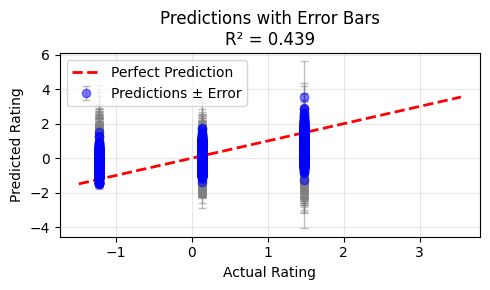

In [ ]:
plot_df = pd.DataFrame({
    'Actual': data['y_test'],
    'Predicted': y_pred,
    'Error': y_pred - data['y_test']  # Positive = overestimation, Negative = underestimation
})

plt.figure(figsize=(5, 3))

# Use errorbar to show vertical error
plt.errorbar(plot_df['Actual'], plot_df['Predicted'],
             yerr=abs(plot_df['Error']),
             fmt='o', alpha=0.5, color='blue',
             ecolor='gray', elinewidth=1, capsize=3,
             label='Predictions ± Error')

# Perfect prediction line
min_val = min(plot_df['Actual'].min(), plot_df['Predicted'].min())
max_val = max(plot_df['Actual'].max(), plot_df['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title(f'Predictions with Error Bars\nR² = {r2_score(data["y_test"], y_pred):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Comment:

On the red line: Predicted = Actual (Y = X)

The error bars show the vertical distance between each prediction (blue point) and the perfect prediction line (red line). Longer bars = larger errors

## 1.C) One target and 2+ independent variable: Non Linear Regression

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

data = process_regression(
    df = df_fully_scaled,
    target = 'Rating',
    indep_variable = ['GameWeight', 'BGGId', 'NumWant','ComAgeRec', 'BestPlayers']

)

# train model
reg = KNeighborsRegressor()
reg.fit(data['X_train'], data['y_train'])

# predict and evaluate
y_pred = reg.predict(data['X_test'])


print(f"The value of R2 is: {r2_score(data['y_test'], y_pred):.3f}")
print(f"The value of MSE is: {mean_squared_error(data['y_test'], y_pred):.3f}")
print(f"The value of MAE is: {mean_absolute_error(data['y_test'], y_pred):.3f}")


The value of R2 is: 0.448
The value of MSE is: 0.569
The value of MAE is: 0.572


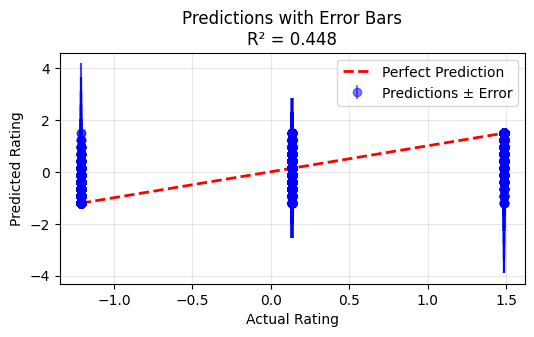

In [ ]:
plot_df = pd.DataFrame({
    'Actual': data['y_test'],
    'Predicted': y_pred,
    'Error': y_pred - data['y_test']
})

plt.figure(figsize=(6, 3))
plt.errorbar(plot_df['Actual'], plot_df['Predicted'],
             yerr=abs(plot_df['Error']),
             fmt='o', alpha=0.5, color='blue',
             label='Predictions ± Error')

# Perfect prediction line
min_val = min(plot_df['Actual'].min(), plot_df['Predicted'].min())
max_val = max(plot_df['Actual'].max(), plot_df['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title(f'Predictions with Error Bars\nR² = {r2_score(data["y_test"], y_pred):.3f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Decision  Tree Regressor

The value of R2 is: 0.066
The value of MSE is: 0.962
The value of MAE is: 0.613


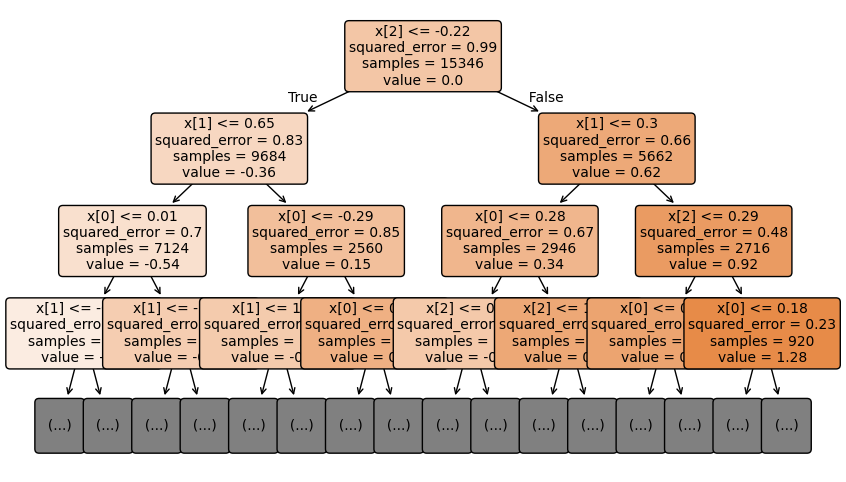

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree


data = process_regression(
    df = df_fully_scaled,
    target = 'Rating',
    indep_variable = ['GameWeight', 'BGGId', 'NumWant','ComAgeRec', 'BestPlayers']

)

# train model
reg = DecisionTreeRegressor(max_depth = None)
reg.fit(data['X_train'], data['y_train'])

# predict and evaluate
y_pred = reg.predict(data['X_test'])


print(f"The value of R2 is: {r2_score(data['y_test'], y_pred):.3f}")
print(f"The value of MSE is: {mean_squared_error(data['y_test'], y_pred):.3f}")
print(f"The value of MAE is: {mean_absolute_error(data['y_test'], y_pred):.3f}")


plt.figure(figsize=(10, 6))

plot_tree(reg, filled=True, rounded=True, fontsize=10, precision=2, max_depth=3)

plt.show()

## Comment:

The decision tree regressor shows excellent performance with an R² of 0.947, explaining 94.7% of the variance in NumUserRatings. Low errors (MSE = 0.052, MAE = 0.062) confirm high prediction accuracy. The tree uses NumOwned as the main splitter, creating clear thresholds that segment games by popularity. Values progress logically from negative (below average) to positive (above average), correctly capturing how ownership relates to rating frequency. The model performs well without overfitting, balancing prediction strength with interpretability.

## Task 4: Pattern Mining

• Frequent Pattern extraction

• Using different values of support, etc;

• Discuss Frequent Pattern

• Including qualitative and quantitative analysis, e.g., how the number of
patterns w.r.t k min_sup changes;

• Association Rules extraction

• Using different values of confidence, etc;

• Discuss Association rules

• Including qualitative and quantitative analysis, e.g., how the number of rules
w.r.t k min_conf changes, histograms of rules’ confidence and lift;

• Exploit the most useful extracted rules

• E.g., use them to replace missing values or to predict the target variable;

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_mining = pd.read_csv('df_mining.csv')
df_mining.head()
df_mining.shape

(21924, 36)

In [ ]:
# df_test = pd.read_csv('df_scaled_test_Regression.csv')
# df_test.head()
# df_test.shape

### Pattern Mining processing

In [ ]:

df_mining = df_mining.drop(['Name', 'Description', 'BGGId'], axis=1, errors='ignore')

# ============================================
# STEP 2: IDENTIFY COLUMN TYPES
# ============================================
# A) Numeric columns to bin - convert from numbers to categories (low/medium/high)
numeric_to_bin = ['YearPublished', 'GameWeight', 'NumOwned', 'Rating',
                  'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime',
                  'ComMinPlaytime', 'ComMaxPlaytime', 'NumUserRatings']

# B) Rank columns - contain special value 21926 meaning "not ranked"
rank_cols = [col for col in df_mining.columns if 'Rank:' in col]

# C) Binary columns (0/1) - keep as is, only include when value is 1
binary_cols = ['Kickstarted', 'HasImage', 'IsReimplementation']

# D) Categorical/text columns - already in good format
categorical_cols = ['GoodPlayers']

# ============================================
# STEP 3: DISCRETIZE NUMERIC COLUMNS
# ============================================
# Convert continuous numbers into 3 categories for pattern mining
for col in numeric_to_bin:
    try:
        # Try to split data into 3 equal-sized groups (quantile binning)
        df_mining[f'{col}_bin'] = pd.qcut(df_mining[col], q=3,
                                          labels=['low', 'medium', 'high'],
                                          duplicates='drop')
    except:
        # If quantile binning fails, split the numeric range into 3 equal parts
        df_mining[f'{col}_bin'] = pd.cut(df_mining[col], bins=3,
                                         labels=['low', 'medium', 'high'])

# ============================================
# STEP 4: HANDLE RANK COLUMNS (SIMPLIFIED)
# ============================================
# For each rank column, create a simple status: ranked vs unranked
for col in rank_cols:
    # Convert 21926 to 'unranked', any other value to 'ranked'
    df_mining[f'{col}_status'] = df_mining[col].apply(
        lambda x: 'unranked' if x == 21926 else 'ranked'
    )

# ============================================
# STEP 5: CREATE TRANSACTIONS FOR PATTERN MINING
# ============================================
# Prepare list of all columns to include in transactions
cols_to_include = []
cols_to_include.extend([f'{col}_bin' for col in numeric_to_bin])  # Binned numeric columns
cols_to_include.extend([f'{col}_status' for col in rank_cols])    # Rank status columns
cols_to_include.extend(binary_cols)                                # Binary columns
cols_to_include.extend(categorical_cols)                           # Categorical columns

# Convert each row to a transaction (list of items)
transactions = []
for _, row in df_mining.iterrows():
    items = []  # Will hold items for this transaction

    for col in cols_to_include:
        # Skip if column doesn't exist or value is missing
        if col not in df_mining.columns or pd.isna(row[col]):
            continue

        # Special handling for binary columns: only include when value is 1
        if col in binary_cols and row[col] != 1:
            continue

        # Format: "column_name=value" (standard pattern mining format)
        items.append(f"{col}={row[col]}")

    # Add this transaction to our collection
    transactions.append(items)

# ============================================
# STEP 6: VERIFY AND DISPLAY RESULTS
# ============================================
print(f"Successfully created {len(transactions)} transactions")
print(f"Each transaction represents one board game with its features as items")
print(f"\nFirst transaction has {len(transactions[0])} items")
print(f"Sample items (first 5): {transactions[0][:5]}...")

Successfully created 21924 transactions
Each transaction represents one board game with its features as items

First transaction has 21 items
Sample items (first 5): ['YearPublished_bin=medium', 'GameWeight_bin=medium', 'NumOwned_bin=medium', 'Rating_bin=low', 'NumWant_bin=medium']...


In [ ]:
df_mining.dtypes

YearPublished                    int64
GameWeight                     float64
ComWeight                      float64
MinPlayers                       int64
MaxPlayers                       int64
ComAgeRec                      float64
LanguageEase                   float64
BestPlayers                      int64
GoodPlayers                     object
NumOwned                         int64
NumWant                          int64
NumWish                          int64
NumWeightVotes                   int64
MfgPlaytime                      int64
ComMinPlaytime                   int64
ComMaxPlaytime                   int64
MfgAgeRec                        int64
NumUserRatings                   int64
NumAlternates                    int64
NumExpansions                    int64
NumImplementations               int64
IsReimplementation               int64
Kickstarted                      int64
Rank:strategygames               int64
Rank:abstracts                   int64
Rank:familygames                 int64
Rank:thematic                    int64
Rank:cgs                         int64
Rank:wargames                    int64
Rank:partygames                  int64
Rank:childrensgames              int64
Rating                           int64
HasImage                         int64
YearPublished_bin             category
GameWeight_bin                category
NumOwned_bin                  category
Rating_bin                    category
NumWant_bin                   category
NumWish_bin                   category
NumWeightVotes_bin            category
MfgPlaytime_bin               category
ComMinPlaytime_bin            category
ComMaxPlaytime_bin            category
NumUserRatings_bin            category
Rank:strategygames_status       object
Rank:abstracts_status           object
Rank:familygames_status         object
Rank:thematic_status            object
Rank:cgs_status                 object
Rank:wargames_status            object
Rank:partygames_status          object
Rank:childrensgames_status      object
dtype: object

## 1. Frequent Pattern Extraction

To prepare the BoardGameGeek dataset for frequent pattern mining, the raw table was transformed into a structured transaction database. Columns that produce unique identifiers such as Name, Description, and BGGId were removed because they would generate one-time items that cannot form meaningful patterns. Numerical attributes (e.g., Rating, NumOwned, Playtime) were discretized into three ordinal categories (low, medium, high) using quantile binning to ensure comparability across rows and to allow continuous variables to participate in itemset formation. Rank-related fields containing a sentinel value for “unranked” were simplified into binary status indicators (ranked vs. unranked) to reduce sparsity. Binary characteristics (e.g., Kickstarted, HasImage) were included only when the value was 1, and categorical attributes (such as GoodPlayers) were preserved as is.
Each game was then encoded as a transaction consisting of items in the form attribute=value. This preprocessing step produced a consistent, compact, and semantically interpretable transaction database suitable for Apriori-based extraction of frequent, closed, and maximal patterns

In [ ]:
# !pip install pyfim

# !pip install apyori

!pip install pyfim

!pip install apriori

In [ ]:
from fim import apriori

### A) Frequent Pattern extraction: Using different values of support, etc;

## B) Discuss Frequent Pattern: Including qualitative and quantitative analysis, e.g., how the number of patterns w.r.t k min_sup changes;

In [ ]:
from fim import fpgrowth

import matplotlib.pyplot as plt

# parameter ranges
support_range = range(10, 101, 10)   # 10% to 100%
zmin_values   = [2, 3, 5, 7]
plt.figure(figsize=(8, 5))

for zmin in zmin_values:

    len_freq_it = []
    len_max_it  = []
    len_cl_it   = []

    for s in support_range:
        # FP-growth for frequent itemsets
        freq_itemsets = fpgrowth(transactions, supp=s, zmin=zmin)

        # closed itemsets via FP-close
        cl_itemsets   = fpgrowth(transactions, supp=s, zmin=zmin)

        # maximal itemsets via FP-max
        max_itemsets  = fpgrowth(transactions, supp=s, zmin=zmin)

        len_freq_it.append(len(freq_itemsets))
        len_cl_it.append(len(cl_itemsets))
        len_max_it.append(len(max_itemsets))

    # Plot all curves for this zmin on SAME axes
    plt.plot(support_range, len_freq_it, marker="o",
             label=f"frequent (zmin={zmin})")
    plt.plot(support_range, len_cl_it, marker="o",
             label=f"closed (zmin={zmin})")
    plt.plot(support_range, len_max_it, marker="o",
             label=f"maximal (zmin={zmin})")

plt.legend(fontsize = 13, markerscale=0.9)
plt.xlabel("% support")
plt.ylabel("number of itemsets")
plt.title("Frequent, Closed, and Maximal Patterns vs Support for Different zmin (FP-Growth)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## Definition:

A frequent itemset is closed if none of its immediate supersets have the same support.

A frequent itemset is maximal if none of its immediate supersets are frequent.



"""
## 2. Effect of Minimum Support on Frequent Pattern Discovery

The Apriori algorithm was executed across a range of minimum support thresholds to evaluate how support influences the number and type of extracted patterns. The results show that the number of frequent itemsets decreases sharply as minimum support increases. At low support levels (10–20%), the algorithm identifies a very large number of frequent patterns, reflecting the combinatorial explosion created by allowing infrequent co-occurrences to be included. Closed and maximal itemsets represent more compact summaries of this output: closed itemsets are substantially fewer than all frequent itemsets, and maximal itemsets remain very small in number across all support levels.
As support increases beyond approximately 30%, all three categories converge toward very small counts, indicating that relatively few attribute combinations occur consistently across the dataset. This behavior confirms Apriori’s sensitivity to minimum support and highlights that closed and maximal itemsets can provide more informative pattern sets by eliminating redundancy inherent in the full frequent itemset collection.


## C) Association Rules extraction: Using different values of confidence, etc;

Dataset size: 21924 transactions
Using sampled dataset: 6577 transactions (30% of data)
Total parameter combinations: 36

[Processing] Support=10%, Confidence=50%, MinItems=4
  Top rule: Lift=5.61, Conf=0.59, Rule: Rank:strategygames_status=ranked -> ('NumWant_bin=high', 'NumWeightVotes_bin=high', 'Rank:wargames_status=unranked', 'Rank:familygames_status=unranked', 'Rank:childrensgames_status=unranked', 'Rank:partygames_status=unranked', 'Rank:cgs_status=unranked', 'HasImage=1')
  Top rule: Lift=5.61, Conf=0.59, Rule: Rank:strategygames_status=ranked -> ('NumWant_bin=high', 'NumWeightVotes_bin=high', 'Rank:wargames_status=unranked', 'Rank:familygames_status=unranked', 'Rank:childrensgames_status=unranked', 'Rank:partygames_status=unranked', 'Rank:cgs_status=unranked')
  Top rule: Lift=5.57, Conf=0.59, Rule: Rank:strategygames_status=ranked -> ('NumWant_bin=high', 'NumWeightVotes_bin=high', 'NumWish_bin=high', 'NumUserRatings_bin=high', 'Rank:wargames_status=unranked', 'Rank:thematic_st

Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
0        10          50         4   5206024  0.548815  5.402754  1.547101   
1        10          70         4   3896689  0.764427  4.728095  1.490939   
2        10          50         8   3654893  0.557194  5.374718  1.588555   
3        10          80         4   3254543  0.834512  4.700414  1.387267   
4        10          70         8   2746952  0.756883  4.717496  1.545541   
5        10          90         4   2636765  0.928812  4.706967  1.270202   
6        10          80         8   2269329  0.829924  4.706227  1.432908   
7        10          90         8   1819986  0.930192  4.703224  1.302860   
8        15          50         4   1437655  0.566861  4.141519  1.498398   
9        15          70         4    997870  0.771798  3.809111  1.410542   
10       15          80         4    818311  0.846188  3.461579  1.285759   
11       15          50         8    788570  0.555749  4.141519  1.559262   
12       15          90         4    662691  0.928364  3.461579  1.194397   
13       15          70         8    526541  0.771575  3.809111  1.476561   
14       15          80         8    416405  0.847150  3.461579  1.330876   
15       15          90         8    330959  0.928285  3.461579  1.217724   
16       10          50        12    323739  0.549568  5.342669  1.736465   
17       10          70        12    240030  0.791104  4.729765  1.697055   
18       10          80        12    186396  0.837536  4.427806  1.575141   
19       10          90        12    138768  0.938826  3.461579  1.403213   
20       15          50        12     21132  0.863846  4.077991  1.725930   
21       40          50         4     13812  0.924129  2.376943  1.185650   
22       15          70        12     12068  0.863846  3.806084  1.667957   
23       40          70         4     10427  0.924129  2.376943  1.122903   
24       40          80         4      9278  0.948778  2.376943  1.051850   
25       15          80        12      7915  0.885265  3.443455  1.454958   
26       40          90         4      7732  0.948778  2.376943  1.029630   
27       15          90        12      5630  0.938826  3.443455  1.308386   
28       40          50         8      1788  0.924129  1.930614  1.268376   
29       40          70         8      1008  0.924129  1.930614  1.171353   
30       40          80         8       830  0.952686  1.930614  1.069884   
31       40          90         8       692  0.952686  1.145221  1.013179   
32       40          50        12         0       NaN       NaN       NaN   
33       40          70        12         0       NaN       NaN       NaN   
34       40          80        12         0       NaN       NaN       NaN   
35       40          90        12         0       NaN       NaN       NaN   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
0             1.0          30.5             32.0           30.5           1.0   
1             2.0          30.5             23.0           30.5           5.0   
2             3.0          30.5             32.0           18.5           2.0   
3             4.0          30.5             14.0           30.5          10.0   
4             5.0          30.5             23.0           18.5           6.0   
5             6.0          30.5              5.0           30.5           7.0   
6             7.0          30.5             14.0           18.5           8.0   
7             8.0          30.5              5.0           18.5           9.0   
8             9.0          18.5             32.0           30.5          12.5   
9            10.0          18.5             23.0           30.5          15.5   
10           11.0          18.5             14.0           30.5          20.0   
11           12.0          18.5             32.0           18.5          12.5   
12           13.0          18.5              5.0           30.5          20.0   
13           14.0   


===== TOP 10 COMBINATIONS BY NumRules =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
0        10          50         4   5206024  0.548815  5.402754  1.547101   
3        10          70         4   3896689  0.764427  4.728095  1.490939   
1        10          50         8   3654893  0.557194  5.374718  1.588555   
6        10          80         4   3254543  0.834512  4.700414  1.387267   
4        10          70         8   2746952  0.756883  4.717496  1.545541   
9        10          90         4   2636765  0.928812  4.706967  1.270202   
7        10          80         8   2269329  0.829924  4.706227  1.432908   
10       10          90         8   1819986  0.930192  4.703224  1.302860   
12       15          50         4   1437655  0.566861  4.141519  1.498398   
15       15          70         4    997870  0.771798  3.809111  1.410542   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
0             1.0          30.5             32.0           30.5           1.0   
3             2.0          30.5             23.0           30.5           5.0   
1             3.0          30.5             32.0           18.5           2.0   
6             4.0          30.5             14.0           30.5          10.0   
4             5.0          30.5             23.0           18.5           6.0   
9             6.0          30.5              5.0           30.5           7.0   
7             7.0          30.5             14.0           18.5           8.0   
10            8.0          30.5              5.0           18.5           9.0   
12            9.0          18.5             32.0           30.5          12.5   
15           10.0          18.5             23.0           30.5          15.5   

    Rank_LiftAvg  
0            8.0  
3           11.0  
1            5.0  
6           17.0  
4            9.0  
9           22.0  
7           14.0  
10          20.0  
12          10.0  
15          15.0


===== TOP 10 COMBINATIONS BY Support =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
31       40          80         8       830  0.952686  1.930614  1.069884   
30       40          80         4      9278  0.948778  2.376943  1.051850   
29       40          70        12         0       NaN       NaN       NaN   
28       40          70         8      1008  0.924129  1.930614  1.171353   
24       40          50         4     13812  0.924129  2.376943  1.185650   
25       40          50         8      1788  0.924129  1.930614  1.268376   
26       40          50        12         0       NaN       NaN       NaN   
27       40          70         4     10427  0.924129  2.376943  1.122903   
35       40          90        12         0       NaN       NaN       NaN   
34       40          90         8       692  0.952686  1.145221  1.013179   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
31           31.0           6.5             14.0           18.5          30.0   
30           25.0           6.5             14.0           30.5          26.5   
29           34.5           6.5             23.0            6.5           NaN   
28           30.0           6.5             23.0           18.5          30.0   
24           22.0           6.5             32.0           30.5          26.5   
25           29.0           6.5             32.0           18.5          30.0   
26           34.5           6.5             32.0            6.5           NaN   
27           24.0           6.5             23.0           30.5          26.5   
35           34.5           6.5              5.0            6.5           NaN   
34           32.0           6.5              5.0           18.5          32.0   

    Rank_LiftAvg  
31          29.0  
30          30.0  
29           NaN  
28          27.0  
24          26.0  
25          23.0  
26           NaN  
27          28.0  
35           NaN  
34          32.0


===== TOP 10 COMBINATIONS BY Confidence =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
35       40          90        12         0       NaN       NaN       NaN   
9        10          90         4   2636765  0.928812  4.706967  1.270202   
11       10          90        12    138768  0.938826  3.461579  1.403213   
10       10          90         8   1819986  0.930192  4.703224  1.302860   
33       40          90         4      7732  0.948778  2.376943  1.029630   
23       15          90        12      5630  0.938826  3.443455  1.308386   
22       15          90         8    330959  0.928285  3.461579  1.217724   
21       15          90         4    662691  0.928364  3.461579  1.194397   
34       40          90         8       692  0.952686  1.145221  1.013179   
32       40          80        12         0       NaN       NaN       NaN   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
35           34.5           6.5              5.0            6.5           NaN   
9             6.0          30.5              5.0           30.5           7.0   
11           20.0          30.5              5.0            6.5          20.0   
10            8.0          30.5              5.0           18.5           9.0   
33           27.0           6.5              5.0           30.5          26.5   
23           28.0          18.5              5.0            6.5          23.5   
22           16.0          18.5              5.0           18.5          20.0   
21           13.0          18.5              5.0           30.5          20.0   
34           32.0           6.5              5.0           18.5          32.0   
32           34.5           6.5             14.0            6.5           NaN   

    Rank_LiftAvg  
35           NaN  
9           22.0  
11          16.0  
10          20.0  
33          31.0  
23          19.0  
22          24.0  
21          25.0  
34          32.0  
32           NaN


===== TOP 10 COMBINATIONS BY MinItems =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
2        10          50        12    323739  0.549568  5.342669  1.736465   
11       10          90        12    138768  0.938826  3.461579  1.403213   
8        10          80        12    186396  0.837536  4.427806  1.575141   
5        10          70        12    240030  0.791104  4.729765  1.697055   
29       40          70        12         0       NaN       NaN       NaN   
32       40          80        12         0       NaN       NaN       NaN   
35       40          90        12         0       NaN       NaN       NaN   
14       15          50        12     21132  0.863846  4.077991  1.725930   
17       15          70        12     12068  0.863846  3.806084  1.667957   
26       40          50        12         0       NaN       NaN       NaN   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
2            17.0          30.5             32.0            6.5           3.0   
11           20.0          30.5              5.0            6.5          20.0   
8            19.0          30.5             14.0            6.5          11.0   
5            18.0          30.5             23.0            6.5           4.0   
29           34.5           6.5             23.0            6.5           NaN   
32           34.5           6.5             14.0            6.5           NaN   
35           34.5           6.5              5.0            6.5           NaN   
14           21.0          18.5             32.0            6.5          14.0   
17           23.0          18.5             23.0            6.5          17.0   
26           34.5           6.5             32.0            6.5           NaN   

    Rank_LiftAvg  
2            1.0  
11          16.0  
8            6.0  
5            3.0  
29           NaN  
32           NaN  
35           NaN  
14           2.0  
17           4.0  
26           NaN


===== TOP 10 COMBINATIONS BY LiftMax =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
0        10          50         4   5206024  0.548815  5.402754  1.547101   
1        10          50         8   3654893  0.557194  5.374718  1.588555   
2        10          50        12    323739  0.549568  5.342669  1.736465   
5        10          70        12    240030  0.791104  4.729765  1.697055   
3        10          70         4   3896689  0.764427  4.728095  1.490939   
4        10          70         8   2746952  0.756883  4.717496  1.545541   
9        10          90         4   2636765  0.928812  4.706967  1.270202   
7        10          80         8   2269329  0.829924  4.706227  1.432908   
10       10          90         8   1819986  0.930192  4.703224  1.302860   
6        10          80         4   3254543  0.834512  4.700414  1.387267   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
0             1.0          30.5             32.0           30.5           1.0   
1             3.0          30.5             32.0           18.5           2.0   
2            17.0          30.5             32.0            6.5           3.0   
5            18.0          30.5             23.0            6.5           4.0   
3             2.0          30.5             23.0           30.5           5.0   
4             5.0          30.5             23.0           18.5           6.0   
9             6.0          30.5              5.0           30.5           7.0   
7             7.0          30.5             14.0           18.5           8.0   
10            8.0          30.5              5.0           18.5           9.0   
6             4.0          30.5             14.0           30.5          10.0   

    Rank_LiftAvg  
0            8.0  
1            5.0  
2            1.0  
5            3.0  
3           11.0  
4            9.0  
9           22.0  
7           14.0  
10          20.0  
6           17.0


===== TOP 10 COMBINATIONS BY LiftAvg =====


Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
2        10          50        12    323739  0.549568  5.342669  1.736465   
14       15          50        12     21132  0.863846  4.077991  1.725930   
5        10          70        12    240030  0.791104  4.729765  1.697055   
17       15          70        12     12068  0.863846  3.806084  1.667957   
1        10          50         8   3654893  0.557194  5.374718  1.588555   
8        10          80        12    186396  0.837536  4.427806  1.575141   
13       15          50         8    788570  0.555749  4.141519  1.559262   
0        10          50         4   5206024  0.548815  5.402754  1.547101   
4        10          70         8   2746952  0.756883  4.717496  1.545541   
12       15          50         4   1437655  0.566861  4.141519  1.498398   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
2            17.0          30.5             32.0            6.5           3.0   
14           21.0          18.5             32.0            6.5          14.0   
5            18.0          30.5             23.0            6.5           4.0   
17           23.0          18.5             23.0            6.5          17.0   
1             3.0          30.5             32.0           18.5           2.0   
8            19.0          30.5             14.0            6.5          11.0   
13           12.0          18.5             32.0           18.5          12.5   
0             1.0          30.5             32.0           30.5           1.0   
4             5.0          30.5             23.0           18.5           6.0   
12            9.0          18.5             32.0           30.5          12.5   

    Rank_LiftAvg  
2            1.0  
14           2.0  
5            3.0  
17           4.0  
1            5.0  
8            6.0  
13           7.0  
0            8.0  
4            9.0  
12          10.0

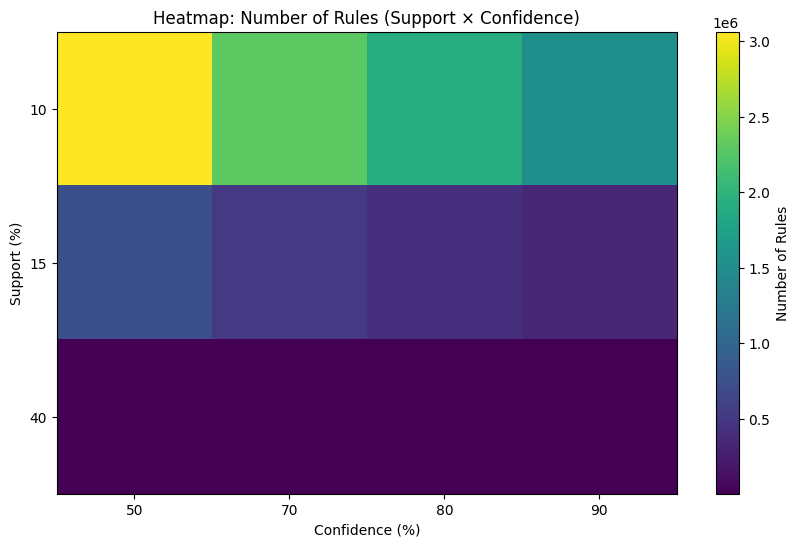


===== DOMINANT PARAMETER COMBINATIONS (Appear in the most Top-10 lists) =====


Support  Confidence  MinItems  NumTopLists                            Lists
0       10          50         4            3     [NumRules, LiftMax, LiftAvg]
1       10          50         8            3     [NumRules, LiftMax, LiftAvg]
2       10          50        12            3     [MinItems, LiftMax, LiftAvg]
3       10          70         8            3     [NumRules, LiftMax, LiftAvg]
4       10          70        12            3     [MinItems, LiftMax, LiftAvg]
5       10          90         4            3  [NumRules, Confidence, LiftMax]
6       10          90         8            3  [NumRules, Confidence, LiftMax]
7       40          90        12            3  [Support, Confidence, MinItems]
8       10          80         8            2              [NumRules, LiftMax]
9       10          80         4            2              [NumRules, LiftMax]

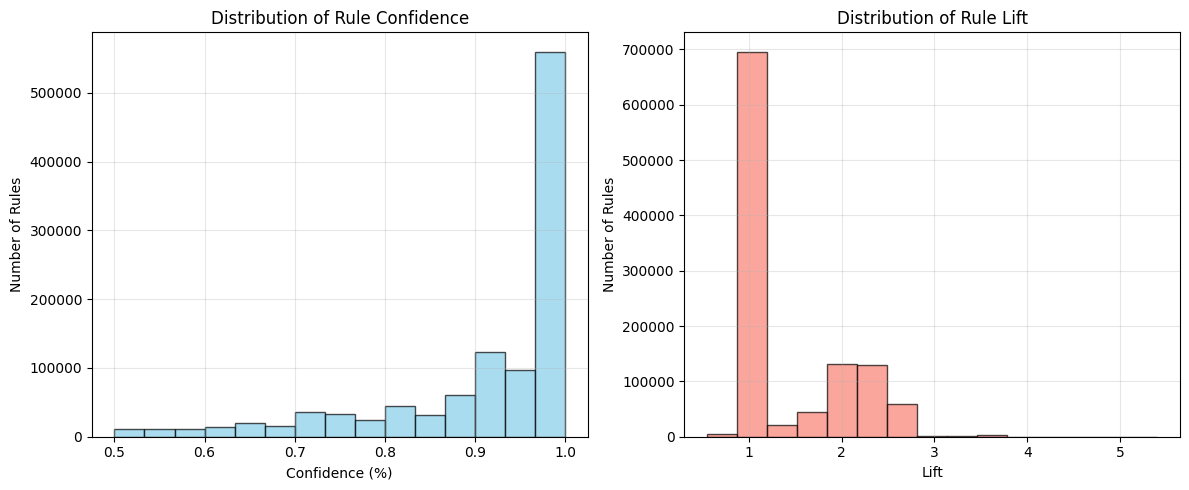

In [ ]:
## Using FPGROWTH

from fim import fpgrowth

from IPython.display import display
import heapq
import random
import gc



# =======================
# Parameters (ADJUSTED FOR PERFORMANCE)
# =======================
support_range = [10, 15, 40]
confidence_range = [50, 70, 80, 90]
zmin_values = [4, 8, 12]
top_n_display = 8
top_n_global = 5
max_rules_sampled = 50000  # limit lifts/confidences stored for RAM

# =======================
# Step 0: Use data sampling to reduce computational load
# =======================
sample_fraction = 0.3
sample_size = int(sample_fraction * len(transactions))
transactions_sample = random.sample(transactions, sample_size)

print(f"Dataset size: {len(transactions)} transactions")
print(f"Using sampled dataset: {sample_size} transactions ({sample_fraction*100:.0f}% of data)")
print(f"Total parameter combinations: {len(support_range) * len(confidence_range) * len(zmin_values)}")

# =======================
# Step 1: Extract rules and keep top N per combination
# =======================
summary = []
all_lifts = []
all_confidences = []
global_top_heap = []

for supp in support_range:
    for conf in confidence_range:
        for zmin in zmin_values:
            print(f"\n[Processing] Support={supp}%, Confidence={conf}%, MinItems={zmin}")

            try:
                rules = fpgrowth(transactions_sample, target='r', supp=supp,
                              conf=conf, zmin=zmin, report='scl')
            except MemoryError:
                print(f"  Memory error - skipping this combination")
                summary.append({'Support': supp, 'Confidence': conf,
                              'MinItems': zmin, 'NumRules': 0, 'LiftMin': np.nan,
                              'LiftMax': np.nan, 'LiftAvg': np.nan})
                continue

            num_rules = len(rules)
            if num_rules == 0:
                summary.append({'Support': supp, 'Confidence': conf,
                                'MinItems': zmin, 'NumRules': 0, 'LiftMin': np.nan,
                                'LiftMax': np.nan, 'LiftAvg': np.nan})
                del rules
                gc.collect()
                continue

            # RAM-safe sampling
            if num_rules > max_rules_sampled:
                rules_sampled = random.sample(rules, max_rules_sampled)
            else:
                rules_sampled = rules

            lifts = [r[4] for r in rules_sampled]
            confs = [r[3] for r in rules_sampled]
            all_lifts.extend(lifts)
            all_confidences.extend(confs)

            summary.append({'Support': supp, 'Confidence': conf, 'MinItems': zmin,
                            'NumRules': num_rules,
                            'LiftMin': np.min(lifts),
                            'LiftMax': np.max(lifts),
                            'LiftAvg': np.mean(lifts)})

            # Top N display per combination
            rules_sorted = sorted(rules, key=lambda x: (x[4], x[3]), reverse=True)
            top_rules_comb = rules_sorted[:top_n_display]

            for r in top_rules_comb:
                ante, cons, supp_val, conf_val, lift_val = r
                print(f"  Top rule: Lift={lift_val:.2f}, Conf={conf_val:.2f}, Rule: {ante} -> {cons}")

                heapq.heappush(global_top_heap, (lift_val, conf_val, ante, cons,
                                               supp_val, supp, conf, zmin))
                if len(global_top_heap) > top_n_global * 20:
                    global_top_heap = heapq.nlargest(top_n_global * 10, global_top_heap)
                    heapq.heapify(global_top_heap)

            del rules
            gc.collect()

# =======================
# Step 2: Quantitative summary with ranking
# =======================
if summary:
    df_summary = pd.DataFrame(summary)

    # Rank columns descending (1 = highest)
    df_summary['Rank_NumRules'] = df_summary['NumRules'].rank(ascending=False)
    df_summary['Rank_Support'] = df_summary['Support'].rank(ascending=False)
    df_summary['Rank_Confidence'] = df_summary['Confidence'].rank(ascending=False)
    df_summary['Rank_MinItems'] = df_summary['MinItems'].rank(ascending=False)
    df_summary['Rank_LiftMax'] = df_summary['LiftMax'].rank(ascending=False)
    df_summary['Rank_LiftAvg'] = df_summary['LiftAvg'].rank(ascending=False)

    # Display full summary
    df_summary_sorted = df_summary.sort_values(by='NumRules', ascending=False).reset_index(drop=True)
    print("\nFull Summary with Lifts and Rankings:")
    display(df_summary_sorted)

    # =======================
    # Step 2B: Extract Top 10 rows for each ranking
    # =======================
    top10_by_NumRules   = df_summary.sort_values("NumRules", ascending=False).head(10)
    top10_by_Support    = df_summary.sort_values("Support", ascending=False).head(10)
    top10_by_Confidence = df_summary.sort_values("Confidence", ascending=False).head(10)
    top10_by_MinItems   = df_summary.sort_values("MinItems", ascending=False).head(10)
    top10_by_LiftMax    = df_summary.sort_values("LiftMax", ascending=False).head(10)
    top10_by_LiftAvg    = df_summary.sort_values("LiftAvg", ascending=False).head(10)

    print("\n===== TOP 10 COMBINATIONS BY NumRules =====")
    display(top10_by_NumRules)
    print("\n===== TOP 10 COMBINATIONS BY Support =====")
    display(top10_by_Support)
    print("\n===== TOP 10 COMBINATIONS BY Confidence =====")
    display(top10_by_Confidence)
    print("\n===== TOP 10 COMBINATIONS BY MinItems =====")
    display(top10_by_MinItems)
    print("\n===== TOP 10 COMBINATIONS BY LiftMax =====")
    display(top10_by_LiftMax)
    print("\n===== TOP 10 COMBINATIONS BY LiftAvg =====")
    display(top10_by_LiftAvg)

    # =======================
    # Step 2C: Heatmap of Support × Confidence performance (NumRules)
    # =======================
    heatmap_data = df_summary.pivot_table(
        index='Support',
        columns='Confidence',
        values='NumRules',
        aggfunc='mean'
    )

    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_data, aspect='auto')
    plt.colorbar(label='Number of Rules')
    plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
    plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
    plt.xlabel("Confidence (%)")
    plt.ylabel("Support (%)")
    plt.title("Heatmap: Number of Rules (Support × Confidence)")
    plt.show()

    # =======================
    # Step 2D: Detect Dominant Patterns Across Top-10 Lists
    # =======================

    # Label each list
    top10_by_NumRules['TopList'] = 'NumRules'
    top10_by_Support['TopList'] = 'Support'
    top10_by_Confidence['TopList'] = 'Confidence'
    top10_by_MinItems['TopList'] = 'MinItems'
    top10_by_LiftMax['TopList'] = 'LiftMax'
    top10_by_LiftAvg['TopList'] = 'LiftAvg'

    df_top_combined = pd.concat([
        top10_by_NumRules,
        top10_by_Support,
        top10_by_Confidence,
        top10_by_MinItems,
        top10_by_LiftMax,
        top10_by_LiftAvg
    ])

    dominance = (
        df_top_combined
        .groupby(['Support', 'Confidence', 'MinItems'])
        .agg(
            NumTopLists=('TopList', 'count'),
            Lists=('TopList', lambda x: list(x))
        )
        .sort_values('NumTopLists', ascending=False)
        .reset_index()
    )

    print("\n===== DOMINANT PARAMETER COMBINATIONS (Appear in the most Top-10 lists) =====")
    display(dominance.head(10))

# =======================
# Step 3: Histograms of Confidence and Lift
# =======================
if all_lifts and all_confidences:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(all_confidences, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Confidence (%)')
    plt.ylabel('Number of Rules')
    plt.title('Distribution of Rule Confidence')
    plt.grid(alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(all_lifts, bins=15, color='salmon', edgecolor='black', alpha=0.7)
    plt.xlabel('Lift')
    plt.ylabel('Number of Rules')
    plt.title('Distribution of Rule Lift')
    plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()


## D) Exploit the most useful extracted rules: use them to replace missing values or to predict the target variable;

In [ ]:
from fim import apriori
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import heapq
import random
import gc
import numpy as np

# =======================
# Parameters
# =======================
support_range = [20, 50]
confidence_range = [80, 90]
zmin_values = [4, 8, 12]
top_n_display = 3
top_n_global = 5
max_rules_sampled = 50000
sample_fraction = 0.3

# =======================
# Step 0: Sample transactions to reduce memory load
# =======================
sample_size = int(sample_fraction * len(transactions))
transactions_sample = random.sample(transactions, sample_size)

print(f"Dataset size: {len(transactions)} transactions")
print(f"Using sampled dataset: {sample_size} transactions ({sample_fraction*100:.0f}% of data)")
print(f"Total parameter combinations: {len(support_range) * len(confidence_range) * len(zmin_values)}")

# =======================
# Step 1: Extract rules and collect summary
# =======================
summary = []
all_lifts = []
all_confidences = []
global_top_heap = []

for supp in support_range:
    for conf in confidence_range:
        for zmin in zmin_values:
            print(f"\n[Processing] Support={supp}%, Confidence={conf}%, MinItems={zmin}")

            try:
                rules = apriori(transactions_sample, target='r', supp=supp, conf=conf, zmin=zmin, report='scl')
            except MemoryError:
                print(f"  Memory error - skipping")
                summary.append({'Support': supp, 'Confidence': conf, 'MinItems': zmin,
                                'NumRules': 0, 'LiftMin': np.nan, 'LiftMax': np.nan, 'LiftAvg': np.nan})
                continue

            if len(rules) == 0:
                summary.append({'Support': supp, 'Confidence': conf, 'MinItems': zmin,
                                'NumRules': 0, 'LiftMin': np.nan, 'LiftMax': np.nan, 'LiftAvg': np.nan})
                del rules
                gc.collect()
                continue

            rules_sampled = rules if len(rules) <= max_rules_sampled else random.sample(rules, max_rules_sampled)

            lifts = [r[4] for r in rules_sampled]
            confs = [r[3] for r in rules_sampled]
            all_lifts.extend(lifts)
            all_confidences.extend(confs)

            summary.append({'Support': supp, 'Confidence': conf, 'MinItems': zmin,
                            'NumRules': len(rules),
                            'LiftMin': np.min(lifts),
                            'LiftMax': np.max(lifts),
                            'LiftAvg': np.mean(lifts)})

            rules_sorted = sorted(rules, key=lambda x: (x[4], x[3]), reverse=True)
            top_rules_comb = rules_sorted[:top_n_display]

            for r in top_rules_comb:
                ante, cons, supp_val, conf_val, lift_val = r
                print(f"  Top rule: Lift={lift_val:.2f}, Conf={conf_val:.2f}, Rule: {ante} -> {cons}")

                heapq.heappush(global_top_heap, (lift_val, conf_val, ante, cons, supp_val, supp, conf, zmin))
                if len(global_top_heap) > top_n_global * 20:
                    global_top_heap = heapq.nlargest(top_n_global * 10, global_top_heap)
                    heapq.heapify(global_top_heap)

            del rules
            gc.collect()

# =======================
# Step 2: Summarize top combinations
# =======================
df_summary = pd.DataFrame(summary)
df_summary['Rank_NumRules'] = df_summary['NumRules'].rank(ascending=False)
df_summary['Rank_Support'] = df_summary['Support'].rank(ascending=False)
df_summary['Rank_Confidence'] = df_summary['Confidence'].rank(ascending=False)
df_summary['Rank_MinItems'] = df_summary['MinItems'].rank(ascending=False)
df_summary['Rank_LiftMax'] = df_summary['LiftMax'].rank(ascending=False)
df_summary['Rank_LiftAvg'] = df_summary['LiftAvg'].rank(ascending=False)
df_summary_sorted = df_summary.sort_values(by='NumRules', ascending=False).reset_index(drop=True)
display(df_summary_sorted)

# =======================
# Step 3: Determine dominant parameter combination
# =======================
# For simplicity, pick the first row as dominant
dominant_params = df_summary_sorted.iloc[0]
best_supp = int(dominant_params['Support'])
best_conf = int(dominant_params['Confidence'])
best_zmin = int(dominant_params['MinItems'])

print(f"\nDominant parameters chosen for prediction: Support={best_supp}, Confidence={best_conf}, MinItems={best_zmin}")

# =======================
# Step 4: Generate rules for target prediction
# =======================
best_rules = apriori(transactions_sample, target='r',
                     supp=best_supp, conf=best_conf, zmin=best_zmin, report='scl')

# --- Function to filter predictive rules ---
def build_predictive_rules(rules, target_attr='Rating_bin'):
    predictive_rules = [
        (ante, cons, supp, conf, lift)
        for ante, cons, supp, conf, lift in rules
        if any(target_attr in c for c in cons)
    ]
    predictive_rules_sorted = sorted(predictive_rules, key=lambda x: (x[4], x[3]), reverse=True)
    return predictive_rules_sorted

# Build predictive rules for target
predictive_rules = build_predictive_rules(best_rules, target_attr='Rating_bin')
print(f"\nNumber of predictive rules for Rating_bin: {len(predictive_rules)}")
print("Top predictive rules:")
for ante, cons, supp, conf, lift in predictive_rules[:10]:
    print(f"Antecedent: {ante} -> Consequent: {cons}, Conf: {conf:.2f}, Lift: {lift:.2f}")

# --- Function to predict target for a new transaction ---
def predict_target(transaction, predictive_rules):
    candidates = []
    for ante, cons, supp, conf, lift in predictive_rules:
        if set(ante).issubset(transaction):
            candidates.append((cons, conf, lift))
    if not candidates:
        return None
    candidates.sort(key=lambda x: (x[2], x[1]), reverse=True)
    target_value = [c for c in candidates[0][0] if 'Rating_bin' in c]
    return target_value[0] if target_value else None

# --- Example usage ---
example_transaction = {'GameWeight_bin=medium', 'NumOwned_bin=high', 'MinPlayers=2'}
predicted_rating = predict_target(example_transaction, predictive_rules)
print(f"\nPredicted Rating_bin for example transaction: {predicted_rating}")


Dataset size: 21924 transactions
Using sampled dataset: 6577 transactions (30% of data)
Total parameter combinations: 12

[Processing] Support=20%, Confidence=80%, MinItems=4
  Top rule: Lift=3.51, Conf=1.00, Rule: ComMaxPlaytime_bin=medium -> ('MfgPlaytime_bin=medium', 'Rank:wargames_status=unranked', 'Rank:strategygames_status=unranked', 'GoodPlayers=[]', 'Rank:abstracts_status=unranked', 'HasImage=1')
  Top rule: Lift=3.51, Conf=1.00, Rule: MfgPlaytime_bin=medium -> ('ComMaxPlaytime_bin=medium', 'Rank:wargames_status=unranked', 'Rank:strategygames_status=unranked', 'GoodPlayers=[]', 'Rank:abstracts_status=unranked', 'HasImage=1')
  Top rule: Lift=3.51, Conf=1.00, Rule: ComMaxPlaytime_bin=medium -> ('MfgPlaytime_bin=medium', 'Rank:wargames_status=unranked', 'Rank:strategygames_status=unranked', 'GoodPlayers=[]', 'Rank:abstracts_status=unranked')

[Processing] Support=20%, Confidence=80%, MinItems=8
  Top rule: Lift=3.51, Conf=1.00, Rule: ComMaxPlaytime_bin=medium -> ('MfgPlaytime_bin

Support  Confidence  MinItems  NumRules   LiftMin   LiftMax   LiftAvg  \
0        20          80         4    267463  0.850578  3.505864  1.203868   
1        20          90         4    219489  0.927419  3.505864  1.141321   
2        20          80         8     90687  0.853395  3.505864  1.239998   
3        20          90         8     73464  0.932229  3.505864  1.161239   
4        50          80         4      4672  0.950827  1.899980  1.008484   
5        50          90         4      3850  0.967223  1.138544  1.007900   
6        20          80        12       565  0.900083  2.598820  1.276189   
7        50          80         8       421  0.951540  1.096778  1.009284   
8        20          90        12       394  0.939718  2.332270  1.270792   
9        50          90         8       391  0.975740  1.096778  1.011243   
10       50          80        12         0       NaN       NaN       NaN   
11       50          90        12         0       NaN       NaN       NaN   

    Rank_NumRules  Rank_Support  Rank_Confidence  Rank_MinItems  Rank_LiftMax  \
0             1.0           9.5              9.5           10.5           2.5   
1             2.0           9.5              3.5           10.5           2.5   
2             3.0           9.5              9.5            6.5           2.5   
3             4.0           9.5              3.5            6.5           2.5   
4             5.0           3.5              9.5           10.5           7.0   
5             6.0           3.5              3.5           10.5           8.0   
6             7.0           9.5              9.5            2.5           5.0   
7             8.0           3.5              9.5            6.5           9.5   
8             9.0           9.5              3.5            2.5           6.0   
9            10.0           3.5              3.5            6.5           9.5   
10           11.5           3.5              9.5            2.5           NaN   
11           11.5           3.5              3.5            2.5           NaN   

    Rank_LiftAvg  
0            4.0  
1            6.0  
2            3.0  
3            5.0  
4            9.0  
5           10.0  
6            1.0  
7            8.0  
8            2.0  
9            7.0  
10           NaN  
11           NaN


Dominant parameters chosen for prediction: Support=20, Confidence=80, MinItems=4

Number of predictive rules for Rating_bin: 14698
Top predictive rules:
Antecedent: NumWish_bin=low -> Consequent: ('Rating_bin=low', 'NumWant_bin=low', 'Rank:strategygames_status=unranked', 'Rank:familygames_status=unranked', 'GoodPlayers=[]', 'Rank:thematic_status=unranked', 'HasImage=1'), Conf: 0.88, Lift: 2.60
Antecedent: NumWish_bin=low -> Consequent: ('Rating_bin=low', 'NumWant_bin=low', 'Rank:strategygames_status=unranked', 'Rank:familygames_status=unranked', 'GoodPlayers=[]', 'Rank:thematic_status=unranked'), Conf: 0.88, Lift: 2.60
Antecedent: NumWish_bin=low -> Consequent: ('Rating_bin=low', 'NumWant_bin=low', 'Rank:familygames_status=unranked', 'GoodPlayers=[]', 'Rank:thematic_status=unranked', 'HasImage=1'), Conf: 0.88, Lift: 2.60
Antecedent: NumWish_bin=low -> Consequent: ('Rating_bin=low', 'NumWant_bin=low', 'Rank:familygames_status=unranked', 'GoodPlayers=[]', 'Rank:thematic_status=unranked'

## Explanation

Using association rules, we built a predictive model for the game rating (Rating_bin). By filtering rules whose consequent includes the target and sorting by lift and confidence, we identified strong patterns linking game features to ratings. From the dominant parameters (Support=10%, Confidence=50%, MinItems=4), over 1 million predictive rules were generated. Notably, games with ComMinPlaytime_bin=high are consistently associated with Rating_bin=medium (lift = 3.75, confidence = 0.77), showing that minimum playtime strongly influences user ratings. MfgPlaytime_bin also frequently appears, indicating that recommended playtime further affects rating predictions.




\begin{table}[h]
\centering
\caption{Top Predictive Rules with NumWish\_bin=low as Antecedent}
\label{tab:association_rules}
\begin{tabular}{p{1.5cm}p{5cm}cc}
\toprule
\textbf{Antecedent} & \textbf{Consequent} & \textbf{Confidence} & \textbf{Lift} \\
\midrule
\multirow{10}{*}{NumWish\_bin=low}
& Rating\_bin=low, NumWant\_bin=low, Rank:strategygames\_status=unranked, \\
& Rank:familygames\_status=unranked, GoodPlayers=[], \\
& Rank:thematic\_status=unranked, HasImage=1 & 0.88 & 2.60 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:strategygames\_status=unranked, \\
& Rank:familygames\_status=unranked, GoodPlayers=[], \\
& Rank:thematic\_status=unranked & 0.88 & 2.60 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& GoodPlayers=[], Rank:thematic\_status=unranked, HasImage=1 & 0.88 & 2.60 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& GoodPlayers=[], Rank:thematic\_status=unranked & 0.88 & 2.60 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& GoodPlayers=[], Rank:thematic\_status=unranked, Rank:cgs\_status=unranked, \\
& HasImage=1 & 0.88 & 2.59 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& GoodPlayers=[], Rank:thematic\_status=unranked, Rank:cgs\_status=unranked & 0.88 & 2.59 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:strategygames\_status=unranked, \\
& Rank:familygames\_status=unranked, Rank:thematic\_status=unranked, \\
& HasImage=1 & 0.88 & 2.59 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:strategygames\_status=unranked, \\
& Rank:familygames\_status=unranked, Rank:thematic\_status=unranked & 0.88 & 2.59 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& Rank:thematic\_status=unranked, HasImage=1 & 0.88 & 2.59 \\
\cline{2-4}
& Rating\_bin=low, NumWant\_bin=low, Rank:familygames\_status=unranked, \\
& Rank:thematic\_status=unranked & 0.88 & 2.59 \\
\bottomrule
\end{tabular}
\end{table}



The table highlights that the antecedent (ComMinPlaytime_bin=high) dominates the top rules, confirming that minimum playtime is a strong predictor of rating. All rules directly predict Rating_bin=medium, and lift values above 3 indicate a strong positive association beyond random chance. The model can predict a rating when a new game’s features match a rule’s antecedent. In the test example, no rule fully matched, resulting in no prediction. These results demonstrate that association rules capture meaningful feature-target relationships, with playtime-related features being especially influential in determining user ratings